In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Оптимизация. Имплементация градиентного спуска

In [3]:
x = np.linspace(-50, 50, 5000)
def func1(_x): return _x**2
def grad1(_x): return 2*_x

In [4]:
def calculate_grad(func, x0, delta=0.01): return (func(x0+delta)-func(x0))/delta
def calculate_grad2(func, x0, delta=0.01): return (func(x0+delta)-func(x0-delta))/(2*delta)

In [5]:
x0=np.random.uniform(-50, 50)
print('true grad', grad1(x0))
print('method1', calculate_grad(func1, x0))
print('method2', calculate_grad2(func1, x0))

true grad -11.174194310142326
method1 -11.16419431014215
method2 -11.174194310142127


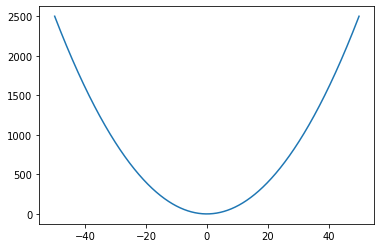

In [6]:
plt.plot(x, func1(x))
plt.show()

In [7]:
x0=np.random.uniform(-50, 50)
alpha=0.15
n_iter=50
for x in range(n_iter):
    print(x0, func1(x0))
    x0-=alpha*grad1(x0)

29.095934631993686 846.5734121092495
20.36715424239558 414.82097193353223
14.257007969676906 203.2622762474308
9.979905578773835 99.59851536124111
6.985933905141684 48.80327252700815
4.890153733599179 23.913603538233993
3.4231076135194254 11.717665733734655
2.396175329463598 5.7416562095299835
1.6773227306245189 2.813411542669692
1.1741259114371632 1.3785716559081491
0.8218881380060142 0.6755001113949931
0.57532169660421 0.3309950545835466
0.40272518762294696 0.16218757674593784
0.2819076313360629 0.07947191260550955
0.19733534193524405 0.038941237176699686
0.13813473935467083 0.019081206216582845
0.09669431754826957 0.009349791046125593
0.0676860222837887 0.004581397612601541
0.04738021559865209 0.002244884830174755
0.03316615091905646 0.0010999935667856298
0.023216305643339524 0.0005389968477249586
0.016251413950337665 0.0002641084553852297
0.011375989765236367 0.00012941314313876258
0.007963192835665458 6.341244013799367e-05
0.005574234984965821 3.1072095667616905e-05
0.003901964489

In [56]:
class optimizer:
    def __init__(self, alpha, n_iter):
        self.alpha=alpha
        self.n_iter=n_iter
    def fit(self, func, grad, x0):
        for i in range(self.n_iter):
#             print(self.alpha*grad(x0), x0)
            x0-=self.alpha*grad(x0)
        return x0
opt1=optimizer(alpha, 100)
x=opt1.fit(func1, grad1, np.random.uniform(-50, 50))
print(x, func1(x))

0.6901879336985118 3.450939668492559
0.5521503469588095 2.7607517347940473
0.4417202775670476 2.208601387835238
0.35337622205363806 1.7668811102681903
0.28270097764291047 1.4135048882145522
0.22616078211432838 1.1308039105716419
0.18092862569146273 0.9046431284573135
0.14474290055317016 0.7237145027658508
0.11579432044253612 0.5789716022126806
0.09263545635402891 0.4631772817701445
0.07410836508322312 0.3705418254161156
0.059286692066578495 0.2964334603328925
0.0474293536532628 0.23714676826631398
0.03794348292261024 0.1897174146130512
0.03035478633808819 0.15177393169044096
0.024283829070470553 0.12141914535235276
0.019427063256376442 0.09713531628188221
0.015541650605101154 0.07770825302550577
0.012433320484080924 0.062166602420404615
0.00994665638726474 0.04973328193632369
0.007957325109811791 0.03978662554905895
0.006365860087849432 0.03182930043924716
0.005092688070279546 0.025463440351397727
0.0040741504562236365 0.020370752281118183
0.0032593203649789095 0.016296601824894546
0.0

<b>Домашнее задание: оптимизировать x^2*(np.sin(0,5*_x)^2+1)</b>
<ul>
<li>При каких значениях alpha оптимизация проходит успешно, а при каких "застревает"?</li></ul>

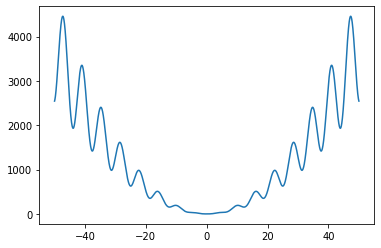

In [9]:
x = np.linspace(-50, 50, 5000)
def func2(_x): return (_x**2)*(np.sin(0.5*_x)**2+1)
plt.plot(x, func2(x))
plt.show()

In [59]:
alpha = 0.1
opt1=optimizer(alpha, 100000)
def grad2(_x): return 2*_x*(np.sin(0.5*_x)**2 + 1) + x**2*np.sin(x*0.5)*np.cos(x*0.5)
x = np.random.uniform(-50, 50)

print(calculate_grad(func2, x))
print(grad2(x))

res=opt1.fit(func2, grad2, x)
print(res, func2(x), x)

700.5625466632409
698.7209853007972
69.87209853007973 -42.9144915466197
57.58026227057223 -112.78659007669943
42.366440733608584 -170.36685234727165
30.164519157108103 -212.73329308088023
-5.413813358403252 -242.89781223798832
16.308839869662588 -237.48399887958507
-15.255364815057261 -253.79283874924766
32.37661026686367 -238.53747393419042
19.462289668739267 -270.9140842010541
-0.07145665826235473 -290.3763738697934
1.9544502107503945 -290.304917211531
-36.10439235475833 -292.2593674222814
6.774985036302883 -256.1549750675231
16.7958829725068 -262.929960103826
-30.99746249089087 -279.72584307633275
-15.241582355217169 -248.72838058544187
23.07088267594462 -233.4867982302247
16.411061286873952 -256.5576809061693
-26.856496762130497 -272.9687421930433
18.703289498410665 -246.1122454309128
17.239222262044223 -264.81553492932346
17.840138375433003 -282.0547571913677
-13.095176572885862 -299.8948955668007
-22.85576022280411 -286.79971899391484
27.855751238809354 -263.9439587711107
-34.084

-16.933287571116832 -248.57056250940335
26.637474568160314 -231.6372749382865
23.53291896232861 -258.2747495064468
12.854516087641208 -281.80766846877543
15.78075107133018 -294.66218455641666
-38.51168936478241 -310.44293562774686
-5.863105544586472 -271.93124626296446
-14.24413127600617 -266.068140718378
27.27114943654208 -251.82400944237185
-27.455018359626365 -279.09515887891394
29.12922226916268 -251.64014051928757
-14.568894943445821 -280.7693627884502
-17.050981254227704 -266.2004678450044
-8.281366537053964 -249.14948659077672
-3.889675269425493 -240.86812005372275
4.6024538095237295 -236.97844478429727
-14.714997644141613 -241.580898593821
30.38289186179897 -226.86590094967937
27.56256196287586 -257.2487928114783
-18.350681706469995 -284.8113547743542
-21.625925254532298 -266.4606730678842
31.175587409568852 -244.83474781335192
22.730112687652323 -276.0103352229208
-37.57827974123284 -298.7404479105731
-21.622845018581916 -261.16216816934025
25.87406494145587 -239.5393231507583

16.616109091869454 -308.27385822187364
-25.294394966543315 -324.8899673137431
-21.595496894431903 -299.5955723471998
-1.8640891924832887 -278.0000754527679
24.012345896713875 -276.1359862602846
-5.587908099724519 -300.1483321569985
13.876635560842885 -294.56042405727396
14.263069652070806 -308.43705961811685
-36.59564639483708 -322.70012927018763
-33.07724494508189 -286.1044828753505
1.51384847594411 -253.02723793026865
-21.0725752289521 -254.54108640621277
23.434604921603047 -233.46851117726067
23.13149217452757 -256.90311609886373
-28.753291811334066 -280.0346082733913
30.394806516459155 -251.28131646205725
9.767617969204117 -281.6761229785164
-28.58196668085434 -291.4437409477205
15.306556666782388 -262.8617742668662
-6.582235062416988 -278.1683309336486
3.5735274521302816 -271.5860958712316
5.476304068795208 -275.15962332336187
-17.859961519785656 -280.6359273921571
13.345264672375539 -262.77596587237144
23.88275268603279 -276.121230544747
-9.866866548544829 -300.0039832307798
6.52

-35.51429041858928 -298.9314804678008
25.058884565743327 -263.4171900492115
18.721451503292997 -288.4760746149548
12.433253010963313 -307.1975261182478
6.788292320651113 -319.63077912921113
13.872049965244276 -326.41907144986226
-2.9982278658328143 -340.29112141510655
-34.51923501421373 -337.29289354927374
1.3576788376856144 -302.77365853506
-35.608463716248615 -304.13133737274563
-2.1132627083331044 -268.52287365649704
-20.838034009716228 -266.40961094816396
28.227202135572863 -245.57157693844772
-25.744925359314244 -273.79877907402056
-18.328100299748098 -248.05385371470632
-9.491961682381032 -229.72575341495823
35.49696455311769 -220.2337917325772
-3.8194907826585225 -255.7307562856949
26.122467091027524 -251.91126550303636
-2.8097280288708593 -278.0337325940639
7.1499107880626305 -275.22400456519307
22.297961833553394 -282.3739153532557
-41.131292579725965 -304.6718771868091
26.34284078155811 -263.54058460708313
12.693798822258817 -289.88342538864123
6.649875263179024 -302.57722421

14.831228692269509 -246.28254932871855
-22.079291714152305 -261.11377802098804
31.982764811883477 -239.03448630683573
17.456270054669414 -271.01725111871923
18.68339041821531 -288.47352117338863
11.639754204128156 -307.15691159160394
-17.349608100398303 -318.7966657957321
20.0683522360397 -301.4470576953338
-0.4236562799569356 -321.5154099313735
9.925367927459854 -321.0917536514165
-32.15224291510806 -331.01712157887636
-36.34843937077992 -298.8648786637683
6.969664873749162 -262.51643929298837
20.601109314541898 -269.4861041667375
7.815703449714602 -290.0872134812794
-34.115179298854606 -297.90291693099397
27.772030385851714 -263.78773763213934
-30.715354638392526 -291.5597680179911
-23.54915695511377 -260.84441337959856
11.976470435843943 -237.2952564244848
-5.72256713098891 -249.27172686032873
9.455626514467054 -243.5491597293398
2.084962471471147 -253.00478624380685
-16.59933851147241 -255.089748715278
32.1116285656692 -238.4904102038056
24.14925640526567 -270.6020387694748
17.2501

-22.42610858054709 -331.3259340584171
4.075880202472888 -308.89982547787
-1.3960136265677647 -312.9757056803429
-39.16141935309591 -311.57969205377515
-17.975361812803545 -272.41827270067927
-21.09074081845048 -254.4429108878757
25.64219987641858 -233.35217006942523
7.795077745399908 -258.9943699458438
-25.235297410358683 -266.7894476912437
-14.491951633270185 -241.55415028088504
27.243539234078256 -227.06219864761485
-20.706345489612467 -254.30573788169312
20.743150346029882 -233.59939239208066
-20.856145421684733 -254.34254273811055
23.07890233536963 -233.4863973164258
16.5786212374574 -256.56529965179544
-28.164331948093174 -273.14392088925285
31.630684384382892 -244.97958894115968
25.044607896310914 -276.61027332554255
20.288851053970962 -301.6548812218535
-13.669177407262499 -321.94373227582446
16.60763830935631 -308.27455486856195
-25.53535950925866 -324.8821931779183
-27.83857847857851 -299.3468336686596
5.666166876387525 -271.5082551900811
18.467974505252496 -277.17442206646865

-36.013967741693456 -292.0712965060929
4.3093443175625 -256.0573287643994
-21.55792261812659 -260.3666730819619
32.88883861332137 -238.8087504638353
0.5311679635031737 -271.6975890771567
-13.58578206826578 -272.22875704065984
16.347544577121973 -258.6429749723941
0.9577322324342958 -274.9905195495161
21.950855996079568 -275.9482517819504
-34.05437192009863 -297.89910777802993
27.877085304711763 -263.8447358579313
-33.15361581160635 -291.7218211626431
17.987332545953905 -258.56820535103674
25.240941695802192 -276.55553789699064
19.69519800609054 -301.7964795927928
0.2483070304573971 -321.49167759888337
-7.16130232167094 -321.73998462934077
15.035462475971872 -314.57868230766985
-50.11790593805631 -329.61414478364173
-30.96531352256675 -279.4962388455854
-17.26926290106643 -248.53092532301866
19.329072741442587 -231.26166242195222
24.061923351690883 -250.5907351633948
-8.158493483521648 -274.6526585150857
-22.11132123295522 -266.4941650315641
26.648219802993232 -244.38284379860886
17.172

-25.06077633385762 -273.85181198279037
-14.41960688234459 -248.79103564893273
2.93205961901441 -234.37142876658814
12.168271880236809 -237.30348838560255
-1.174396116050275 -249.47176026583935
-18.486876215295776 -248.29736414978908
-8.71041164566609 -229.8104879344933
22.594064048630937 -221.1000762888272
12.904523867420028 -243.69414033745815
17.303600082126138 -256.59866420487816
-24.348071898375498 -273.9022642870043
0.7943663354754336 -249.5541923886288
19.541999921829177 -250.34855872410424
25.600234150667646 -269.8905586459334
21.096450761065604 -295.49079279660106
-38.232435763559124 -316.5872435576667
-11.686663279676191 -278.35480779410756
-24.21148825716748 -266.6681445144314
-12.678123284969116 -242.45665625726392
-9.02278620061212 -229.7785329722948
29.115484934709286 -220.75574677168268
8.574043454793571 -249.87123170639197
20.496625484521793 -258.4452751611855
-25.043643774979046 -278.94190064570734
-16.85717913174767 -253.8982568707283
6.042651402882723 -237.04107773898

-40.85001668058945 -316.72193007513994
20.866482887790177 -275.87191339455046
-4.141002630343394 -296.73839628234066
-33.70637096717555 -292.59739365199727
10.42271026667986 -258.89102268482173
17.388556042269716 -269.3137329515016
-24.947687032353066 -286.70228899377133
-11.938119351063154 -261.75460196141825
7.227491137136133 -249.81648261035508
25.251833531663706 -257.04397374749124
21.438495945908212 -282.29580727915493
-26.84865644150243 -303.7343032250631
22.831787877592603 -276.8856467835607
-18.228165699649733 -299.7174346611533
4.998175954145632 -281.48926896150357
-28.87256832001715 -286.4874449156492
29.154550361166017 -257.61487659563204
-23.525068064495123 -286.76942695679804
22.67008351595773 -263.2443588923029
-33.67556626828655 -285.91444240826064
20.45798423254437 -252.23887613997408
-23.29853083736596 -272.6968603725185
-2.8873882507306803 -249.39832953515253
9.285584913676667 -246.51094128442185
-2.2228881653914985 -255.79652619809852
-11.248578085019155 -253.5736380

-28.094116839296248 -303.7831278576205
17.741127104949705 -275.68901101832427
-16.268380821558377 -293.430138123274
18.699071554539113 -277.1617573017156
17.125047247314377 -295.8608288562547
-1.1045467996295202 -312.9858761035691
-33.14838166309924 -311.8813293039396
-20.941146797009583 -278.73294764084034
28.69733336394637 -257.79180084383074
-28.845753661583583 -286.4891342077771
29.135241905529895 -257.64338054619355
-23.323641359550038 -286.77862245172344
25.490828916799526 -263.4549810921734
22.794529843769297 -288.9458100089729
-36.22624945808418 -311.7403398527422
14.137827091568568 -275.514090394658
17.265220336600727 -289.6519174862266
6.231516481194195 -306.9171378228273
3.372104827157489 -313.14865430402153
-36.778154252918675 -316.52075913117903
-30.942217874974542 -279.74260487826035
-14.289917942946444 -248.8003870032858
-0.1245778881337401 -234.51046906033937
2.6065778394633186 -234.38589117220565
4.923367622341459 -236.99246901166896
-16.086464852068 -241.9158366340104

-3.2743024406512973 -262.118743870259
11.582149760047038 -258.8444414296077
25.754273073064553 -270.42659118965474
10.895875033384323 -296.1808642627193
9.963499596409282 -307.0767392961036
-45.06770909417201 -317.0402388925129
-6.975654133504304 -271.9725297983409
13.125756038903013 -264.9968756648366
-5.305337338465143 -278.1226317037396
-25.092812378397458 -272.81729436527445
-15.822266282836006 -247.72448198687698
30.56006845376615 -231.90221570404097
5.583300416316445 -262.4622841578071
-13.987460821288574 -268.04558457412355
-18.830942321509237 -254.05812375283497
-11.626432924357017 -235.22718143132573
-5.492153663998852 -223.60074850696873
10.228326697868761 -218.10859484296986
-0.17304823937150787 -228.33692154083863
3.376991201493445 -228.16387330146713
24.927690185799282 -231.54086450296057
14.399551651121602 -256.46855468875987
20.28828747021892 -270.8681063398815
-22.112116890716813 -291.1563938101004
11.377988592154338 -269.04427691938355
-22.569269154643987 -280.42226551

24.17177476930515 -256.9688602854602
-4.561324625157624 -281.14063505476537
25.165782877622146 -276.57931042960774
19.9799297417899 -301.74509330722987
-6.694715465915033 -321.72502304901974
6.457553393556634 -315.03030758310473
0.35553033865185174 -321.48786097666135
-10.434811791558651 -321.8433913153132
-41.53652596422926 -311.40857952375455
25.45850063910806 -269.8720535595253
21.605234800655264 -295.33055419863337
-44.007919484324816 -316.9357889992886
-26.436765520539325 -272.9278695149638
9.777119653825913 -246.49110399442446
9.600261955704298 -256.2682236482504
-9.531771164391841 -265.8684856039547
11.276386447653579 -256.33671443956285
-22.024307066459574 -267.61310088721643
28.00760428123149 -245.58879382075685
-27.71157963877388 -273.5963981019883
23.31338084461271 -245.88481846321443
14.94076050357229 -269.19819930782717
0.3880699721149881 -284.13895981139945
-10.69212083663431 -284.5270297835144
-25.286160294132426 -273.8349089468801
-17.12271605834105 -248.54874865274766


-33.67092461941047 -291.7634309197594
26.119893925957026 -258.09250630034893
-1.6995110002724232 -284.21240022630593
23.428326914905142 -282.5128892260335
-21.998501468357702 -305.94121614093865
5.800347441509382 -283.94271467258096
15.603904182586064 -289.7430621140903
-35.910593360006374 -305.3469662966764
19.73306035293399 -269.43637293667
22.54909130788492 -289.169433289604
-36.66222778674103 -311.7185245974889
2.731353667148801 -275.0562968107479
4.033541030034155 -277.7876504778967
13.15651404413892 -281.82119150793085
20.071379594927453 -294.9777055520698
5.997015846612692 -315.04908514699724
10.794661183505378 -321.0461009936099
-5.8683656678134986 -331.84076217711527
6.664975551070097 -325.97239650930175
11.881776953247334 -332.63737206037183
-5.716607494686333 -344.51914901361914
8.93918572584264 -338.8025415189328
-43.15726208652548 -347.74172724477546
-40.813907780704085 -304.58446515825
27.72364173324695 -263.7705573775459
-29.547354633776266 -291.49419911079286
-7.5285167

25.60764442330973 -233.35407387168033
8.632359978276373 -258.9617182949901
-22.290927784268845 -267.59407827326646
30.79944190424817 -245.30315048899763
23.710982310106047 -276.1025923932458
-15.472926197767652 -299.81357470335183
-5.378227181316095 -284.34064850558417
-25.397664994394837 -278.96242132426806
-11.068973735885118 -253.56475632987323
-12.17835957623305 -242.4957825939881
-1.22448154887569 -230.31742301775506
-10.284573921456525 -229.09294146887936
24.899459686147864 -218.80836754742285
13.225676520671778 -243.7078272335707
23.62302560700497 -256.93350375424245
-19.6993531355006 -280.55652936124744
-23.52148184663113 -260.85717622574685
12.916919299129859 -237.33569437911572
17.511733922442023 -250.25261367824558
-19.62300153644003 -267.7643476006876
-18.554241027576836 -248.14134606424756
-10.43856312012747 -229.58710503667072
30.77336079464793 -219.14854191654325
9.813285248156172 -249.9219027111912
-10.902735137070648 -259.73518795934734
-13.83171119616933 -248.83245282

12.811315719030143 -271.22670844451136
3.2096855701784195 -284.0380241635415
-11.428822770059401 -287.2477097337199
20.034531246518725 -275.8188869636605
17.2407524606027 -295.8534182101792
1.9164612636821632 -313.0941706707819
6.932381771036012 -315.0106319344641
-13.645889409336304 -321.9430137055001
16.32575100280235 -308.2971242961638
-33.17485685093157 -324.62287529896616
-28.66598312374656 -291.4480184480346
13.486905603442835 -262.782035324288
24.920459523071692 -276.26894092773085
18.021168856738168 -301.18940045080257
-4.472807723499682 -319.2105693075407
12.608979166684334 -314.73776158404104
9.094756198175492 -327.34674075072536
-52.483549773948425 -336.44149694890086
5.3921051471636705 -283.95794717495244
21.306593182716803 -289.3500523221161
-41.58223226243158 -310.6566455048329
12.099240431201203 -269.0744132424013
-3.6430912054833815 -281.17365367360253
10.7335504640693 -277.5305624681192
15.04500361514988 -288.2641129321885
-14.710329808605024 -303.30911654733836
20.357

18.496457592893684 -237.5830216018967
4.869721474522362 -256.0794791947904
-23.19714212803124 -260.94920066931275
22.01770878150492 -237.7520585412815
-11.67061625811831 -259.76976732278644
-18.468778107820448 -248.09915106466812
-10.188371846398434 -229.63037295684768
34.415033278248316 -219.44200111044924
-16.257992881528548 -253.85703438869757
18.842729147481975 -237.59904150716903
13.778040484692383 -256.441770654651
26.609003440832907 -270.2198111393434
-6.837222758191115 -296.8288145801763
10.191280892675469 -289.9915918219852
-4.571695844394833 -300.1828727146607
20.222373089833198 -295.61117687026587
-17.33497930450693 -315.83354996009905
-38.68832592185052 -298.4985706555921
-12.54776083730751 -259.81024473374157
-8.414938665566273 -247.26248389643405
32.81894498533057 -238.84754523086778
1.3833353942230362 -271.6664902161983
-27.562123910614403 -273.04982561042135
29.205524969539354 -245.48770169980696
-7.083304594259016 -274.6932266693463
-22.06943120280628 -267.609922075087

-23.55898227735911 -286.7678717385488
22.10026679285933 -263.2088894611897
-28.84587449710034 -285.309156254049
14.277775826282472 -256.4632817569487
22.335116196987737 -270.74105758323117
-25.27744035920587 -293.0761737802189
-19.01081571092832 -267.798733421013
-14.46244853505108 -248.7879177100847
3.97612950254636 -234.32546917503365
30.546245625053064 -238.30159867758002
6.4576570950629275 -268.84784430263306
9.214971224311148 -275.305501397696
-10.50753453607216 -284.52047262200716
-22.582709062636013 -274.012938085935
30.258935769840317 -251.43022902329898
10.084937774043794 -281.6891647931393
-33.796173668525874 -291.7741025671831
27.361180886529407 -257.97792889865724
-29.311934298006918 -285.3391097851866
3.546363177449587 -256.0271754871797
-7.1144539776930635 -259.57353866462927
15.673250116916586 -252.4590846869362
-11.996923538469083 -268.13233480385276
6.282319434725878 -256.13541126538365
4.434978199049169 -262.41773070010953
-25.619353445869436 -266.8527088991587
-10.61

17.321427519061398 -258.59901007591077
21.57159472358452 -275.92043759497216
-25.64940210509394 -297.49203231855665
-3.450014756670942 -271.8426302134627
-5.528252142047234 -268.39261545679176
15.364282846494167 -262.86436331474454
-8.255550222086198 -278.2286461612387
26.124026186133335 -269.97309593915253
12.74363216672473 -296.09712212528586
5.619718523721827 -308.8407542920106
16.36993336369202 -314.46047281573243
-37.45893372542448 -330.8304061794245
-17.872408006424134 -293.371472454
13.803875982288435 -275.4990644475759
21.71896908111487 -289.30294042986435
-43.73072313009002 -311.02190951097924
-25.36890609191917 -267.2911863808892
-16.086482078631843 -241.92228028897003
34.07187643934413 -225.8357982103382
-14.554841204408309 -259.90767464968235
30.448092965193 -245.35283344527403
19.738605530334475 -275.800926410467
20.792788461478224 -295.5395319408015
-32.142326009075944 -316.3323204022797
-1.0603352320698605 -284.1899943932038
21.96521393382301 -283.12965916113393
-39.4002

4.333885987868007 -236.96667389152216
-11.599494166147725 -241.30055987939016
-9.691103538287008 -229.70106571324243
36.569176775423095 -220.00996217495543
16.88109832656528 -256.57913895037854
-28.432344626130522 -273.4602372769438
31.668914268558588 -245.0278926508133
24.567191597375725 -276.6968069193719
18.810169822786033 -301.2639985167476
14.516737964529888 -320.0741683395336
-20.077211872287208 -334.59090630406354
15.820156001602914 -314.51369443177634
-47.92428302824676 -330.33385043337927
22.6373289552933 -282.4095674051325
-39.86444596736089 -305.0468963604258
8.505731005110125 -265.1824503930649
-26.949144178103577 -273.68818139817506
3.6039802554627958 -246.73903722007148
19.42802024060294 -250.34301747553428
24.531269565310243 -269.77103771613724
8.104544848248555 -294.3023072814475
10.719769536155264 -302.40685212969606
2.789099215997976 -313.1266216658513
-19.928583337418413 -315.91572088184927
14.944563111594562 -295.9871375444309
-43.580081681325396 -310.93170065602544

26.903504935666263 -250.78361621760328
6.732295693171432 -277.6871211532696
-7.636950666767882 -284.419416846441
23.89598787284757 -276.7824661796731
8.822639862284154 -300.6784540525207
-13.84978333681711 -309.50109391480487
19.839211282939743 -295.6513105779878
-6.48420523351258 -315.4905218609275
1.153312180546152 -309.00631662741495
-32.65204328344503 -310.1596288079611
11.295230079264343 -277.50758552451606
22.197543086475026 -288.8028156037804
-43.71772055961412 -311.00035869025544
-25.422381388153532 -267.2826381306413
-16.044627069035027 -241.8602567424878
33.91179125412662 -225.81562967345278
-10.728006823015859 -259.7274209275794
-11.125597284418347 -248.99941410456353
24.3389200876106 -237.87381682014518
-0.8710933492611503 -262.21273690775575
-19.448617456508842 -261.3416435584946
-16.078332371203214 -241.89302610198575
33.904155327677316 -225.81469373078255
-10.534240662712705 -259.71884905845985
-7.566510393369061 -249.18460839574715
-14.997977585023092 -241.6180980023780

26.749143174308756 -239.48655822883543
-17.747991089578456 -266.23570140314416
-17.59356296803461 -248.4877103135657
11.1113790747154 -230.8941473455311
-15.996459021007286 -242.0055264202465
35.087778161157466 -226.0090673992392
-22.22551755796726 -261.0968455603967
32.758372621026254 -238.8713280024294
2.3883726726441523 -271.6297006234557
-22.494323100674706 -274.01807329609983
29.889772731527348 -251.52375019542512
2.969774619252007 -281.41352292695245
-6.60252308688813 -284.38329754620446
4.220655781782898 -277.7807744593163
16.86592180376549 -282.00143024109923
-36.31961619207175 -298.86735204486473
7.764630881138294 -262.547735852793
26.367887889501574 -270.3123667339313
-2.4248859531710654 -296.68025462343286
6.931513095496371 -294.2553686702618
17.99181994406556 -301.1868817657582
-5.428818831917408 -319.17870170982377
15.335169164486196 -313.7498828779064
-41.39242597695416 -329.0850520423926
1.1217931615970202 -287.69262606543845
22.26764342452699 -288.81441922703544
-43.690

-33.96560599323318 -316.40305968254467
22.879218137496675 -282.4374536893115
-36.419228315243934 -305.31667182680815
7.730470470443038 -268.89744351156423
24.963825905955833 -276.62791398200727
20.35939343530039 -301.5917398879631
-13.909107468837886 -321.9511333232635
18.64618558852818 -308.0420258544256
15.317244004426072 -326.6882114429538
-53.037410377546195 -342.00545544737986
22.834755936714032 -288.9680450698337
-34.916815338400056 -311.8028010065477
22.82784251015578 -276.88598566814767
-18.330030322308712 -299.71382817830346
2.162889125453296 -281.38379785599477
15.300429891551723 -283.5466869814481
-36.55048070061027 -298.84711687299983
1.2976884639362767 -262.2966361723896
26.78580807908825 -263.59432463632584
-0.1790426761982758 -290.3801327154141
4.817558944985866 -290.20109003921584
20.433186175389267 -295.0186489842017
-5.293878875857297 -315.451835159591
-32.6121572543218 -310.1579562837337
10.35714186864401 -277.5457990294119
6.7573682459767275 -287.90294089805593
15.7

-11.773468173293168 -293.58935824356166
13.038486224336328 -281.8158900702685
18.70274990993779 -294.85437629460483
12.451677606482896 -313.5571262045426
7.45262342271791 -326.00880381102553
10.627871185082506 -333.46142723374345
-19.631120337042603 -344.08929841882593
-37.47889890801289 -324.45817808178333
-18.5776445078752 -286.97927917377046
-5.294343029241452 -268.40163466589524
20.329721330862743 -263.10729163665377
17.440188659691593 -283.4370129675165
13.119957261269168 -300.87720162720814
17.46666359105931 -313.9971588884773
-17.9063854106035 -331.46382247953665
12.457129701316582 -313.55743706893315
7.5743578646708105 -326.01456677024976
8.502662102614455 -333.58892463492055
-54.177533872674076 -342.091586737535
7.042206540849236 -287.91405286486093
19.86321146165308 -294.95625940571017
11.098446624106067 -314.81947086736324
5.428174180343774 -325.9179174914693
-21.767950250608738 -331.3460916718131
-16.247699866859627 -309.57814142120435
-18.972664209603987 -293.3304415543447

7.968191763531263 -252.77435370417115
-23.618043935173617 -260.7425454677024
7.982586947610617 -237.12450153252883
31.607931904671513 -245.10708848013945
24.44088128717166 -276.71502038481094
17.616569193722796 -301.1559016719826
-18.110494589917973 -318.7724708657054
8.431619096402574 -300.6619762757874
-1.3563573280855394 -309.09359537219
18.834175974683422 -307.73723804410446
14.97588242336085 -326.5714140187879
-43.38180406826796 -341.54729644214876
-37.37888774968731 -298.1654923738808
-23.62143872781619 -260.7866046241935
8.933476922306795 -237.16516589637732
18.998939907043848 -246.0986428186841
10.660547509835864 -265.097582725728
19.005481233229954 -275.75813023556384
17.43792559791566 -294.7636114687938
-24.763592668635468 -312.2015370667094
-6.064757401950931 -287.43794439807397
1.8735995545160677 -281.373186996123
20.514003301521132 -283.2467865506391
-27.529292819528408 -303.76078985216026
24.71248146767157 -276.23149703263186
14.371954595850855 -300.94397850030344
-1.2289

32.94325337262673 -232.140780733281
10.99847877360287 -265.08403410590773
23.51590388069303 -276.0825128795106
-21.518834523325417 -299.59841676020363
-4.097947712409325 -278.0795822368782
-23.109330733263803 -273.98163452446886
27.94975545247495 -250.87230379120507
-22.796832004412796 -278.82205924368003
3.497074670781933 -256.0252272392672
-5.855874647194219 -259.5223019100492
-13.048312385898885 -253.66642726285497
1.6976903658251787 -240.61811487695607
-14.20952777202092 -242.31580524278124
4.621410116349387 -228.10627747076032
33.40970145390133 -232.7276875871097
-15.748762680098958 -266.13738904101103
20.353333048895834 -250.38862636091207
22.321858506642606 -270.7419594098079
-25.55704112634985 -293.06381791645055
-23.40732802745422 -267.5067767901007
21.750265721409267 -244.09944876264646
-9.064714210506304 -265.8497144840557
21.055316678845646 -256.78500027354943
2.5901947129074987 -277.8403169523951
-22.40249965914775 -280.43051166530256
26.8567354536911 -258.0280120061548
-2

-25.701213097633172 -267.23177433805074
-14.281806598883998 -241.53056124041757
23.729785240313266 -227.24875464153357
28.97012783578954 -250.97853988184684
-29.633879304338258 -279.9486677176364
18.840920184508516 -250.31478841329815
13.98884198073771 -269.15570859780667
21.80035630807945 -283.1445505785444
-40.62759590291071 -304.94490688662387
25.478914426323172 -264.3173109837131
14.549699499669032 -289.7962254100363
-38.79185045864024 -304.34592490970533
-1.3618716876170425 -265.5540744510651
26.671651116778754 -264.19220276344805
-14.242424378631563 -290.8638538802268
24.99450930637704 -276.6214295015953
20.346565778887932 -301.6159388079723
-14.277975625314856 -321.96250458686023
18.578104320907723 -307.68452896154537
11.99019247315166 -326.26263328245307
-3.651152701988849 -338.2528257556047
-20.440659485639856 -334.60167305361585
17.845510803371475 -314.161013567976
-1.0500236194294872 -332.0065243713475
-33.93679690768129 -330.956500751918
-12.549268194446757 -297.01970384423

15.711619415269684 -295.9451818920605
-37.83334766178491 -311.65680130733017
-25.435024528855116 -273.82345364554527
-18.169527053344325 -248.38842911669016
-3.0094672314187734 -230.21890206334584
24.507512793975003 -227.20943483192707
28.448650063337734 -251.71694762590207
-27.051596965571846 -280.1655976892398
-0.676146904271684 -253.11400072366797
16.16136077326256 -252.43785381939628
-0.08887358912182891 -268.5992145926588
-2.4445623106162317 -268.510341003537
-14.191504676916544 -266.0657786929208
26.629588819049378 -251.87427401600425
-15.558732818462865 -278.5038628350536
17.118094779139255 -262.9451300165907
-28.41792940888204 -280.06322479573
29.08793930390125 -251.64529538684795
-15.482161086185876 -280.7332346907492
6.72277071058528 -265.2510736045633
-7.010924682891346 -271.9738443151486
13.930457231724597 -264.96291963225724
-24.170078589761854 -278.8933768639818
-20.39240096185696 -254.72329827421996
3.852092017159157 -234.330897312363
29.171367122493635 -238.182989329522

-25.798036465818384 -278.9863140569125
-2.5203703664171146 -253.1882775910941
25.28756350149564 -250.66790722467698
22.046272549677408 -275.9554707261726
-35.56195812865244 -298.00174327585
5.004120628437772 -262.43978514719754
-24.098889879423226 -267.4439057756353
4.5579290427970705 -243.3450158962121
-17.498176528315582 -247.90294493900916
0.4638304878453255 -230.40476841069358
10.529453798430268 -230.8685988985389
-12.873079982222817 -241.39805269696916
-3.61510993154634 -228.52497271474635
19.549633822917727 -224.90986278320003
27.724435178014076 -244.45949660611774
-12.476336018427219 -272.1839317841318
-10.278399435580855 -259.7075957657046
-2.1726606142446143 -249.42919633012372
-8.295224502640167 -247.2565357158791
32.4078871376476 -238.96131121323893
9.296497007303106 -271.3691983508865
-17.146110579464484 -280.6656953581896
26.150316139829034 -263.5195847787251
16.95254385769249 -289.66990091855416
-1.7463234382541828 -306.62244477624665
-40.967404472742125 -304.876121337992

14.817956776962241 -250.1324002984069
14.224442931634895 -264.95035707536914
-28.48613373979081 -279.174800007004
25.597550757503416 -250.68866626721322
25.00363392243875 -276.2862170247166
19.04689065686124 -301.28985094715534
16.431601169096506 -320.3367416040166
-47.80205968449084 -336.7683427731131
22.832088073389436 -288.9662830886223
-35.01259688452451 -311.79837116201173
23.86616189442599 -276.78577427748723
8.190990134212882 -300.65193617191323
5.564017681690837 -308.8429263061261
16.83693248933214 -314.40694398781693
-25.086125293352644 -331.24387647714906
-15.670019341631042 -306.1577511837964
-3.2915113428471843 -290.4877318421654
-12.850685560945818 -287.1962204993182
-15.820827896096274 -274.3455349383724
18.903183291153404 -258.52470704227613
13.184131943990293 -277.42789033342956
-6.933082342348758 -290.61202227741984
12.405734422367619 -283.67893993507107
13.005997897114595 -296.0846743574387
-1.2708563270003994 -309.0906722545533
19.065088674957327 -307.8198159275529
1

30.184808971522234 -245.38558300019596
15.356481571573774 -275.5703919717182
-16.015281742786534 -290.926873543292
-1.184511138383823 -274.91159180050545
-26.56056620037207 -273.72708066212164
-6.422677440504038 -247.16651446174956
-1.185780923459936 -240.74383702124553
25.55174736835602 -239.5580560977856
10.354207507302954 -265.1098034661416
13.011245236386834 -275.46401097344454
18.709269890989617 -288.4752562098314
12.18347418119032 -307.184526100821
0.07616408456119644 -319.36800028201134
2.150193488948628 -319.4441643665725
-2.719827651184892 -321.59435785552114
-14.892893654070248 -318.8745302043362
-32.69956593259231 -303.981636550266
11.47486998257383 -271.2820706176737
24.123757825080588 -282.7569406002475
5.313470457803056 -306.8806984253281
-24.973806973392882 -312.19416888313117
-12.186291617534165 -287.2203619097383
2.133766543159311 -275.03407029220415
18.58856095639095 -277.16783683536346
18.624597497499224 -295.7563977917544
17.03190960254583 -314.38099528925363
-19.57

27.187686867004857 -244.4202357563488
2.9812344581649883 -271.60792262335366
-9.818899205413391 -274.58915708151864
18.188381224492367 -264.77025787610523
23.432746911547156 -282.9586391005976
-8.604812799508784 -306.3913860121448
-32.09651677440322 -297.786573212636
-4.969328333326098 -265.6900564382328
-23.597626846900564 -260.7207281049067
7.949885755198887 -237.12310125800613
31.653029342888512 -245.07298701320502
24.36031337913444 -276.7260163560935
16.679340233647157 -301.08632973522793
-43.05719932480695 -317.7656699688751
-6.676832434663573 -274.70847064406814
-14.29773223203664 -268.03163820940455
-14.263487770834331 -253.7339059773679
27.006888082985498 -239.47041820653357
-21.870143601536167 -266.47730628951905
29.456977544277972 -244.60716268798288
-21.676835417426663 -274.06414023226085
17.302446957019026 -252.38730481483418
23.60168653479899 -269.6897517718532
-20.00010730959898 -293.2914383066522
-28.628639694877393 -273.2913309970532
29.985949915749384 -244.662691302175

-20.424697778456665 -261.26843798944645
-3.3727661873456443 -240.84374021098978
16.01574216017998 -237.47097402364415
-9.439815089185107 -253.48671618382411
20.70446951188043 -244.046901094639
18.57407168330607 -264.7513706065194
19.346531113060326 -283.32544228982545
4.166546712206468 -302.6719734028858
4.223515314650013 -306.83852011509225
-43.716448364833155 -311.06203542974225
-24.984406766982513 -267.34558706490907
-13.763048427463742 -242.36118029792655
-4.811697831570121 -228.59813187046282
-3.083988850382582 -223.7864340388927
29.986017299804008 -220.70244518851013
25.594549479594697 -250.68846248831414
24.988815453963436 -276.28301196790886
18.883870894522214 -301.2718274218723
15.339345891049778 -320.1556983163945
-46.56955878875877 -335.49504420744427
22.745310432378574 -288.9254854186855
-37.576054986705735 -311.6707958510641
-21.109920845092475 -274.09474086435836
2.593916895608368 -252.9848200192659
-7.3665977122119335 -255.57873691487427
-18.59849758076133 -248.212139202

9.596197299415781 -296.2363646708389
-24.996907219945186 -305.8325619702547
-12.855996498381728 -280.8356547503095
-15.42842915418371 -267.9796582519278
13.500621796966414 -252.55122909774408
-13.879510544684718 -266.05185089471047
21.764883324541234 -252.17234035002576
-23.819829758995002 -273.937223674567
14.471742690616509 -250.117393915572
21.616892716714336 -264.5891366061885
-32.34183688993558 -286.20602932290285
-16.364586085797555 -253.8641924329673
16.65855594633217 -237.49960634716973
-19.76748026334824 -254.1581622935019
2.4991034781080317 -234.39068203015367
2.599848212028758 -236.8897855082617
26.69949435963995 -239.48963372029044
-16.821930842069925 -266.1891280799304
-3.5996412974449528 -249.3671972378605
25.370390533257456 -245.76755594041555
14.864944647236985 -271.137946473673
-33.52464649896506 -286.00289112091
15.228522362667196 -252.47824462194495
-20.594553249230582 -267.70676698461216
-5.2421177833486245 -247.11221373538157
-16.0574740385057 -241.87009595203295
3

3.0490751340911633 -275.06814620238094
-5.153788483950507 -278.1172213364721
-26.804374010668973 -272.9634328525216
17.669127568840565 -246.1590588418526
27.855383282527306 -263.8281864106932
-32.63798035661616 -291.68356969322053
6.471239005936571 -259.0455893366044
-0.36395775775641825 -265.516828342541
9.263751473992158 -265.1528705847846
-14.142048999840757 -274.41662205877674
-20.519406166947206 -260.27457305893597
21.82353613635278 -239.75516689198878
-15.516367311550495 -261.5787030283416
19.776757029548506 -246.0623357167911
-8.798886954115892 -265.8390927463396
25.200503542029324 -257.0402057922237
20.738835104623707 -282.240709334253
-4.668314240809195 -302.9795444388767
-38.354563387001484 -298.3112301980675
-15.50389177838822 -259.95666681106604
27.63473603612332 -244.45277503267783
-10.015757072602254 -272.0875110688012
-4.45881689477427 -262.07175399619894
29.155103604633144 -257.6129371014247
-23.555299798640842 -286.76804070605783
22.163387137271595 -263.212740907417
-2

32.78235107908926 -232.8177391013048
-2.5904323507394227 -265.60009018039403
18.44879221689437 -263.0096578296546
4.178150669838658 -281.458450046549
-32.70066130149276 -285.63660071638765
3.8428585633730226 -252.9359394148949
20.939372684277398 -256.7787979782679
5.907814008818139 -277.7181706625453
13.60332634252543 -283.6259846713634
-18.649593901946332 -297.22931101388883
-17.42787172299892 -278.5797171119425
-21.724975615465702 -261.15184538894357
27.67836199377598 -239.42686977347788
-26.099185468478005 -267.1052317672538
-6.669554556826518 -241.00604629877583
3.7244499551646757 -234.33649174194932
27.465850801601313 -238.060941697114
-0.6311398154050267 -265.52679249871534
15.479736110408693 -264.8956526833103
-23.492073598938557 -280.37538879371897
22.801537892734384 -256.88331519478044
-31.099649483686974 -279.6848530875148
-16.79997207666919 -248.58520360382784
28.979747298300026 -231.78523152715866
-23.626097658984442 -260.7649788254587
8.318588286831824 -237.13888116647425


-4.972338815491503 -234.75426530794368
-8.990617968700008 -229.7819264924522
28.511128156150257 -220.79130852375218
-5.050489274756263 -249.30243667990243
24.554139769189852 -244.25194740514615
5.3740562948608845 -268.806087174336
-19.431914732707675 -274.18014346919693
-20.234881347815566 -254.74822873648927
-0.1859558569005344 -234.5133473886737
3.93218092276951 -234.32739153177317
30.092329279691956 -238.25957245454268
-6.577908318049322 -268.3519017342346
-11.514552337096848 -261.7739934161853
17.66000416636132 -250.25944107908845
-16.684411576429046 -267.91944524544977
30.323631413278925 -251.2350336690207
6.8136419230486585 -281.5586650822996
17.04912082077624 -288.37230700534826
-34.56354417182636 -305.4214278261245
20.465966425714797 -270.8578836542981
-26.071442219798907 -291.3238500800129
6.687805854041733 -265.252407860214
-6.105524393733095 -271.9402137142558
-8.688366393657544 -265.83468932052267
26.526515323392665 -257.14632292686514
12.546217096028194 -283.6728382502578


12.852720381804591 -221.54379416531756
2.368499305402236 -234.39651454712217
-0.11904929328329672 -236.7650138525244
-2.5696254060787282 -236.6459645592411
9.806868034166804 -234.07633915316237
17.22921298837099 -243.88320718732916
-22.091277400368405 -261.11242017570015
32.069561016298486 -239.02114277533175
15.908559595368638 -271.09070379163023
-18.072292682773128 -286.99926338699885
8.479602771711212 -268.9269707042257
13.672739631215496 -277.4065734759369
-20.13888962084103 -291.0793131071524
18.969759884730696 -270.9404234863114
12.094479608718018 -289.9101833710421
17.752509495737947 -302.0046629797601
9.507585459319728 -319.75717247549807
-45.23104177122716 -329.2647579348178
3.3285153291174883 -284.0337161635906
-8.213726113595976 -287.3622314927081
-28.16315477045157 -279.1485053791121
29.026610766775082 -250.98535060866055
-29.003904305723722 -280.01196137543565
29.207004371436565 -251.00805706971192
-26.301183994069632 -280.21506144114846
-17.074847314691464 -253.9138774470

-18.153603263382355 -248.01206081412136
-8.202229272408102 -229.858457550739
10.344681238676799 -221.6562282783309
31.688464971886418 -232.0009095170077
27.390918071399927 -263.68937448889415
-20.164484280308784 -291.0802925602941
19.430475252617363 -270.9158082799853
0.7863253789736859 -290.3462835326027
-21.512380133696126 -291.13260891157637
22.681980462417165 -269.62022877788024
-35.980724515384416 -292.30220924029743
10.906365211337755 -256.32148472491303
-25.71991337846464 -267.2278499362508
-14.068526759732755 -241.50793655778614
19.731069206447557 -227.4394097980534
-6.507436471438405 -247.17047900450095
0.6529118083570211 -240.66304253306254
-11.813412602990446 -241.31595434141957
-10.806716796917067 -229.50254173842913
22.67344904241229 -218.69582494151206
-12.517411816542017 -241.36927398392436
-8.230129530042417 -228.85186216738234
31.21880189193425 -220.62173263733993
27.066352703868542 -251.84053452927418
-24.418370660213057 -278.9068872331427
-21.112801021279928 -254.488

-7.3189215260943 -261.9555525600908
-20.819982321454646 -254.63663103399648
15.908872718974601 -233.81664871254185
4.983720475941607 -249.72552143151646
-20.474451558100874 -254.70924190745805
6.072466271756639 -234.23479034935718
9.176233414485194 -240.30725662111382
-0.8969231003642677 -249.483490035599
-16.787307015749573 -248.58656693523474
29.182501187128015 -231.79925991948517
-23.03023482157323 -260.9817611066132
25.70737422204967 -237.95152628503996
27.22201938499709 -263.65890050708964
-14.725743853495079 -290.88091989208675
24.172372791276246 -276.15517603859166
-0.3889699187510928 -300.3275488298679
-11.805973021283979 -299.9385789111168
12.285524220108119 -288.1326058898328
2.1412592520343425 -300.41813010994093
7.100993809399404 -302.55938936197526
-18.781696588093155 -309.6603831713747
-14.66262387876759 -290.87868658328154
24.61577423308845 -276.21606270451394
12.211650108641562 -300.8318369376024
0.5223034681811669 -313.04348704624397
12.602703606558169 -313.56579051442

24.49003642194506 -256.9901588855895
4.757556337951212 -281.48019530753453
-32.0541703669885 -286.23775164548573
-19.96730651064835 -254.18358127849723
6.505256299445773 -234.2162747678489
-0.6838173921570615 -240.72153106729465
15.625186121626394 -240.03771367513758
-5.43055643141646 -255.66289979676398
17.068329548767462 -250.23234336534753
-25.30734493396494 -267.300672914115
-16.020114011197165 -241.99332798015007
34.931256740714694 -225.9732139689529
-23.38210078070986 -260.9044707096676
17.16552064496891 -237.52236992895772
-20.58971019274035 -254.68789057392664
9.28934718433112 -234.0981803811863
5.57329971605169 -243.38752756551742
-11.796638596918752 -248.9608272815691
8.91060414958904 -237.16418868465036
19.511778466625653 -246.0747928342394
-2.2301252896465598 -265.58657130086505
24.295117360970814 -263.3564460112185
-0.020405023887906285 -287.65156337218934
-0.5914992478697173 -287.6311583483014
-17.035351730806394 -287.0396591004317
26.27543365460198 -270.00430736962534
8.

-8.357883611338151 -268.2817759990496
-14.87366226906795 -259.9238923877115
31.667273950031742 -245.05023011864353
24.42296651498647 -276.7175040686753
17.419894071420323 -301.14047058366174
-24.64742471698494 -318.5603646550821
-2.4070253537205417 -293.91293993809717
-29.763338545290253 -291.5059145843766
-12.198117954048065 -261.7425760390864
0.5597693978447978 -249.54445808503831
14.166372844463433 -250.10422748288312
25.969529825154382 -264.27060032734653
3.753773042413218 -290.2401301525009
-0.10483029943305838 -293.99390319491414
-3.0924938076943818 -293.8890728954811
-12.317317767874762 -290.7965790877867
-14.936546992374202 -278.4792613199119
26.36176003186347 -263.54271432753774
12.223477348301778 -289.9044743594012
16.029618414539666 -302.127951707703
-35.60646454866053 -318.15757012224265
23.647081770851585 -282.5511055735821
-14.45470135820002 -306.1981873444337
-33.42868524757405 -291.7434859862337
22.870207782522893 -258.31480073865964
-3.327224178904567 -281.185008521182

16.306100641414616 -258.6448197020107
-0.1158990007080547 -274.9509203434253
-3.2653495184699297 -274.83502134271725
4.01779207258902 -271.56967182424734
15.715415433366672 -275.58746389683637
-25.602910510013363 -291.30287933020304
-5.228932988670772 -265.69996882018967
-22.487933302936064 -260.4710358315189
26.235828012495165 -237.98310252858286
26.44956263845867 -264.218930541078
-8.58980709580402 -290.66849317953665
18.25744403358192 -282.07868608373263
-0.14582451170733748 -300.33613011731455
-4.353690862533608 -300.1903056056072
17.4979298772393 -295.8366147430736
7.945358547843637 -313.3345446203129
5.798906183953432 -321.2799031681565
13.243264014568025 -327.07880935210994
-3.9003871804159305 -340.32207336667796
-52.66064464118352 -336.42168618626204
10.456043614728845 -283.7610415450785
5.951241744557945 -294.21708515980737
-4.999046438868516 -300.1683269043653
21.353342120656784 -295.1692804654968
-36.82029203357131 -316.5226225861536
-31.061799472831265 -279.7023305525823
-1

-15.527109932192946 -253.80972392313367
30.345798911358486 -238.28261399094072
0.6866453987109709 -268.6284129022992
17.415354574482546 -269.3150583010102
-24.362230228862543 -286.73041287549273
3.1527041929305484 -262.3681826466302
-0.47279930004059456 -265.5208868395608
11.885976243137566 -265.04808753952017
22.23887424751704 -276.93406378265774
-31.533810503267183 -299.1729380301748
-21.64633182318429 -267.6391275269076
21.217532116571444 -245.99279570372332
-25.79846899821537 -267.21032782029476
-13.037540400653667 -241.4118588220794
-0.8958398874358409 -228.37431842142576
18.87334930641189 -227.47847853398991
13.181482182305013 -246.3518278404018
-6.1282696840811814 -259.5333100227068
-7.644277201368698 -253.40504033862564
25.481988478148164 -245.76076313725693
12.42816887900841 -271.2427516154051
12.590239229175314 -283.6709204944135
8.997456672172985 -296.26115972358883
-37.3278985898786 -305.2586163957618
-16.453868906133927 -267.9307178058832
30.102123627445593 -251.4768488997

-8.286465599604492 -242.74605835903526
0.9738957068999299 -234.45959275943076
-13.089725499561883 -235.4334884663307
-2.8969881695848927 -222.3437629667688
34.46119860188593 -219.4467747971839
-16.993189219544764 -253.90797339906985
3.159463374052996 -236.91478417952507
14.771408461190095 -240.07424755357806
-19.47407388426966 -254.84565601476817
-12.751527689374008 -235.3715821304985
-6.315499265712686 -222.6200544411245
-3.5440938324182643 -216.30455517541182
30.604090747451586 -212.76046134299355
5.023909728374349 -243.36455209044513
-18.169376601705746 -248.38846181881948
-3.006276629410616 -230.21908521711373
24.441502342687556 -227.2128085877031
29.014207696508166 -251.65431093039066
-17.07776227665653 -280.66851862689884
26.758630352973366 -263.5907563502423
0.6981607212092058 -290.34938670321566
-19.302015768611717 -291.04754742442486
-0.7852205144920504 -271.7455316558131
18.588792818210027 -270.9603111413211
18.903457033608742 -289.5491039595311
14.002223953544831 -308.452560

3.426515299508242 -275.08225499996195
-15.681951558967093 -278.5087702994702
14.518601835396431 -262.8268187405031
15.032396815797837 -277.34542057589954
-35.632861597065606 -292.37781739169736
20.29523790018217 -256.7449557946318
20.738470837435603 -277.0401936948139
-31.947520813196753 -297.77866453224954
-8.599243189279617 -265.83114371905276
27.40881964415894 -257.23190052977316
-13.846025805860643 -284.6407201739321
21.514469890436885 -270.7946943680715
-35.95562028251993 -292.30916425850836
11.683301872721461 -256.35354397598843
-14.182207405550344 -268.0368458487099
-16.222077156432988 -253.85463844315956
19.559466920487125 -237.63256128672657
27.019051903355912 -257.1920282072137
-1.6618057407019706 -284.2110801105696
23.637519784503013 -282.5492743698676
-14.797787484293123 -306.1867941543706
-27.47240748977115 -291.3890066700775
27.88757246722944 -263.9165991803063
-34.13258322209381 -291.8041716475358
29.09553330548067 -257.671588425442
-23.575321618248154 -286.7671217309226

-12.827364314421153 -242.44446762643938
-10.269510514371383 -229.61710331201823
33.412321363762906 -219.34759279764685
8.33418511500288 -252.75991416140977
-22.248569239729022 -261.09409927641263
32.82345885819735 -238.8455300366836
1.31494198261114 -271.66898889488095
-27.001620680508225 -272.98393087749207
21.428859820943945 -245.98231019698386
-24.42061342282293 -267.4111700179278
-3.502101888458265 -242.9905565951049
26.71854777075529 -239.48845470664662
-17.181940409082554 -266.2070024774019
-10.665297384920223 -249.02506206831933
31.112349172683174 -238.3597646833991
20.361978025804504 -269.4721138560823
13.76254853100544 -289.83409188188676
-23.138622663843492 -303.5966404128922
-21.836893312391954 -280.45801774904874
16.834925766068945 -258.62112443665677
12.828665358396007 -275.4560502027257
15.446075683872834 -288.2847155611217
-26.757542130747744 -303.7307912449945
21.71650301370522 -276.97324911424676
-37.95300378893169 -298.689752127952
-23.613829205790832 -260.73674833902

-14.37122502416387 -259.8984370967064
28.763795187955306 -245.52721207254254
-17.059800194459992 -274.29100726049785
27.402362595117484 -257.2312070660379
-13.650649632083002 -284.6335696611554
18.14641547500552 -270.9829200290724
22.69922154083099 -289.1293355040779
-34.35135421664161 -311.8285570449089
12.026515597268679 -277.4772028282673
19.54288627833087 -289.50371842553596
0.006354561175282925 -309.0466047038668
-0.17641212968630954 -309.0529592650421
4.691326629228399 -308.8765471353558
12.638727040675702 -313.5678737645842
11.140241109942849 -326.2066008052599
-32.86254881423622 -337.34684191520273
-40.1679235759435 -304.4842931009665
25.489327287431276 -264.316369525023
14.355586680450063 -289.80569681245424
-36.12527294520057 -304.1612834929043
-14.200764266761986 -268.03601054770377
-15.92704462454849 -253.8352462809418
24.956016857607224 -237.9082016563933
15.361056689279657 -262.8642185140005
-8.162480127408594 -278.2252752032802
26.489373399732848 -270.06279507587163
1.27

-29.28927797761494 -286.4606179758571
26.802105120938904 -257.17133999824216
4.974346893247912 -283.97344511918106
22.798693669528895 -288.947792012429
-36.101395459658285 -311.7464856819579
16.88859030777661 -275.6450902222996
-34.40271786436397 -292.5336805300762
25.634888848514745 -258.1309626657122
10.338541071911733 -283.76585151422694
2.957650710474036 -294.10439258613866
-13.804070573573302 -297.06204329661267
20.35721089837424 -283.25797272303936
-23.65379762456878 -303.6151836214136
-29.51570190300947 -279.96138599684485
21.467848892056942 -250.44568409383538
-5.3831516270675595 -271.91353298589235
-22.607486363497333 -266.5303813588248
18.0989315629246 -243.92289499532745
-5.701093078418808 -262.02182655825203
10.88807062444663 -256.3207334798332
-25.80491819427566 -267.20880410427986
-12.943056942822455 -241.4038859100042
-2.4971297312429104 -228.46082896718173
34.88496109950736 -225.9636992359388
-23.54041760179198 -260.84866033544614
12.278970511298951 -237.30824273365417


-36.098939193649905 -330.88028088264633
17.701591818265694 -294.7813416889964
-16.35880529123697 -312.4829335072621
12.163262790120633 -296.1241282160251
16.44908867828556 -308.28739100614575
-29.936004700176593 -324.7364796844313
17.977178386332117 -294.8004749842547
-7.2735052128591295 -312.77765337058685
-32.913165120052646 -305.50414815772774
-21.456286989404045 -272.5909830376751
29.98591240516895 -251.13469604827102
-5.117737779448146 -281.12060845343996
22.641408742262445 -276.0028706739918
-38.225594460151775 -298.6442794162543
-22.054822911032034 -260.4186849561025
31.14946074228291 -238.36386204507045
21.054728384491924 -269.51332278735333
-5.642303337571025 -290.56805117184524
-21.160072973933566 -284.9257478342742
27.70848064115793 -263.76567486034065
-29.170641724441886 -291.47415550149856
1.475961345296912 -262.30351377705665
27.749723390703128 -263.7794751223536
-30.183250583116003 -291.5291985130567
-19.387529899373078 -261.34594792994073
-16.06796887705167 -241.9584180

10.457191905218464 -237.2302383411124
-15.38418195890024 -247.68743024633085
33.86388780993338 -232.30324828743062
-16.371332561520752 -266.167136097364
6.71765913170757 -249.79580353584325
15.424523543945476 -256.5134626675508
-6.0453447002259395 -271.9379862114963
-10.12746587015156 -265.89264151127037
-2.987800297429749 -255.76517564111882
7.891513338487528 -252.77737534368907
-23.49940519783422 -260.6688886821766
9.034543852944308 -237.16948348434238
16.652959516515672 -246.20402733728667
15.199580263126848 -262.85698685380237
-3.4514358386403163 -278.0565671169292
-9.404104011689014 -274.6051312782889
8.026245170335825 -265.2010272665999
-28.499378471496087 -273.2272724369357
30.517905190550177 -244.72789396543965
7.7085053550886755 -275.2457991559898
23.459566920435623 -282.9543045110785
-7.925656913448245 -306.4138714315141
-38.69719167498654 -298.4882145180659
-12.13422501271598 -259.79102284307936
-14.999518125521696 -247.6567978303634
33.77281546722015 -232.6572797048417
-21.

-6.912573914159305 -247.18956243717858
9.911910960163745 -240.27698852301927
16.10263947947183 -250.188899483183
-18.8054597369877 -266.29153896265484
-12.50097982504142 -247.48607922566714
-8.744815084181619 -234.98509940062573
35.406173311925436 -226.2402843164441
-14.197605238073493 -261.64645762836955
-11.88073190042219 -247.44885239029605
-13.518461884285728 -235.56812048987388
2.129438100563789 -222.04965860558815
3.7785584474066582 -224.17909670615194
7.936317864087323 -227.9576551535586
-12.796507258199291 -235.89397301764592
-8.539250640721093 -223.09746575944664
29.13878370639361 -214.55821511872554
12.971677696197936 -243.69699882511915
18.77532282389152 -256.6686765213171
12.550520670568154 -275.4439993452086
9.056395325201107 -287.9945200157768
-13.475080952454903 -297.0509153409779
14.690575266695033 -283.575834388523
-38.12043799375215 -298.266409655218
-18.745044482482502 -260.14597166146586
-12.907652719601936 -241.40092717898335
-3.07036849377173 -228.4932744593814
29

20.033233762909084 -233.63246501436518
-13.034749250165863 -253.66569877727426
1.3977731963895963 -240.63094952710838
-15.941590254851452 -242.028722723498
35.3297311898878 -226.08713246864653
-18.323896471709283 -261.41686365853434
-1.2774062517886025 -243.09296718682506
-15.956851188505187 -241.81556093503647
34.24332988783727 -225.85870974653128
-18.05678129154776 -260.10203963436857
-15.894579324079757 -242.0452583428208
35.425745784253586 -226.15067901874104
-15.559318513292215 -261.5764248029946
20.72147599554543 -246.01710628970238
-24.85146974591064 -266.7385822852478
-16.0741697065915 -241.88711253933715
33.88982140730008 -225.81294283274565
-10.168053719191551 -259.7027642400457
0.32537038132572893 -249.53471052085416
8.300303212477571 -249.8600809021799
25.24133223072156 -258.16038411465746
18.073924478706456 -283.40171634537904
20.175629069709146 -301.4756408240855
-4.427179089114304 -321.6512698937946
-46.11844737586523 -317.2240908046803
15.58246151378544 -271.10564342881

-25.58077190197041 -299.44146002254
-24.939708611335732 -273.8606881205696
-12.461587173509429 -248.92097950923386
-6.043839642542719 -236.45939233572443
0.6785108120633482 -230.41555269318172
15.645937987099229 -231.09406350524506
3.580070737568622 -246.74000149234428
18.95161931170569 -250.3200722299129
16.52291876162326 -269.2716915416186
-33.523587427727016 -285.7946103032419
19.801444503471807 -252.27102287551486
-9.623829651134749 -272.0724673789867
5.232196991951594 -262.4486377278519
-21.00946659593316 -267.6808347198035
5.287221068980012 -246.67136812387034
25.431647775923366 -251.95858919285035
14.04216570657751 -277.3902369687737
-28.35734976980407 -291.4324026753512
19.727197240340537 -263.0750529055472
24.06825180439769 -282.80225014588774
5.052598517387719 -306.8705019502854
-32.15571378682557 -311.9231004676731
-30.846274057774078 -279.76738668084755
-12.459414444355104 -248.92111262307347
-6.00404426383426 -236.46169817871836
1.5286772786110874 -230.4576539148841
31.534

4.550731510703577 -271.54990293025645
23.692416510672423 -276.10063444096005
-16.066954086307682 -299.7930509516325
11.299066952465877 -283.7260968653248
20.486412102651265 -295.02516381779066
-7.136946235206517 -315.51157592044194
15.249206508681391 -308.37462968523545
-48.746153856324355 -323.6238361939168
-2.106451499228524 -274.87768233759243
-24.446008041291023 -272.7712308383639
-18.411429885047312 -248.3252227970729
-7.558879313040802 -229.9137929120256
-3.0616139810833602 -222.3549135989848
32.7606632562887 -219.29329961790145
23.901857115322038 -252.05396287419015
22.050857190022295 -275.9558199895122
-35.62745186518898 -298.00667717953445
3.438803915534379 -262.3792253143455
-8.268582068063825 -265.81802922987987
29.119733392249454 -257.54944716181603
-25.616844037467217 -286.66918055406546
-22.576093020729243 -261.05233651659825
32.02189181571293 -238.476243495869
25.195013662582724 -270.4981353115819
19.391907147190977 -295.6931489741646
5.0952491650485285 -315.085056121355

23.974447569292785 -282.84111433252383
3.6185787901918616 -306.81556190181664
-38.3588867367454 -310.4341406920085
-9.696574861501029 -272.0752539552631
3.4246554867288297 -262.3786790937621
-7.896240806298954 -265.80333458049097
27.970992825364455 -257.907093774192
-33.67280341508899 -285.87808659955647
21.126815030631988 -252.20528318446748
-28.652573258914778 -273.33209821509945
30.13260130590648 -244.67952495618468
-3.8861666269047532 -274.81212626209117
19.241940137894005 -270.9259596351864
5.708362469789188 -290.1678997730804
16.879625505421757 -295.8762622428696
-7.937312177123022 -312.75588774829134
-41.141966311794185 -304.8185755711683
27.32307243103584 -263.6766092593741
-18.01746047202105 -290.99968169040994
-26.985581062742426 -272.9822212183889
21.13964938795723 -245.99664015564645
-26.040848788454653 -267.13628954360365
-8.32330454741832 -241.095440755149
33.12267649646187 -232.77213620773068
-10.180703239105663 -265.89481270419253
-4.218409829593656 -255.71410946508686


24.715061533667757 -276.6736189684426
19.77375893476309 -301.3886805021104
8.474443689327723 -321.16243943687346
-50.306340632193525 -329.63688312620116
-30.03347832294535 -279.33054249400766
-5.168840310588838 -249.29706417106232
22.30658684192023 -244.12822386047347
-21.233994343357235 -266.4348107023937
31.33759295647859 -245.20081635903645
25.285447216598005 -276.538409315515
19.511547636301465 -301.82385653211304
4.4285398143581345 -321.3354041684145
1.586611888578341 -325.7639439827727
9.021051682716438 -327.350555871351
-53.05135482700312 -336.37160755406745
19.428170379356324 -283.3202527270643
2.0671696886322937 -302.74842310642066
-41.148275388784946 -304.81559279505296
27.271052527751593 -263.667317406268
-16.33494862756471 -290.9383699340196
-9.448604263956042 -274.6034213064549
9.214087692241662 -265.15481704249885
-15.276527476654394 -274.3689047347405
5.253357526916421 -259.0923772580861
25.154487844468623 -264.34573478500255
19.589948831277866 -289.5002226294712
-1.2562

-4.025961883325886 -242.96564578886307
32.50957293665666 -238.93968390553718
7.226150302281906 -271.44925684219385
-19.66669479805885 -278.67540714447574
7.425556132116902 -259.00871234641687
-21.225619755856588 -266.4342684785338
31.305323057037885 -245.2086487226772
25.334932003364045 -276.51397177971506
19.32420320586149 -301.8489037830791
8.244764918826775 -321.17310698894056
-47.81914800877355 -329.41787190776733
7.839345415304866 -281.5987238989938
20.373449868700664 -289.4380693142987
-23.31405652177432 -309.81151918299935
-28.712566746343057 -286.49746266122503
28.730198643489327 -257.784895914882
-28.425221529596413 -286.5150945583713
26.151869716565137 -258.0898730287749
-2.5388637850482385 -284.24174274534005
10.416094726698407 -281.7028789602918
-36.134561040521774 -292.1189736869902
2.465300231857009 -255.98441264646846
20.410425085003375 -258.44971287832544
-23.542958239095675 -278.86013796332884
-12.802878206173943 -255.31717972423317
-11.930975918224192 -242.51430151805

-44.26320307328836 -323.0631700983564
-22.35079593418923 -278.79996702506804
13.950489910721387 -256.4491710908788
25.93011155836865 -270.3996610016002
7.28612718030978 -296.32977255996883
-23.673604147289666 -303.6158997402786
-29.691484434479165 -279.94229559298896
17.47249716035592 -250.2508111585098
-20.322469273588467 -267.72330831886575
-11.043674768564632 -247.40083904527728
-7.719988192254346 -236.35716427671264
-5.41395833167278 -228.6371760844583
-8.289217638208243 -223.22321775278553
21.828887084455573 -214.9340001145773
-0.16416858736307632 -236.76288719903286
-3.495284737786619 -236.5987186116698
29.64268047057006 -233.10343387388318
12.6426606569201 -262.74611434445325
11.24989786260121 -275.38877500137335
-26.213625615020103 -286.63867286397453
-22.1110741915046 -260.42504724895446
30.672776267965578 -238.31397305744986
9.973428645818046 -268.9867493254154
-25.35941669909937 -278.96017797123346
-11.789335688341716 -253.6007612721341
-15.94629653603637 -241.81142558379238

1.8857328852398838 -243.2317018254709
31.588620138579643 -245.1174347107108
24.504171890211683 -276.70605484929047
18.257114228175407 -301.21022673950216
2.76214502855421 -319.46734096767756
-22.904767340379728 -322.22948599623174
-28.34262901781665 -299.324718655852
18.162835670935568 -270.98208963803535
22.646339313484262 -289.1449253089709
-35.165339029975236 -311.7912646224552
24.973356728948136 -276.6259255924799
20.357289782561296 -301.59928232142806
-14.085501480298365 -321.95657210398934
19.10316110898599 -307.87107062369097
14.277759801171454 -326.97423173267697
-34.64622768114727 -341.2519915338484
-2.2290853058122937 -306.60576385270116
-39.1451846884208 -304.37667854688885
7.234645122076052 -265.23149385846807
-18.99475788610105 -272.46613898054414
-9.109411961359752 -253.4713810944431
26.335349933483247 -244.36196913308336
22.955477713372318 -270.6973190665666
-9.943783160876592 -293.6527967799389
11.70418602033061 -283.7090136190623
21.437065693938248 -295.41319963939293


-1.656804036671133 -259.35685963711234
29.034703892212704 -257.7000556004412
-24.270381752766937 -286.7347594926539
5.637110206678369 -262.46437773988697
-12.716217673890004 -268.1014879465653
-11.485348756522468 -255.3852702726753
17.597401825699333 -243.89992151615286
-16.991427604592868 -261.49732334185217
28.318424362711028 -244.5058957372593
-25.187053816387312 -272.82432009997035
-14.743805450944718 -247.63726628358305
32.116504112764396 -232.89346083263834
12.81177848999555 -265.0099649454027
3.101142591231269 -277.8217434353983
-10.539896757242104 -280.92288602662956
26.029374482349695 -270.38298926938745
5.129037310384399 -296.41236375173713
20.329511796158375 -301.5414010621215
-11.317643723103743 -321.8709128582799
-40.25444103226633 -310.55326913517615
26.41754950395175 -270.29882810290985
-3.4890355951735277 -296.7163776068616
-21.645321443486832 -293.2273420116881
3.6838825110637687 -271.5820205682013
8.219808356923227 -275.26590307926506
16.521164953306766 -283.485711436

34.52566264457213 -225.90024890465267
-22.118639009575375 -260.4259115492248
30.60466761617213 -238.30727253964943
8.099125418191717 -268.9119401558216
21.177098957272882 -277.0110655740133
-37.57109939121731 -298.1881645312862
-23.331498658598868 -260.61706514006886
11.750500883973121 -237.28556648147
-10.464383936988042 -249.03606736544313
32.53698354075361 -238.5716834284551
15.516016964552467 -271.1086669692087
-26.48075893262494 -286.62468393376116
-18.71388180519393 -260.1439250011362
-13.247984727093263 -241.4300431959423
2.9898609023251996 -228.18205846884902
17.37765414712617 -231.17191937117423
-17.115754231481198 -248.5495735183004
22.882593383647805 -231.43381928681922
-20.7532973362004 -254.31641267046703
21.508836328506245 -233.56311533426663
-16.853289240222125 -255.07195166277288
29.61518618259285 -238.21866242255075
-18.36187285582894 -267.8338486051436
-1.1693075741893268 -249.47197574931465
-18.47398748945634 -248.30266817512532
-8.523180366810198 -229.82868068566899

22.757305373575093 -276.0126470556273
-37.3261849722144 -298.7699524292024
-17.892842319271075 -261.44376745698804
9.49798080732728 -243.55092513771697
0.9641273268248028 -253.04890594504425
-18.332291873447673 -254.01303327186906
-13.55027914343059 -235.6807413984214
0.6277922282731083 -222.1304622549908
-7.4644123674865686 -222.7582544832639
14.052850373622528 -215.29384211577732
-11.059668302221588 -229.34669248939986
14.020773975945383 -218.28702418717828
33.881095997360156 -232.30779816312366
-16.817182153781925 -266.1888941604838
-3.496914726846012 -249.3717120067019
23.498466264384547 -245.8747972798559
18.561482182177123 -269.37326354424044
7.568476428174461 -287.9347457264176
21.025553534095344 -295.50322215459204
-36.9588771319578 -316.5287756886874
-31.136021122383752 -279.5698985567296
-17.935360721845665 -248.43387743434585
2.371123713937925 -230.4985167125002
32.339364083237676 -232.8696404264381
7.819583616058242 -265.20900450967576
-27.393824998764558 -273.028588125734


21.168348448113864 -252.20316662477276
-28.632524745420575 -273.3715150728866
30.598678541252184 -244.73899032746604
10.010825413138242 -275.3376688687182
-29.453488568336027 -285.34849428185646
0.21694754316996523 -255.89500571352045
5.690471319039273 -256.1119532566904
-10.884174732774454 -261.8024245757297
28.422890769655034 -250.91824984295522
-30.11547489070249 -279.3411406126103
-6.709554177916073 -249.22566572190777
-11.906428036078843 -242.5161115439917
4.7376953316543 -230.60968350791288
-12.595503500631139 -235.34737883956717
-7.420165628189728 -222.75187533893603
13.23103393578664 -215.3317097107463
-4.243715293155083 -228.56274364653294
6.649192752055263 -224.31902835337786
12.799040936269115 -230.96822110543312
14.60760745315222 -243.76726204170222
21.817031167386077 -258.37486949485447
-26.659684863566486 -280.1919006622405
-10.400592251200136 -253.53221579867403
-0.4112593906751045 -243.1316235474739
-8.737490339278816 -242.7203641567988
12.020902717112392 -233.982873817

-8.674592260879354 -293.69656477486075
-23.360736205627564 -285.0219725139814
-13.899655942156949 -261.6612363083538
-16.23051711339681 -247.76158036619685
24.746539223596145 -231.53106325280004
9.831517034810725 -256.27760247639617
-15.143635570482026 -266.10911951120687
28.858804354974666 -250.96548394072485
-30.561893929333838 -279.8242882956995
-5.9246320809035415 -249.26239436636564
4.385227129689167 -243.3377622854621
-15.80520112266695 -247.72298941515126
30.75093953408002 -231.91778829248432
10.778832915673195 -262.66872782656435
-28.47405649314919 -273.44756074223756
31.621821949856795 -244.97350424908836
25.10638810162342 -276.59532619894514
20.158961875727258 -301.70171430056854
-10.988816128931104 -321.8606761762958
-43.34109013279536 -310.8718600473647
-23.118326523858947 -267.5307699145693
27.077512200292883 -244.41244339071037
6.1527512365178385 -271.48995559100325
7.895468913809123 -277.64270682752107
-31.837991791106585 -285.5381757413302
-13.666510334152214 -253.70018

-18.71408651223511 -266.28658721551466
-13.83903682072063 -247.57250070327956
17.80336590668519 -233.73346388255894
29.820842334322663 -251.53682978924414
1.4495216194536285 -281.3576721235668
24.05868574325575 -282.8071937430204
4.933776181315489 -306.8658794862761
-34.984868412672334 -311.7996556675916
23.592289034776332 -276.8147872549193
1.8370847748723351 -300.4070762896956
14.042499130410931 -302.24416106456795
-30.917698748781845 -316.2866601949789
-29.75473407693312 -285.36896144619703
-6.559375381197583 -255.61422736926392
-10.116824662359898 -249.05485198806633
32.516908087831084 -238.93802732570643
7.077155146671942 -271.4549354135375
-16.263279820809284 -278.53209056020944
0.5769500538068428 -262.2688107394002
14.947547375223508 -262.84576079320703
3.8793356821249745 -277.79330816843054
9.68257958503898 -281.6726438505555
-26.75656166523909 -291.3552234355945
21.452379606946774 -264.5986617703554
-33.34891846994024 -286.05104137730217
9.790559294228286 -252.70212290736194
6

-17.75001563406921 -260.08323843766783
-14.043516563254276 -242.33322280359863
0.7637120081368721 -228.28970624034434
-10.033466341429824 -229.05341824848122
28.73103378346906 -219.0199519070514
-16.11706227494275 -247.75098569052045
26.58033107452194 -231.6339234155777
24.471367772771885 -258.2142544900996
24.093566005043556 -282.6856222628715
2.6443025138416716 -306.77918826791506
-11.425746362472047 -309.42349078175675
-35.50839853624375 -297.9977444192847
6.277598253700785 -262.4893458830409
4.350114308796856 -268.7669441367417
-28.01646377316015 -273.11705844553853
31.61871478760284 -245.10059467237838
24.409840444027353 -276.7193094599812
17.271516984747088 -301.12914990400856
-29.290392383157496 -318.40066688875567
22.754373089067897 -289.11027450559817
-33.53495726681806 -311.86464759466605
-11.012853507136334 -278.32969032784797
-25.19709704590448 -267.3168368207116
-15.601759194956117 -242.11973977480713
34.200556650472485 -226.517980579851
-23.594891240139077 -260.7185372303

8.607191478837876 -246.53824967445848
-15.762333301710726 -255.14544115329636
28.316924558335757 -239.38310785158563
-20.70368015068091 -267.7000324099214
-2.613219429315871 -246.9963522592405
26.65249352358046 -244.38313282992462
17.077999493337668 -271.0356263535051
11.860524596548125 -288.11362584684275
-10.752247845110299 -299.9741504433909
22.28311507303015 -289.2219025982806
-40.29768154555589 -311.5050176713108
13.26927021160227 -271.20733612575486
-9.26683832922123 -284.4766063373571
6.782741597629798 -275.2097680081359
16.697140620792574 -281.9925096057657
-37.95368207566173 -298.6896502265583
-23.613195093783226 -260.73596815089655
7.942221648925693 -237.12277305711333
31.659477965624514 -245.06499470603902
24.371819405903455 -276.72447267166353
16.821448461208103 -301.096292077567
-40.62966122017638 -317.9177405387751
16.247239908392853 -277.2880793185987
-13.317833242415668 -293.53531922699153
-26.26293732299953 -280.2174859845759
-17.616880295680087 -253.95454866157635
-8.

8.07322807531932 -249.8508402014173
27.836060017452475 -257.92406827673665
-33.404030885820866 -285.76012829418914
17.99113521856564 -252.35609740836827
26.2173928347498 -270.34723262693393
0.9212530152828095 -296.5646254616837
-25.49698907118784 -297.4858784769665
-7.413866838065679 -271.98888940577865
21.857247463398096 -264.57502256771295
-29.710732061657836 -286.43227003111105
19.83841497602995 -256.7215379694532
25.228159373701796 -276.55995294548313
19.746907258245052 -301.7881123191849
-0.9855041206497959 -321.53501957743
16.38431300195027 -320.54951545678017
-44.274419436155426 -336.93382845873043
-32.92454251959803 -292.659409022575
-10.895519677845563 -259.73486650297696
-13.730499196020515 -248.8393468251314
-10.366982158363385 -235.1088476291109
15.90079919321488 -224.7418654707475
1.1250074811374362 -240.6426646639624
-15.809453979472677 -241.76767214509982
34.85738958100489 -225.95821816562716
-23.59605201090542 -260.81560774663205
10.207095015029006 -237.21955573572663
-

-8.677400482933137 -321.7881834264346
2.365212252501988 -313.1107829435015
-6.03580105600862 -315.47599519600345
-11.947522935422922 -309.44019413999484
-25.665188874703997 -297.49267120457193
-3.0351375037973414 -271.82748232986796
5.015386532764103 -268.79234482607063
-25.63419446764026 -273.80773135883476
-18.589781211096124 -248.1735368911945
-10.456196076885977 -229.58375568009836
30.456943556649406 -219.12755960321238
1.5279187065152202 -249.58450315986178
29.87717712871467 -251.112421866377
-8.731014113112144 -280.9895989950917
-14.310346538037232 -272.2585848819795
27.63170768074755 -257.9482383439423
-32.236303163565665 -285.57994602468983
-6.240637013489914 -253.34364286112418
-5.0384376755034515 -247.10300584763428
-15.831380917991158 -242.06456817213083
35.41434533158427 -226.23318725413966
-14.176054306075798 -261.6475325857239
-12.260768278657634 -247.47147827964812
-11.468920921311156 -235.2107100009905
-3.719119738453526 -223.74178907967934
36.537373983223524 -220.02266

-17.53579180399736 -278.5841974570878
-22.604684521775063 -261.0484056530904
31.79858410190471 -238.44372113131536
26.571638764418744 -270.24230523322007
-6.392234145100588 -296.81394399763883
-1.374811640877647 -290.42170985253824
22.862382875116396 -289.0468982116606
-32.48795941010633 -311.909281086777
-30.637199486247596 -279.4213216766707
-14.514329864088381 -248.7841221904231
5.258311618898517 -234.2697923263347
26.064219048498046 -239.52810394523323
-2.3834917533039857 -265.5923229937313
22.09931031991622 -263.2088312404273
-28.82970979593429 -285.30814156034353
14.626871139876336 -256.47843176440927
15.589935413146987 -271.1053029042856
-25.0920292570572 -286.6952383174326
-15.04853965463251 -261.6032090603754
8.198511083756376 -246.55466940574286
-20.201775328267072 -254.75318048949924
-0.9892670594062679 -234.55140516123217
21.529265182615326 -233.5621381018259
-16.575391997939857 -255.0914032844412
32.26211084735669 -238.51601128650137
21.774950115091055 -270.77812213385806


-15.50071048796358 -259.95649883006115
27.675061541009622 -244.45578834209758
-11.133307909840006 -272.1308498831072
-22.939618567282356 -260.9975419732672
27.420148251074934 -238.0579234059848
0.6761564992673357 -265.47807165705973
-16.103005652490744 -266.15422815632706
12.922966276084708 -250.05122250383633
17.725501898602126 -262.97418877992106
-16.315968340268082 -280.6996906785232
24.69084289395089 -264.38372233825515
22.829496447642637 -289.07456523220606
-32.61246664039934 -311.90406167984867
-29.706305225250528 -279.2915950394493
1.547014207188579 -249.58528981419877
29.974819501931638 -251.13230402138734
-5.4920380529898125 -281.107123523319
16.285268482271647 -275.6150854703292
-35.04219919649454 -291.9003539526008
22.37151403019199 -256.8581547561063
-29.10345242558958 -279.22966878629825
14.675527226825546 -250.12621636070867
17.531933382193905 -264.8017435875342
21.874871896890784 -282.3336769697281
-36.89437550303514 -304.2085488666189
-25.21572696627179 -267.31417336358

-5.677165213859428 -240.95530893156064
-12.076377780229052 -235.2781437177012
-8.356672033691416 -223.20176593747215
23.671950993009602 -214.84509390378074
32.267869233309284 -238.51704489679034
21.668935914991653 -270.78491413009965
-35.118031167575445 -292.4538500450913
28.245209187900002 -257.33581887751586
-32.24599397770578 -285.58102806541586
-6.04047152035995 -253.33503408771008
-9.051455641559631 -247.29456256735014
29.90442720519522 -238.2431069257905
-11.638115356387642 -268.1475341309857
15.333147377495823 -256.5094187745981
-3.448261295738087 -271.8425661520939
-5.484474177876018 -268.39430485635586
16.363073336502023 -262.90983067847986
-29.53496931707937 -279.27290401498186
5.289866259898872 -249.7379346979025
-17.454233905392563 -255.02780095780136
18.291018095650625 -237.5735670524088
-0.5418698302078611 -255.86458514805943
-12.69863406474592 -255.32271531785156
-10.3269128872362 -242.62408125310563
33.840154743046575 -232.29716836586942
-15.747366451553752 -266.1373231

16.91421889593646 -243.8690029058466
-23.622972048034423 -260.78322180178304
8.818417052917686 -237.16024975374862
21.50191230086898 -245.9786668066663
-23.707150372028153 -267.4805791075353
14.74968564710041 -243.77342873550714
18.936154374049718 -258.52311438260756
12.451820117853243 -277.45926875665725
12.073963700134346 -289.9110888745105
17.988277542341997 -301.98505257464484
13.226303132335762 -319.97333011698686
13.433096328977037 -333.19963324932263
-6.291745137865894 -346.6327295782997
-4.459984834225042 -340.3409844404338
-52.46301304915135 -335.8809996062087
17.78524228522042 -283.41798655705736
18.179176723524098 -301.2032288422778
0.47549742711887577 -319.3824055658019
11.395317084092335 -319.85790299292074
-24.785139308130013 -331.25322007701305
-6.2954618309841415 -306.46808076888306
-4.872852065830171 -300.1726189378989
21.616348574946212 -295.29976687206874
-43.7718720487691 -316.91611544701493
-28.16598968326664 -273.14424339824586
31.628817069806953 -244.978253714979

-31.91863722107619 -297.77714025192756
-9.283827936686976 -265.85850303085135
16.783803857148463 -256.5746750941644
-28.64385374218555 -273.35847895131286
30.41756975877408 -244.71462520912732
4.753879737258512 -275.1321949679014
-30.152932023265407 -279.8860747051599
5.171666990358301 -249.7331426818945
-18.901583057700122 -254.90480967225278
-12.006766728477443 -236.00322661455266
0.32902366929367877 -223.99645988607523
6.78533180492683 -224.32548355536892
16.0210069713566 -231.11081536029576
-5.672561828748463 -247.13182233165236
-13.571260340722644 -241.4592605029039
9.52596886718136 -227.88800016218127
14.720885441174495 -237.41396902936262
22.468617315051702 -252.1348544705371
-9.447290928395239 -274.6034717855888
9.17927133491338 -265.15618085719353
-16.05325747441186 -274.3354521921069
23.41217911197688 -258.28219471769506
10.211028544916473 -281.6943738296719
-35.082831034733566 -291.9054023745884
21.74329924584148 -256.82257133985485
-17.0925315810517 -278.5658705856963
-17.4

9.43412164831143 -240.29665107916702
5.113216490534206 -249.73077272747844
-19.48900943456513 -254.84398921801264
-12.64593353267884 -235.3549797834475
-7.1008339463702335 -222.70904625076867
7.418446063791089 -215.60821230439842
-8.525118440717426 -223.02665836818952
30.10574455614811 -214.5015399274721
29.45821292049517 -244.60728448362022
-21.652090475450372 -274.0654974041154
16.717034806506888 -252.413406928665
13.410789121112385 -269.13044173517187
23.59441997847321 -282.54123085628424
-16.3311316992112 -306.1356508347574
14.379824458054339 -289.80451913554623
-36.50771610298489 -304.18434359360054
-21.075425794440015 -267.67662749061566
7.038232742345929 -246.60120169617565
-12.539616682863574 -253.6394344385216
-8.400989466826706 -241.09981775565802
33.5721860129283 -232.69882828883132
-18.423638697563856 -266.27101430175964
-17.05521053958364 -247.84737560419578
8.794256256668815 -230.79216506461213
25.052456117358943 -239.58642132128094
20.73768577357248 -264.6388774386399
-2

-37.84561326744765 -298.2241221378729
-21.676764413809508 -260.3785088704252
32.8954592536811 -238.7017444566157
3.27235848187122 -271.5972037102968
-2.32717581431624 -274.869562192168
-20.533544627300444 -272.54238637785176
24.64795753262348 -252.0088417505513
24.81321337027238 -276.6567992831748
20.156435273891805 -301.47001265344716
-3.677590249045477 -321.626447927339
-40.05672864752162 -317.9488576782935
1.1554653494268905 -277.8921290307719
-26.76524787060748 -279.0475943801988
19.566461453749174 -252.28234650959132
-3.61906266491485 -271.8488079633405
-9.651276846811777 -268.22974529842566
17.76703064264067 -258.5784684516139
25.227223723475824 -276.3454990942546
20.357081571862196 -301.57272281773044
-13.218029872799082 -321.9298043895926
8.768376896858763 -308.7117745167935
-45.80537674780453 -317.48015141365227
1.1565195312838683 -271.67477466584774
-25.279434759315656 -272.8312941971316
-13.532753788112245 -247.55185943781598
11.163386475262257 -234.01910564970373
31.4072754

25.667775970469563 -270.4388695202544
12.540702089331 -296.10664549072396
10.214427705799437 -308.64734758005494
-15.2957711915004 -318.8617752858544
-22.27809780332805 -303.56600409435396
-0.47075948928144273 -281.28790629102593
-13.33873413643479 -280.8171468017445
-23.73120291188193 -267.47841266530975
14.143833592983867 -243.74720975342782
28.0920281691985 -257.8910433464117
-33.577855755658106 -285.9830715156102
16.901638861121864 -252.4052157599521
17.248987870395137 -269.30685462107397
-27.73363843767379 -286.5558424914691
12.129112753133985 -258.8222040537953
18.762044228732112 -270.9513168069293
16.16600053742718 -289.7133610356614
-23.72378074776666 -305.8793615730886
19.511678350099363 -282.1555808253219
20.260936090391965 -301.6672591754213
-13.16594204784127 -321.92819526581326
7.574627972859173 -308.762253217972
-32.262656451198474 -316.33688119083115
2.2055409387432747 -284.07422473963265
-31.631518313076004 -286.27976567837595
-20.77356645426012 -254.64824736529994
14.5

11.218252037654635 -283.7294813190122
19.776920344668863 -294.94773335666684
12.835104987662227 -314.7246537013357
4.416207554224445 -327.55975868899793
-1.905604664513203 -331.9759662432224
-50.671736908634195 -330.0703615787092
-30.507291092369996 -279.398624670075
-12.937198119592551 -248.89133357770498
-12.394662263193482 -235.95413545811243
-5.94032984060076 -223.55947319491895
1.0172680931409332 -217.6191433543182
21.458572309057345 -218.63641144745912
14.282995844989228 -240.09498375651646
-20.968119193259987 -254.37797960150567
24.571313202182626 -233.4098604082457
27.33032207990956 -257.9811736104283
-28.883049680487627 -285.31149569033784
13.466188173302488 -256.42844600985023
25.63026245395422 -269.89463418315273
20.891196534813425 -295.52489663710696
-34.29112342615954 -316.4160931719204
19.02851837022456 -282.1249697457609
17.586233580016916 -301.15348811598545
-19.137183508533052 -318.7397216960024
-21.407574917849082 -299.60253818746935
-7.323069151033235 -278.1949632696

-7.896145594484802 -222.82888693149974
21.85533740411813 -214.93274133701493
0.3731446281291028 -236.78807874113306
8.84120237954213 -237.16122336926216
21.02204064353257 -246.00242574880428
-26.130436121392634 -267.0244663923369
-4.431119148516586 -240.89403027094426
-5.983076752541866 -236.46291112242767
1.9839385219834982 -230.4798343698858
34.18270159173144 -232.4637728918693
-23.989680415913224 -266.64647448360074
-9.80524690191411 -242.6567940676875
32.50045853334799 -232.8515471657734
4.0530157054940785 -265.3520056991214
19.160581588442472 -269.40502140461547
19.95326206604568 -288.56560299305795
12.816860731079363 -308.51886505910363
4.420412353001632 -321.335725790183
1.3793908610200107 -325.7561381431846
12.540778074552271 -327.1355290042046
10.264932133181958 -339.6763070787569
-36.18367981295503 -349.94123921193886
15.428592693857674 -313.75755939898386
-43.65240322689597 -329.18615209284155
-31.79302679872349 -285.5337488659456
-14.381592134748985 -253.74072206722212
28.6

-20.543378327835615 -272.54289171806806
24.797251994347164 -251.99951339023244
23.76500148047186 -276.7967653845796
5.953645575695873 -300.5617668650515
-4.88338638238347 -306.51541244074735
20.328265410993243 -301.63202605836386
-14.206165088628063 -321.9602914693571
18.8983630435068 -307.7541263807291
15.259916233272897 -326.65248942423585
-51.54747564855891 -341.91240565750877
0.25551371883124147 -290.36493000894984
-7.180321229710398 -290.6204437277811
17.383038044000035 -283.4401224980707
12.032794420976678 -300.82316054207075
-4.9100040029221645 -312.85595496304745
19.013433166473966 -307.9459509601253
14.396720712701768 -326.9593841265993
-37.8935347492436 -341.35610483930105
-19.296437774080108 -303.46257009005745
-0.3816764145325124 -284.16613231597734
9.88082079177891 -283.7844559014448
-9.58231365666502 -293.6652766932237
1.96174208921002 -284.0829630365587
-33.37579453565816 -286.0447051257687
10.620100498874548 -252.66891059011056
23.350051104019045 -263.2890110889851
-26.

-0.48946245797334315 -236.74749063960968
-9.169830925002623 -236.25802818163635
26.78219321905043 -227.08819725663372
-16.456024072780533 -253.87039047568416
14.729973728992627 -237.41436640290362
22.292836331271545 -252.14434013189626
-13.644323554149128 -274.4371764631678
-23.617822186484204 -260.7928529090187
9.164413350029452 -237.17503072253447
13.478932004378056 -246.33944407256394
-12.721024078290384 -259.818376076942
-4.912893132499312 -247.09735199865162
-15.240595058009616 -242.1844588661523
29.21231452764214 -226.9438638081427
6.805254001063645 -256.15617833578483
17.460467708981948 -262.9614323368485
-22.57663006689611 -280.4219000458304
28.401968394841585 -257.8452699789343
-31.962864662035145 -286.2472383737759
-20.60380669472753 -254.28437371174073
18.982119106027323 -233.6805670170132
10.774866847673207 -252.66268612304052
25.295807440742113 -263.43755297071374
21.699191496004858 -288.73336041145586
-38.33107017065961 -310.4325519074607
-10.377931880576568 -272.10148173

25.123073537910727 -276.3147086103664
20.0283031702406 -301.4377821482771
0.9627035811988208 -321.4660853185177
-29.066866823602915 -322.4287888997165
-18.130185443860228 -293.36192207611356
7.34857848431534 -275.23173663225333
23.78702638041599 -282.58031511656867
-9.33241356455344 -306.36734149698464
-13.001386400126774 -297.0349279324312
3.3333291355965233 -284.0335415323044
-8.08240052188752 -287.3668706679009
-29.642083315071343 -279.2844701460134
2.9395996916577705 -249.64238683094206
12.75791471067339 -252.58198652259983
4.375431715314938 -265.3399012332732
23.911458564830095 -269.7153329485882
-10.695572922977295 -293.62679151341825
23.593628246765913 -282.93121859044095
-4.603481908168976 -306.52484683720684
18.679325209520506 -301.92136492903785
16.157072605426844 -320.6006901385584
-48.00289962009438 -336.7577627439852
21.867824458693477 -288.7548631238908
-41.17958991969229 -310.62268758258426
19.853344637737816 -269.443097662892
21.771009325954676 -289.2964423006298
-43.71

23.60740776734215 -239.66469795313202
23.097593294799005 -263.27210572047414
-30.570660930265856 -286.36969901527317
-2.1613210400187883 -255.7990380850073
-12.506828918527027 -253.63771704498853
-8.943210610256381 -241.1308881264615
33.26951244528969 -232.18767751620513
1.236756152157591 -265.4571899614948
-24.460379515647038 -266.6939461136524
-14.901301818134176 -242.23356659800532
22.021029495358654 -227.33226477987114
-3.914736706740996 -249.35329427522979
29.706406092808216 -245.4385575684888
5.090823709439997 -275.144963661297
-25.969892459603376 -280.235787370737
-20.505926744124782 -254.2658949111336
17.204717096604565 -233.75996816700882
28.85186464274116 -250.96468526361338
-30.605790972087746 -279.8165499063545
-7.02326180674279 -249.21075893426678
-15.221226995624683 -242.18749712752398
28.856745124919577 -226.9662701318993
-1.5716908753184726 -255.82301525681888
-20.422760387514725 -254.2513243815004
15.634048278728574 -233.82856399398568
-1.3901101954987896 -249.46261227

14.588408145359882 -326.5054534213851
-29.46172503933788 -341.093861566745
-38.27480162292336 -311.6321365274071
-28.644626380703656 -273.35733490448376
30.4027397384527 -244.71270852378012
4.310384568530867 -275.1154482622328
-30.6613367517909 -279.4258328307637
-14.777833901951396 -248.7644960789728
11.931329429011203 -233.9866621770214
22.688936030932894 -245.91799160603261
0.11598333530718037 -268.6069276369655
3.190814617588285 -268.7229109722727
-5.388377877544065 -271.913725589861
-22.5403338493079 -266.5253477123169
19.426747986924887 -243.985013863009
24.99409112352248 -263.4117618499339
17.61748455855334 -288.4058529734564
-19.64359006010666 -306.0233375320097
-30.439187171744404 -286.37974747190304
1.3597817792150182 -255.94056030015864
27.989227850914165 -257.30034207937365
-28.52953942719139 -285.2895699302878
20.584539794854813 -256.76003050309646
15.05084616905665 -277.3445702979513
-35.52831890415423 -292.3954164670079
22.52572234722304 -256.8670975628537
-30.4718039190

-21.628789753781565 -261.1615743365573
25.985151685223958 -239.53278458277572
-0.3936723274388328 -265.5179362679997
9.98991441414662 -265.12426394056087
4.276684295065411 -275.11417835470746
-30.45963092519119 -279.3908626497729
-12.293285344028925 -248.9312317245817
-2.7287321578297 -236.63794638055276
13.756032572693336 -233.90921422272305
-15.107624775774548 -247.66524679541638
34.09229325297945 -232.55762201964183
-24.025673395862214 -266.6499152726213
-10.324398962479302 -242.62424187675907
33.8506988429593 -232.29984291427976
-16.02585855692438 -266.15054175723907
14.640162640382641 -250.12468320031468
18.29952784211928 -264.7648458406973
22.61869328448021 -283.0643736828166
-28.843526332854754 -305.68306696729684
23.341297017881427 -276.8395406344421
-4.631428662002532 -300.1808376523235
20.72288469861319 -295.54940899032096
-30.525130399044386 -316.27229368893416
-33.35035732545753 -285.7471632898898
17.090323837785785 -252.39680596443225
20.61848175955396 -269.487129802218
7.

14.946973031635583 -231.06297788751337
20.86835397704582 -246.00995091914896
-25.74502641817303 -266.8783048961948
-8.984246585782888 -241.13327847802174
33.004161246949046 -232.14903189223884
9.25552368737524 -265.15319313918786
-14.33206039528251 -274.4087168265631
-17.640922209833604 -260.0766564312806
-12.93239275315657 -242.43573422144698
-10.803990513938267 -229.50334146829042
22.744768152252096 -218.69935095435216
-13.406026107781452 -241.44411910660426
6.126157030479885 -228.0380929988228
7.727634669300972 -234.16425002930268
-16.077594783689484 -241.89188469860366
33.90085512632898 -225.81428991491418
-10.450212545737031 -259.71514504124315
-5.8697798324278665 -249.26493249550612
5.755912510688859 -243.39515266307825
-8.24961071076084 -249.1510651737671
-4.584709695683671 -240.90145446300627
-8.332866738464338 -236.3167447673226
7.3426822211174 -227.98387802885827
-12.450696847868096 -235.32656024997567
-8.123526213728168 -222.87586340210757
25.530336976994228 -214.75233718837

6.90119864006108 -302.5673148227042
-12.832339895996178 -309.46851346276526
-1.1372120185443693 -296.63617356676906
21.050361906195032 -295.4989615482247
-37.41545838343179 -316.5493234544197
-27.975818619083384 -279.13386507098795
30.08679173967286 -251.15804645190457
-1.6641815701348606 -281.2448381915774
-31.148283913604157 -279.58065662144253
-17.943914328755056 -248.43237270783837
2.1622543422266634 -230.4884583790833
33.80091130276802 -232.65071272131
-21.49047156650812 -266.451624024078
31.601051180978143 -244.96115245756988
25.22143664619913 -276.562203638548
19.773693317668553 -301.78364028474715
-1.631828876608597 -321.5573336024157
12.512278203965241 -319.9255047258071
8.915753526000799 -332.43778292977237
-37.81536955781066 -341.35353645577317
-21.486651229710585 -303.5381668979625
17.782649194851206 -282.05151566825197
-14.874266704529203 -299.8341648631032
-21.959322092725916 -284.959898158574
18.265538054658577 -263.00057606584807
-1.0740589134466063 -281.26611412050664


13.906794300858543 -275.5036781678508
20.68855276528624 -289.4104724687094
-31.17172180479181 -310.09902523399563
-24.786187675691988 -278.92730342920385
-19.624728404088287 -254.14111575351185
-0.2506875592563915 -234.51638734942355
5.353211286390717 -234.26569979016716
24.464378479009454 -239.61891107655788
27.38832291578141 -264.0832895555673
-29.12220336906721 -291.47161247134875
2.666051586293054 -262.3494091022815
12.679343485520292 -265.0154606885746
6.5291093554765105 -277.6948041740949
-2.028575812284123 -284.2239135295714
20.106440337992513 -282.19533771728726
12.934632581652716 -302.3017780552798
1.0441323294566247 -315.2364106369325
-30.750956609340417 -316.2805429663891
-31.75026897828607 -285.5295863570487
-15.033708577885387 -253.7793173787626
32.92579667639918 -238.74560880087722
1.2487818112159859 -271.6714054772764
-26.353160983527143 -272.92018728849234
7.890647099469459 -246.5670263049652
-21.103674189271704 -254.45767340443464
25.60900052676484 -233.35399921516293


-27.371425092756 -299.3669772171408
-7.591859486832061 -271.9955521243848
24.433505784511794 -264.40369263755275
22.394208986755302 -288.83719842206455
-43.10661179570744 -311.23140740881985
-12.173841288094401 -268.1247956131124
1.6214198756726093 -255.950954325018
29.14447295482039 -257.5723742006906
-24.64655073028762 -286.716847155511
-4.495335881872871 -262.0702964252234
29.146415144380036 -257.5749605433505
-24.552033909508168 -286.7213756877306
-1.985306865985149 -262.1693417782224
-19.30823069580978 -260.1840349122373
-4.051116706837206 -240.8758042164275
1.164575418625168 -236.8246875095903
26.33698979934834 -237.98926292821545
25.37894851244212 -264.32625272756377
16.316965909260002 -289.70520124000586
-19.677602670301113 -306.02216714926584
-30.88824765957952 -286.34456447896474
-10.033121598616583 -255.45631681938522
29.85176740148387 -245.42319522076863
8.448919652192695 -275.2749626222525
11.351849007436591 -283.72388227444515
20.858585918294548 -295.07573128188176
-20.51

-10.609687380369373 -255.42854862974784
31.09490223384844 -244.81886124937847
21.47786575255158 -275.9137634832269
-23.086860115438892 -297.39162923577845
-16.751339829795587 -274.3047691203396
29.125000128982755 -257.553429290544
-25.432137824143684 -286.67842941952676
-20.696125188021224 -261.24629159538307
3.3024427150782913 -240.55016640736184
16.548363998325044 -243.85260912244013
-21.89300130984823 -260.4009731207652
32.216480189561906 -238.50797181091696
22.575881635793166 -270.7244520004789
-19.767449064587765 -293.30033363627206
-28.10956152765641 -273.5328845716843
29.85058014253586 -245.42332304402788
8.422169780174636 -275.27390318656376
12.00790499080938 -283.69607296673837
19.268259866322378 -295.70397795754775
7.83546982921414 -314.9722378238701
-39.196422636512196 -322.80770765308426
13.926866823765728 -283.6112850165721
-26.770869390941655 -297.53815184033783
21.941996775907537 -270.7672824493962
-32.223440417804134 -292.7092792253037
-22.59804010463479 -260.4858388074

-1.260840641461175 -262.19758739330814
-23.253807439847108 -260.93674675184695
20.61531014661081 -237.68293931199986
23.147988501018247 -258.29824945861066
3.851133918486346 -281.4462379596289
-28.65663468761868 -285.29737187811526
18.196384307032485 -256.64073719049657
-3.2083528559375623 -274.83712149752904
2.413778973554452 -271.6287686415915
-22.065474545615803 -274.0425476151459
25.149297832149287 -251.9770730695301
19.326555680211914 -277.12637090167937
4.0348716426525355 -296.4529265818913
4.024772366108664 -300.48779822454384
-40.380521272044305 -304.5125705906525
27.105141438917727 -264.1320493186082
-24.08291804157784 -291.2371907575259
-25.99533812506752 -267.1542727159481
-9.41846458679313 -241.15893459088056
28.309707775072255 -231.74047000408743
-17.19327155952201 -260.0501777791597
-6.221368745543157 -242.8569062196377
-2.7763751102963283 -236.63553747409455
14.924945902773993 -233.85916236379822
-14.514519642849827 -248.78410826657222
5.263033226592973 -234.269588623722

-5.6993560145189015 -287.4507919840566
11.566896380142124 -281.7514359695377
-19.293652044217666 -293.3183323496798
-22.37978692846407 -274.02468030546214
29.091181725526383 -251.64489337699808
-15.410917009151559 -280.73607510252447
4.76743489667308 -265.3251580933729
26.563158094572827 -270.092592990046
-1.7074795896371826 -296.6557510846188
19.782425980060715 -294.94827149498167
12.731410346495 -314.7306974750424
6.698928500947261 -327.4621078215374
-5.9880851733450875 -334.1610363224847
-13.732096614306682 -328.1729511491396
16.551166796338556 -314.4408545348329
-32.897634003237776 -330.9920213311715
-36.68137924199114 -298.0943873279337
-18.384450517284005 -261.4130080859426
-2.689377416831508 -243.02855756865858
8.399548380089175 -240.33918015182707
-15.111534606099315 -248.73872853191625
20.147105004513822 -233.62719392581693
-14.950534006841918 -253.77429893033076
32.866044843325284 -238.82376492348885
0.7445093171547342 -271.68980976681416
-18.32149507337672 -272.4343190839689

-29.990623294073114 -343.78347238527795
15.836149695641097 -313.79284909120486
-50.2428742081034 -329.62899878684595
-30.429730361368957 -279.38612457874257
-11.87204100120124 -248.9563942173736
7.0466080525954 -237.08435321617236
22.358883265581223 -244.13096126876775
-22.050126281238022 -266.48984453434895
27.457891796631372 -244.43971825311093
-4.9505552840161045 -271.8976100497423
-25.997011194625088 -266.9470547657262
-5.572084280759601 -240.9500435711011
-12.79042089885677 -235.3779592903415
-5.988461243996449 -222.5875383914847
-5.646639581710736 -216.59907714748826
-1.4564451528119093 -210.95243756577753
6.346663469022485 -209.49599241296562
2.973403879179091 -215.8426558819881
25.047449046606815 -218.8160597611672
16.791879734268388 -243.863508807774
-23.46236474556779 -260.6553885420424
9.585757206965468 -237.1930237964746
2.6209723743833027 -246.77878100344006
-2.8546008335772513 -249.39975337782337
8.435444259997178 -246.54515254424612
-18.049866035597006 -254.9805968042433

16.099322532013797 -246.22815218823516
2.0972551006517848 -262.327474720249
24.152427008922203 -264.4247298209008
20.09739745682997 -288.57715682982297
9.614718443217521 -308.67455428665295
-32.3153920714123 -318.28927272987045
-33.59873465817898 -285.97388065845814
17.572254680439404 -252.37514600027916
25.980071624929543 -269.94740068071854
16.02282517403561 -295.9274723056481
-31.49107584416388 -311.95029747968374
-21.811814486745902 -280.45922163551984
16.247893957493545 -258.64740714877394
-1.6274342798051749 -274.8953011062675
-28.59427937197488 -273.2678668264623
30.08160987917202 -244.6735874544874
-5.423861739319079 -274.75519733365945
17.741976401762997 -269.3313355943404
-16.1567418799429 -287.07331199610337
19.416397997545893 -270.91657011616047
1.1638117957877172 -290.3329681137064
-29.59520171416157 -291.4967799094941
-8.605691855530006 -261.9015781953325
-5.120605366208429 -253.29588633980248
-18.590972718787352 -248.17528097359406
-10.453304235163035 -229.5843082548067


-9.969003536233652 -247.34229062539782
13.786475786835092 -237.37328708916417
30.093675976242487 -251.15976287599926
-1.42551309868212 -281.25343885224174
-30.540694220578146 -279.8279257535596
-5.384601118863066 -249.28723153298148
17.65681644046043 -243.90263041411842
-15.876459457472789 -261.5594468545788
26.697165612828215 -245.68298739710605
-17.135940577196745 -272.38015300993425
-14.12697945625065 -255.2442124327375
-8.706917089336377 -241.11723297648686
34.142708999578836 -232.4103158871505
-22.90226456238886 -266.5530248867293
11.88057552771229 -243.65076032434044
-8.421859642682273 -255.53133585205273
-5.1816652776827485 -247.10947620937046
-16.08569581754107 -241.9278109316877
34.1202563209765 -225.84211511414662
-15.611625238858347 -259.96237143512315
26.163738006263873 -244.3507461962648
25.048625755246373 -270.51448420252865
20.62127408436659 -295.563109957775
-28.05341642854694 -316.1843840421416
12.249092004675255 -288.13096761359463
1.0880215054296514 -300.380059618269

-18.202447091166857 -266.25931805250684
-18.339040958975897 -248.05687096134
-9.557297905390124 -229.7178300023641
35.96641404670278 -220.16053209697398
6.068868780377 -256.1269461436768
-1.3063900414780847 -262.19581492405376
-23.432722727380952 -260.88942488257567
15.693340732481477 -237.4567021551947
-1.575264175863299 -253.1500428876762
29.597027700006027 -251.57477871181288
-3.6944770171747225 -281.1718064118189
12.023497059045589 -277.4773293946442
19.58184233668235 -289.5008264536898
-1.0372371470342843 -309.08266879037217
18.6279933790947 -308.0454316433379
15.298561317042754 -326.6734250224326
-52.53179305181891 -341.97198633947534
20.348355395319928 -289.4401932876564
-22.638677258314445 -309.78854868297634
-14.113567364319056 -287.1498714246619
-27.45633664507966 -273.03630406034284
28.120968955110733 -245.57996741526318
-26.82596926430074 -273.70093637037394
0.2699369462727191 -246.8749671060732
-5.957165550634568 -247.1449040523459
-9.892130339312757 -241.18773850171135
20

-12.947491049921792 -248.8906803229556
-12.4738417524213 -235.94318927303382
-6.801636162715522 -223.46934752061253
-5.876308854668628 -216.66771135789702
-2.6678644247628314 -210.7914025032284
33.05954901898223 -208.12353807846557
-9.816645938953412 -241.1830870974478
21.526466157904498 -231.3664411584944
4.943954757306506 -252.89290731639892
28.453194261406203 -257.83686207370545
-31.520834428400146 -286.2900563351117
-20.090404349390315 -254.76922190671152
-3.5549893535433172 -234.6788175573212
16.311498381446324 -231.1238282037779
-11.649085845526566 -247.4353265852242
-13.309521895017747 -235.78624073969763
-4.718862473700881 -222.47671884467988
3.3651977761287073 -217.757856370979
22.114460553948437 -221.1230541471077
2.021227553046174 -243.23751470105614
31.06387254255867 -245.25874225410232
25.15229195908576 -276.322614796661
20.17317939606977 -301.47490675574676
-4.330626108799765 -321.6480861518165
-46.244849523644625 -317.31746004301675
16.298492279956147 -271.0726105193721


-2.602253192689443 -222.3241411131921
36.33964471071806 -219.72188792050267
4.4157145664425235 -256.06153263122076
-22.53480202093438 -260.4772471976633
25.552367042105573 -237.94244517672894
25.9093461611217 -263.4948122188345
20.75777487091906 -289.4041583799562
-32.70690691702428 -310.1619332508752
12.551719610381975 -277.4550263338509
9.824424578378524 -290.0067459442329
-14.961486072351022 -299.8311705226114
-19.80745786993168 -284.86968445026037
11.538511410200227 -265.0622265803287
25.084727042098702 -276.6007379905289
20.211499764905444 -301.6854650326276
-12.156669029661215 -321.89696479753303
-21.202857685489178 -309.7402957678718
19.587536568268717 -288.53743808238266
18.103289046445173 -308.1249746506514
11.479505235722195 -326.22826369709657
-21.088479579042485 -337.70776893281874
-38.89621705301791 -316.61928935377625
5.776867134922918 -277.72307230075836
16.2431505088559 -283.49993943568126
-17.50016811123861 -299.74308994453713
20.76838698804096 -282.2429218332985
-5.62

21.62802045019364 -276.97962120769716
-38.4011085381957 -298.6076416578908
-19.626299996430077 -260.2065331196951
2.5890588738260023 -240.58023312326503
0.44474730255351463 -243.16929199709102
11.007697695001037 -243.61403929964453
-20.874531044290578 -254.62173699464557
17.493601557315436 -233.747205950355
30.335438724034795 -251.24080750767044
7.26596370146034 -281.5762462317052
22.420083528462627 -288.8422099331656
-42.90050445555624 -311.2622934616282
-6.323992173787918 -268.36178900607194
-5.305736711305929 -262.037796832284
20.04477807774134 -256.7320601209781
23.946068121007205 -276.7768381987194
9.852567018273522 -300.72290631972663
-40.56508551622035 -310.57547333800017
26.30192319764299 -270.01038782177983
7.728969222816 -296.3123110194228
-33.92149539850864 -304.04128024223877
26.609652851698073 -270.11978484373014
-3.8754661471818057 -296.7294376954282
-29.841753871899893 -292.8539715482464
18.500199984161668 -263.01221767634655
5.608798803944945 -281.5124176605082
-14.8850

17.80115473800755 -237.55116430536566
-12.132422345359373 -255.3523190433732
1.611192965315638 -243.21989669801383
31.157542197060977 -244.83108966332946
22.468395298113833 -275.98863186039046
-38.70456022298458 -298.4570271585043
-11.288511378308398 -259.7524669355197
-17.752946791743568 -248.4639555572113
6.970259731087413 -230.71100876546774
20.58072782384056 -237.68126849655516
23.737100009428982 -258.2619963203957
16.821921673468207 -281.9990963298247
-36.83151320845968 -298.82101800329286
-6.494922552288358 -261.9895047948332
-9.220699443872547 -255.49458224254482
15.034987286665354 -246.27388279867228
-19.90039003657661 -261.3088700853376
-12.997664227331564 -241.40848004876102
-1.583864731955316 -228.41081582142945
30.927401248964927 -226.82695108947414
28.861019212712588 -257.75435233843905
-26.656280325418404 -286.6153715511516
-15.549749525594223 -259.95909122573323
27.03332641158653 -244.409341700139
7.398695676786076 -271.44266811172554
-23.178726779683327 -278.84136378851

-27.90745920823706 -280.10377768114665
21.302228843979858 -252.19631847290958
-28.279851068849737 -273.4985473168894
31.26175098949595 -245.2186962480397
25.375979054169377 -276.48044723753566
19.264349000347465 -301.856426291705
9.344798210210513 -321.1207752920525
-45.76725766698376 -330.465573502263
-15.402216745500006 -284.69831583527923
17.029117915978247 -269.2960990897792
-31.12164191905165 -286.32521700575745
-14.822451650904236 -255.2035750867058
7.379175212036569 -240.38112343580156
-16.216925642890512 -247.7602986478381
24.973844895812093 -231.5433730049476
15.509208424090595 -256.5172179007597
-8.412778426666126 -272.0264263248503
26.927416402071245 -263.6136478981842
-4.85094737967977 -290.5410643002554
-33.05786197685902 -285.69011692057563
11.528006697176217 -252.63225494371662
26.91333310742963 -264.1602616408928
-19.98920564895573 -291.0735947483225
16.045277204475532 -271.0843890993668
-14.65831896911285 -287.1296663038423
-19.103262242197683 -272.4713473347295
-6.804

-2.2934506156316163 -281.22218353756284
-24.811604874338833 -278.9287329219312
-19.412049914217494 -254.1171280475924
-4.057556232330183 -234.70507813337488
5.564301062252878 -230.6475219010447
-9.78233319731902 -236.21182296329758
34.77046266222072 -226.42948976597856
-21.227263857711797 -261.19995242819925
17.120468441283403 -239.97268857048746
25.893473717020846 -257.09315701177087
23.24704593770771 -282.98663072879174
-13.383317237705478 -306.23367666649943
-29.907237520651847 -292.850359428794
17.075640902376893 -262.94312190814213
-28.93002118953882 -280.01876281051904
29.748254521914976 -251.08874162098022
-12.820881226026883 -280.8369961428952
-14.639713554799938 -268.01611491686833
-6.994917544176736 -253.3764013620684
12.465135062513333 -246.38148381789168
11.52835515082062 -258.846618880405
26.07447593962387 -270.37497403122563
4.129481310619304 -296.4494499708495
6.389683643186402 -300.57893128146884
7.488618086772181 -306.96861492465524
16.400662756968483 -314.457233011427

-15.96343686761901 -247.73699894739798
28.808430353537144 -231.77356207977897
-23.178527847283682 -260.5819924333161
14.48035348707482 -237.4034645860324
26.50155295880469 -251.88381807310722
-12.499146916323117 -278.3853710319119
-9.969813951908613 -265.8862241155888
0.7530646028626848 -255.91641016368018
18.791694346312774 -256.66947476654286
12.946174379807736 -275.46116911285566
17.642133406654125 -288.4073434926634
-18.880930938626637 -306.04947689931754
-13.606868881607092 -287.1685459606909
-27.94243354135733 -273.5616770790838
27.603945138709847 -245.61924353772645
-28.487348195598475 -273.2231886764363
30.576040901482358 -244.7358404808378
9.373745264710795 -275.31188138232017
-15.062173936339299 -284.685626647031
22.727100820878775 -269.62345271069165
-35.7772901823086 -292.3505535315704
16.75297976127055 -256.5732633492618
-28.65192917984232 -273.32624311053235
30.087891945849037 -244.67431393069003
-5.235131485671264 -274.76220587653904
21.277984786250013 -269.5270743908677

17.582481731660746 -252.37468345087203
26.036822776539488 -269.9571651825328
14.815408318054631 -295.9939879590723
-42.97429926050955 -310.8093962771269
-18.338369413520343 -267.83509701661734
-0.5826405292289678 -249.49672760309699
-12.573636672714168 -248.91408707386802
-7.976969691000841 -236.34045040115384
-0.6881851652957494 -228.363480710153
14.42538190293093 -227.67529554485725
-15.689286707953944 -242.10067744778817
34.8658632138555 -226.41139073983422
-20.31352667851909 -261.2772539536897
-5.844368178397918 -240.9637272751706
-10.490697445783042 -235.11935909677268
13.396690546503045 -224.62866165098964
26.916599123310597 -238.02535219749268
14.41999123040788 -264.9419513208033
-30.267611144636682 -279.3619425512112
-9.367847276254258 -249.09433140657453
22.40152615319919 -239.72648413032027
-3.0391954911590915 -262.1280102835195
5.346313841141171 -259.0888147923604
24.00973696924939 -264.43512863350156
18.24538721327002 -288.44486560275095
0.18783977668310856 -306.69025281602

-0.9325688999330624 -268.56743448801916
-21.709260436151204 -267.6348655880861
22.54312069682502 -245.9256051519349
-3.5412451329612966 -268.4687258487599
14.754404695390589 -264.9274807157986
-31.10523067380102 -279.68188541118917
-16.87841465533587 -248.57665473738814
27.646282453118115 -231.69824008205228
-1.3375078330222323 -259.34452253517037
27.075522520879815 -258.0070147021481
-24.65987055030762 -285.08253722302794
-22.090143130301136 -260.4226666727203
30.856313711689804 -238.33252354241918
14.733265737145178 -269.188837254109
6.34886265450906 -283.9221029912542
2.902337812191888 -290.2709656457632
-22.9862846061508 -293.1733034579551
26.638993112725245 -270.18701885180434
-6.753324778194269 -296.8260119645296
8.18556954713597 -290.0726871863353
-38.07151272206743 -298.2582567334713
-19.34711885211398 -260.18674401140385
-3.284827776773557 -240.83962515928988
17.88088263139938 -237.5547973825163
-10.462687501445442 -255.4356800139157
31.621035372619176 -244.97299251247026
25.1

-15.45206523470322 -242.14874723811562
32.54136641889839 -226.6966820034124
1.4384323294919683 -259.2380484223108
-23.518157516543194 -260.6764807518027
8.773333697479439 -237.15832323525953
22.426562812836586 -245.93165693273897
-6.415731468964885 -268.3582197455756
-7.633088260180159 -261.9424882766107
-20.722775025789385 -254.30940001643052
21.014227667966907 -233.58662499064113
-20.94160315664052 -254.60085265860803
19.45054120428 -233.6592495019675
-0.5706577973769186 -253.1097907062475
13.79047503380773 -252.53913290887058
-19.491837213174314 -266.3296079426783
1.1735371399596717 -246.837770729504
-18.15006784714882 -248.01130786946368
-8.171326829088867 -229.86124002231486
9.600816838879338 -221.689913193226
19.948359521944 -231.29073003210533
30.332012685103617 -251.23908955404931
7.133962453199479 -281.57110223915294
21.45786604305603 -288.70506469235244
-32.73062156956467 -310.16293073540845
13.081935766525 -277.4323091658438
-4.065824767037021 -290.5142449323688
-29.47302274

-11.702443789687756 -265.9578289440213
-20.446468230490122 -254.25538515433354
16.08678472401226 -233.8089169238434
9.173547300531528 -249.89570164785567
5.85623224087525 -259.0692489483872
14.800388970968118 -264.9254811892625
-30.997379517919082 -279.7258701602306
-15.240211249939932 -248.72849064231153
23.04123675776522 -233.4882793923716
15.785395852801788 -256.5295161501368
-15.646239978951236 -272.3149120029386
18.775230559432067 -256.66867202398737
12.5482788404634 -275.44390258341946
8.999128423078252 -287.99218142388287
-11.703686735387045 -296.99130984696114
-28.497601985814413 -285.2876231115741
21.148688846646326 -256.79002112575967
-0.14378227907454857 -277.938709972406
3.835154206454945 -277.79492769333143
8.629518873702796 -281.6300818997864
3.2172398044371335 -290.2596007734892
-14.968772955716418 -293.47684057792634
-15.66432702303829 -278.5080676222099
14.902018396786344 -262.8437405991716
5.168149520419831 -277.74575899595794
23.684421520673993 -282.9139085163778
-2.

-24.150933974943612 -305.86377933857955
10.655096671850607 -281.71284536363595
-35.687640508708135 -292.3679420354866
19.01279918954931 -256.68030152677846
17.818609701078483 -275.69310071632776
-13.987190683279664 -293.5117104174062
-31.048734660836114 -279.52451973412656
-17.675259467862826 -248.47578507329044
8.98343197981768 -230.80052560542762
21.232418430437292 -239.7839575852453
-22.823203943470755 -261.01637601568257
29.300654203290062 -238.1931720722118
-23.557606914637336 -267.4938262755019
18.38731128456384 -243.93621936086453
1.9949745842979612 -262.3235306454284
25.46567481612151 -264.3185052297263
14.793847622632223 -289.78418004584785
-40.7814112894055 -304.57802766848005
27.79400660876495 -263.7966163790745
-31.229864049715232 -291.5906229878395
-21.49727598828504 -260.36075893812426
32.77984026307273 -238.86348294983924
2.016688363766093 -271.643323212912
-27.20640055180709 -273.6600115766781
10.70249065041735 -246.45361102487098
26.635955155676356 -257.1561016752883
9

22.84985855801025 -270.7049936132634
-12.761435304597763 -293.55485217127364
-13.952661819103298 -280.7934168666759
-25.55477535117102 -266.8407550475726
-11.392569114094977 -241.28597969640157
-7.802860373457566 -229.8934105823066
1.3592968537126808 -222.090550208849
-6.9662965972135344 -223.4498470625617
-5.034209012537395 -216.48355046534817
5.161578401488885 -211.44934145281078
-5.6934674984482285 -216.61091985429968
-1.7625962736558678 -210.91745235585145
12.9810827393379 -209.15485608219558
0.5290394423402631 -222.13593882153347
-6.7322635373857 -222.66497826387373
1.4399287820491624 -215.93271472648803
-2.4407442072304892 -217.37264350853718
21.873025678798868 -214.9318993013067
0.7358280817971377 -236.80492498010557
17.572084032731095 -237.5407530619027
-16.26004822250951 -255.1128370946338
32.80674649898679 -238.85278887212428
1.573621863463825 -271.6595353711111
-28.51591679862654 -273.2331572345749
30.437667783387226 -244.71724043594836
5.35248263210475 -275.1549082193356
-2

-51.69486848603938 -335.80790569886017
1.1188736731839755 -284.1130372128208
-27.5464175655633 -285.2319108860048
29.06842397670188 -257.68549332044154
-23.861286201852025 -286.7539172971434
15.988632399924496 -262.8926310952914
-23.944192347991045 -278.8812634952159
-18.55502521640656 -254.93707114722483
-7.328326088545168 -236.38204593081826
-10.035512761156362 -229.0537198422731
28.70169413848803 -219.01820708111674
-15.76973645750901 -247.71990121960476
31.132550887240964 -231.95016476209577
19.87211230327604 -263.0827156493367
23.456355788147473 -282.95482795261273
-8.006760427609175 -306.4111837407602
-38.65122483150012 -298.404423313151
-11.30475353849696 -259.7531984816509
-17.849729780794803 -248.44844494315393
4.499891287169442 -230.59871516235913
-10.244278600994676 -235.09860644952857
18.357556153301857 -224.8543278485339
1.4253471687660182 -243.21188400183576
29.751976027612496 -244.63723117060178
-14.797531600297384 -274.38920719821425
-7.554013154222628 -259.591675597916

-30.815599095336825 -286.35042862193006
-8.345020529343788 -255.53482952659323
-6.917777036887128 -247.18980899724943
10.032267329291097 -240.2720319603623
18.620087167118697 -250.30429928965341
8.41431705603576 -268.92438645677214
15.177793756488951 -277.3387035128079
-34.571597433047124 -292.51649726929685
27.660785206137906 -257.9448998362497
-32.45817367612153 -285.6056850423876
-1.5123580869000535 -253.1475113662661
29.168555692750342 -251.63515327936602
-13.687101266401157 -280.80370897211634
-26.080799394905014 -267.1166077057152
-7.234005903178923 -241.03580831081018
16.250189796022585 -233.80180240763127
12.941172852934939 -250.05199220365387
18.114997986019308 -262.9931650565888
-5.463196487919982 -281.1081630426081
16.886137937303715 -275.64496655468815
-34.42855214602491 -292.53110449199187
25.99644429202347 -258.10255234596696
1.513086014832527 -284.0989966379904
-32.51051006196926 -285.61208265282295
-0.3644792458435177 -253.1015725908537
8.911020016041675 -252.7370933450

-0.8953536310487493 -265.5366512438241
20.693653630246526 -264.64129761277536
-29.248522934445603 -285.33495124302186
5.045455656212039 -256.0864283085763
-21.915163746479653 -261.1318839647883
30.39351289178441 -239.21672021830864
22.54058350105461 -269.6102331100931
-36.17819325087362 -292.15081661114766
2.167697075078604 -255.97262336027404
25.51181078857725 -258.14032043535263
13.018181953111844 -283.65213122392987
-2.133358196019185 -296.6703131770417
13.405240444320818 -294.5369549810225
19.022042450390312 -307.94219542534336
14.358603236018816 -326.96423787573366
-36.873221952753376 -341.3228411117525
-39.875114286619834 -304.4496191589991
21.865985513937712 -264.5745048723793
-29.590535613880185 -286.440490386317
22.22880620645955 -256.8499547724368
-27.22335381260987 -279.0787609788963
26.876887740169934 -251.85540716628643
-20.927013039407427 -278.73229490645633
28.629679986396994 -257.8052818670489
-29.671555127242005 -286.4349618534459
20.648813188111887 -256.76340672620387

11.540467087925084 -281.75030399036217
-20.017517905060448 -293.29077107828726
-28.603495957819632 -273.2732531732268
30.048290300767622 -244.66975721540717
-6.4208536275222405 -274.7180475161748
-7.969916852394238 -268.29719388865254
-21.13817633088023 -260.3272770362583
30.68181394170327 -239.18910070537805
25.449489692684292 -269.87091464708135
21.6119917213798 -295.3204043397656
-43.96802350531337 -316.9323960611454
-26.813651690788017 -272.964372555832
17.85515484816059 -246.150720865044
27.710900943939592 -264.0058757132046
-33.08779608380592 -291.7167766571442
16.66044576615775 -258.62898057333825
8.81296216885985 -275.289426339496
1.4179638006058326 -284.10238850835583
-31.653765311687337 -285.52035230896166
-16.40000719320516 -253.86658699727434
15.916612283975134 -237.46657980406917
-7.149761881629104 -253.3831920880443
15.977451961083444 -246.2334302064152
-0.9188495686123475 -262.21088216749865
-20.123210301701352 -261.2920325988863
-9.582729873459062 -241.16882229718493
25

-9.276012627372268 -274.6100484089767
4.531483123265651 -265.3340357816044
25.406346800516612 -269.8655189048701
21.602247255229805 -295.2718657053867
-43.230087694140074 -316.8741129606165
-27.343281369998977 -273.64402526647643
14.401464206494815 -246.30074389647746
-23.57056398965456 -260.7022081029723
8.149442838320772 -237.13164411331775
30.93670898923247 -245.2810869516385
24.626952351974 -276.217795940871
12.474784799015175 -300.844748292845
7.601061451060014 -313.3195330918602
12.894534624505855 -320.9205945429202
3.638833718299759 -333.81512916742605
-29.46982823670203 -337.4539628857258
18.90131147087999 -307.98413464902376
14.88413893563503 -326.88544611990375
-48.76831327133082 -341.76958505553876
-26.928251521937252 -293.0012717842079
-14.352584675225273 -266.0730202622707
28.414442292517652 -251.72043558704542
-27.488468217528954 -280.1348778795631
11.178437640567621 -252.64640966203413
27.850130559912465 -263.82484730260177
-32.5169589129891 -291.67497786251425
3.5360818

15.091002749944392 -269.2050150664521
-4.096003421330704 -284.2960178163965
-26.535512113586062 -280.2000143950658
-13.012452463330295 -253.66450228147974
0.907199301099206 -240.65204981814944
-14.535723512068262 -241.55924911924865
27.91115071797218 -227.02352560718037
-18.58157222312914 -254.93467632515257
-7.782870284200147 -236.35310410202342
-4.365650750152281 -228.57023381782327
4.288713623763522 -224.204583067671
-3.0707559198404852 -228.49329669143452
29.2008578803662 -225.42254077159404
-20.868722082300874 -254.62339865196026
17.32463523019509 -233.75467656965938
29.693109888555075 -251.07931179985448
-14.49088219896894 -280.77242168840957
-18.620453391013644 -266.2815394894406
-15.054577918627286 -247.66108609842695
33.96422836768069 -232.60650817979968
-23.12444036823756 -266.57073654748035
6.983375010883652 -243.44629617924278
21.16009092479186 -250.42967119012644
3.474184412866544 -271.5897621149183
2.9365410212656915 -275.0639465277848
-1.8756624587439092 -278.00048754905

-3.606071268176311 -234.6814641194557
15.226556769809328 -231.0753928512794
14.372891590713824 -246.3019496210887
-23.5142346022549 -260.6748412118025
8.826768377772135 -237.1606066095476
21.32698317109978 -245.98737498731975
-25.21444028991298 -267.3143581584195
-15.69259564893905 -242.09991786850654
34.88631045472362 -226.40732221956748
-20.10230906114346 -261.2936326742911
-9.950043723591534 -241.19132361314763
18.890838189749356 -231.2412798895561
14.81146410455865 -250.13211807930546
14.38212504353561 -264.9435821838641
-29.9950656545788 -279.32570722739973
-4.423979769320101 -249.33064157282092
31.46506151899908 -244.9066618035008
25.295427310155404 -276.37172332249986
20.26120092467321 -301.66715063265525
-13.171000920641996 -321.9283515573285
7.692814112852478 -308.7573506366865
-35.125978577665 -316.450164749539
0.5302774113732881 -281.324186171874
13.886304760521524 -281.85446358324725
18.824284073515027 -295.74076834376876
15.210231062228582 -314.56505241728377
-51.093055511

-5.649880409734408 -247.13078387294135
-13.798787538815702 -241.48090346320694
14.268693766461855 -227.68211592439124
-16.074491014443094 -241.9508096908531
34.36752383558504 -225.87631867641002
-20.128989845997467 -260.24384251199507
13.81265748459083 -240.1148526659976
-17.26053521021155 -253.92751015058843
-2.1489488091468387 -236.6669749403769
-0.28554330654930027 -234.51802613123004
6.1263288140969285 -234.23248282468074
7.921861463564142 -240.35881163877767
-18.522900131671282 -248.2806731023418
-9.214334963183274 -229.75777297067052
32.30984659008398 -220.54343800748725
5.9573126153881395 -252.85328459757125
12.41279424492019 -258.8105972129594
12.890096890655286 -271.2233914578796
1.1061876899815388 -284.1134883485349
-27.32805996202444 -285.2196760385164
28.08781915828861 -257.89161607649197
-33.58640403503341 -285.97943523478057
17.17473347673754 -252.39303119974716
21.91479309219684 -269.56776467648467
-29.32965776811525 -291.4825577686815
-2.4055096537168428 -262.1529000005

11.263636668918366 -227.81246999586463
31.685717733585417 -239.076106664783
22.02510468476196 -270.7618243983684
-31.007802891175587 -292.78692908313036
-11.401560158366578 -261.7791261919548
20.131662371075176 -250.3775660335882
25.09643397626005 -270.50922840466336
20.271473063605015 -295.60566238092343
-18.714372606145798 -315.87713544452845
-16.747766915057664 -297.16276283838266
-22.715202479645157 -280.414995923325
29.035359098728488 -257.6997934436799
-24.2620584119981 -286.73515254240834
5.860973510750455 -262.47309413041023
-7.034174329701205 -268.3340676411607
-20.01997546916748 -261.29989331145947
-11.305311170727727 -241.27991784229198
-6.783518544027174 -229.97460667156426
-8.386458379476563 -223.19108812753709
24.49166246369583 -214.80462974806053
29.471725892120993 -239.29629221175637
4.378299384132856 -268.76801810387735
-28.176583976148187 -273.1463174880102
31.615876005506347 -244.96973351186202
25.14326303066422 -276.58560951736837
20.053468776416743 -301.72887254803

-16.824714819659402 -261.5068770656994
30.154992876701172 -244.68216224604004
-3.2074402329993976 -274.8371551227412
2.3879837434162936 -271.6297148897418
-22.500790547563838 -274.0176986331581
29.924147871862306 -251.51690808559425
3.7120325998356636 -281.44105595745657
-26.081962269373935 -285.1530885572922
5.807354038573454 -259.0711262879183
15.865049225217161 -264.87848032649174
-15.223481390632777 -280.7435295517089
-0.45030915099443974 -265.5200481610761
11.353031113344741 -265.06973901008166
25.373894458810856 -276.4227701234264
19.694031357711527 -301.79666458223727
0.27590812293344696 -321.4906959399488
-7.996292416163351 -321.76660406288227
15.5800338976322 -313.77031164671894
-46.759865507809586 -329.3503455443511
23.830160110339207 -282.5904800365415
-7.721506008892073 -306.4206401468807
-37.88926186577646 -298.69913413798866
-23.602810875369144 -260.8098722722122
9.914512905847438 -237.20706139684307
-5.448166088775395 -247.1215743026905
-15.359445326087576 -241.673408213

-11.515399117240054 -268.1527053979328
18.12451013774378 -256.6373062806927
-5.245623880571282 -274.76181641843647
21.10164962910261 -269.5161925378652
-7.103946770548124 -290.6178421669678
15.966370047587919 -283.5138953964197
-24.610733558113637 -299.4802654440076
-2.3279995261300654 -274.869531885894
-20.516914600770225 -272.54153235976395
24.391578461838176 -252.0246177589937
25.367821406147858 -276.41619622083186
19.771456072017852 -301.78401762697973
-1.5776797507547486 -321.55547369899756
13.289652523937958 -319.97779394824283
12.915908060679989 -333.2674464721808
5.233995329374818 -346.1833545328608
7.031705486159126 -351.4173498622356
7.306659750896677 -358.4490553483947
-20.36091731934554 -365.7557150992914
11.038331838684144 -345.39479777994586
-31.14252596995925 -356.43312961863
-12.506698350286877 -325.29060364867075
-7.083318203429247 -312.7839052983839
-28.411875952001836 -305.70058709495464
16.234185515186528 -277.2887111429528
-13.670488042245019 -293.52289665813936
-3

25.766266348530905 -251.93606441268986
6.329524914907484 -277.70233076122076
3.379788020719002 -284.03185567612826
-6.812349786574396 -287.41164369684725
-18.72072736168792 -280.5992939102729
-9.144866714229023 -261.87856654858496
8.996614824534618 -252.73369983435595
-12.461044842476463 -261.73031465889056
-5.775866825096376 -249.2692698164141
8.116021553608766 -243.4934029913177
29.36195382284549 -251.60942454492647
-9.227744450980026 -280.97137836777193
-0.7330820355151559 -271.7436339167919
17.592655027094008 -271.01055188127674
20.409656781485047 -288.60320690837074
0.9683516979796537 -309.0128636898558
-28.10308769648582 -309.98121538783545
14.39353940708337 -281.8781276913496
8.740488035281908 -296.271667098433
-40.1588234023993 -305.0121551337149
16.421417213944732 -264.85333173131556
-0.8348563368462578 -281.2747489452603
-22.211201878580596 -280.439892608414
24.254403491810265 -258.22869072983343
23.229939248253153 -282.4830942216437
-28.101950101732452 -305.71303346989686
8.

14.438431305909582 -250.11595454721126
22.20125289277852 -264.55438585312083
-23.824188701167852 -286.7556387458994
16.827681990932515 -262.93145004473155
-30.88011987996981 -279.75913203566404
-13.129962851356971 -248.87901215569423
-13.424150350107414 -235.74904930433726
-2.6137548410464775 -222.32489895422984
36.29608070060194 -219.71114411318337
3.041760826677228 -256.0072248137853
6.383075194338017 -259.0489856404625
1.9111335821320836 -265.4320608348005
-25.002914446715863 -267.3431944169326
-13.974341017438475 -242.34027997021673
-0.7354176241535925 -228.36593895277827
15.451074644213726 -227.63052132862467
-1.529631181926493 -243.0815959728384
-14.473009668798852 -241.55196479091188
26.947324981608666 -227.07895512211303
-18.483624476858974 -254.0262801037217
-13.469882447778742 -235.5426556268627
1.6916052838175575 -222.07277317908398
-3.4020127828366187 -223.76437846290153
34.403075383823996 -220.36236568006493
-20.117220210301333 -254.76544106388891
-2.957575532748729 -234.6

-17.943769576103854 -248.43239825254128
2.165782721645962 -230.48862867643743
33.78520876352862 -232.6544113980834
-21.307994198287407 -266.439620161612
31.5578730073438 -245.1316259633246
24.615361566806726 -276.6894989706684
19.17553832763765 -301.3048605374751
16.558608877331835 -320.48039886511276
-41.68438895277546 -337.0390077424446
21.577058475116715 -295.35461878966913
-43.9595279136048 -316.93167726478583
-26.889565767430966 -272.97214935118103
19.34504508044968 -246.08258358375008
2.0300198206582194 -265.42762866419974
-23.955943777874225 -267.45764848485794
8.31563641456769 -243.50170470698373
27.352073972081236 -251.8173411215514
-28.42140925538577 -279.16941509363267
26.43564655621832 -250.7480058382469
18.29741493859209 -277.18365239446524
21.148790220309163 -295.48106733305735
-39.10964626646387 -316.6298575533665
10.987487846327793 -277.5202112869026
19.179530083876752 -288.5076991332304
18.59326676413524 -307.68722921710713
12.242071810697485 -326.2804959812424
3.43710

-16.086401068926715 -241.92321589613883
34.079719333908336 -225.83681482721212
-14.729571511035637 -259.91653416112047
31.39102727575965 -245.18696265008484
25.1703655555546 -276.57798992584446
19.964190883045855 -301.7483554813991
-6.307215523150887 -321.7125463644449
-3.8807136677122687 -315.405330841294
-40.01410479336201 -311.52461717358176
5.605991237378806 -271.5105123802198
19.496666513029595 -277.1165036175986
-0.47077728556738524 -296.6131701306282
11.762262783411757 -296.1423928450608
19.08426006772869 -307.90465562847254
14.153227853460226 -326.9889156962012
-31.070917620563865 -341.14214354966145
-30.46942932419222 -310.0712259290976
-31.16295708195662 -279.60179660490536
-17.906766687436495 -248.43883952294874
3.0746576427651124 -230.53207283551225
20.58658371955629 -233.60673047827737
-20.039664082430377 -254.19331419783367
7.977628385790865 -234.1536501154033
-15.544593481819948 -242.13127850119417
33.641571916830706 -226.58668501937422
-19.922789636397525 -260.228256936

15.667763412885837 -250.16962066931768
-8.756023434129702 -265.8373840822035
25.744425328171918 -257.0813606480738
24.016532886840846 -282.82578597624575
4.322835003191097 -306.8423188630866
-43.45051006843999 -311.16515386627765
-20.465704573301505 -267.71464379783765
-8.141583752644271 -247.24893922453614
31.436717666038852 -239.10735547189188
24.76632091711896 -270.54407313793075
21.615675792816432 -295.3103940550497
-43.89273013778277 -316.92606984786613
-27.43250466652419 -273.03333971008334
27.85029862452476 -245.60083504355916
-28.462741003339694 -273.4511336680839
31.64190570354961 -244.98839266474423
24.95225461851543 -276.63029836829384
20.359638199279814 -301.5825529868093
-13.619234105866305 -321.9421911860891
15.985472404712096 -308.32295708022275
-40.90243110472018 -324.30842948493483
17.99852386301336 -283.40599838021467
19.863681579205277 -301.40452224322803
6.079398452762053 -321.2682038224333
9.078146342340892 -327.34760227519536
-52.62536549428583 -336.42574861753627

0.37662740666885386 -290.3606831215444
-10.600184775092965 -290.73731052821324
-27.45727116503472 -280.1371257531203
10.347432625501131 -252.6798545880856
18.800619287719496 -263.0272872135867
13.305331486603599 -281.8279065013062
21.192750806282255 -295.1332379879098
-31.974663075639842 -316.3259887941921
-5.684911176238382 -284.35132571855223
-19.462451534986236 -278.6664145423139
2.331622626244382 -259.2039630073276
-16.31327375133394 -261.535585633572
31.24547387094283 -245.22231188223805
25.383399150832872 -276.46778575318086
19.306227778730968 -301.85118490401373
8.581716635370276 -321.1574126827447
-50.947718347208934 -329.739129318115
-22.175516286640644 -278.79141097090604
17.6721966469319 -256.6158946842654
-17.12478054718113 -274.28809133119734
26.715227797237937 -257.16331078401623
7.49249282749911 -283.8785385812542
-27.094397388870405 -291.3710314087533
25.909159745203148 -264.2766340198829
5.229717006254578 -290.1857937650861
21.429470635921064 -295.4155107713407
-42.824

-12.35529254387551 -248.9274682793745
-4.0023729076841965 -236.57217573549897
34.06556117722864 -232.56980282781478
-23.871471088417184 -266.6353640050434
-7.967064636203588 -242.76389291662622
-5.73457915538744 -234.79682828042263
-10.092559929146569 -229.06224912503518
27.8696353712657 -218.9696891958886
1.1356360237679723 -246.8393245671543
-17.962994823077498 -247.97496059092228
-6.2729269143292985 -230.01196576784477
-3.7571239674692265 -223.73903885351547
36.62684268760221 -219.98191488604624
17.52000979560736 -256.60875757364846
-20.45790368310916 -274.1287673692558
-13.130710325631185 -253.67086368614665
3.5410570812094306 -240.54015336051546
21.39156457230071 -244.0812104417249
0.8183556590182207 -265.4727750140256
-18.797943700991425 -266.2911306730438
-12.616467300782075 -247.4931869720524
-7.086871171197458 -234.87671967127034
11.785484950778368 -227.78984850007288
25.24921977711972 -239.57533345085125
17.046149431442746 -264.82455322797097
14.235464813823217 -281.870702659

-48.4139542387434 -330.29874638817677
14.534571037994603 -281.88479214943334
4.941773162690925 -296.41936318742796
19.599815588109017 -301.3611363501189
12.266953235270819 -320.96095193822794
13.23566454442149 -333.22790517349875
-1.4108309550255287 -346.4635697179202
7.064129395680073 -345.0527387628947
9.08454380259775 -352.1168681585748
-63.68219393417676 -361.20141196117254
-26.314970812504725 -297.51921802699576
13.341805292597725 -271.20424721449103
-11.226173652597664 -284.54605250708875
-28.6501662781116 -273.3198788544911
30.047900017959307 -244.66971257637948
-6.432488470601754 -274.7176125943388
-8.2738067631464 -268.28512412373703
-16.511340970779656 -260.0113173605906
8.274081317986441 -243.49997638981097
27.853075671942168 -251.7740577077974
-31.164081181025246 -279.6271333797396
-17.75874178602933 -248.46305219871434
6.820928126088257 -230.704310412685
17.229134811236896 -237.52523853877327
-20.193710345275022 -254.75437335001016
-1.182285490972072 -234.56066300473515
25

-4.12245206763364 -296.7377708244036
-33.490805114690374 -292.61531875676997
4.413520253859679 -259.1245136420796
26.320034503057105 -263.5380338959393
13.249104923060976 -289.8580683989964
-8.542208811369107 -303.1071733220574
13.966479639235377 -294.5649645106883
12.579505877298391 -308.5314441499237
9.54374369445551 -321.1109500272221
-41.85108775387528 -330.6546937216776
22.202438133025762 -288.8036059678023
-43.72255335861232 -311.00604410082803
-25.41713282133767 -267.2834907422157
-16.05286885365091 -241.86635792087802
33.894300088760374 -225.8134890672271
-10.282809979486217 -259.7077891559875
-2.2707865770966693 -249.42497917650127
-6.1579686049081035 -247.1541925994046
-6.480350731194915 -240.99622399449652
-0.2397475488435589 -234.51587326330161
5.111613788833108 -234.27612571445806
28.251093822164435 -239.38773950329116
-21.65068872144856 -267.6388333254556
21.3114697170666 -245.98814460400706
-25.3143298901359 -267.29961432107365
-16.033748731142648 -241.98528443093775
34.

19.551922175878918 -301.818111108175
3.54156380296547 -321.37003328405393
-24.62124566449004 -324.9115970870194
-1.450228396706018 -300.29035142252934
-36.62764590578211 -298.84012302582335
-0.8777830574584868 -262.2124771200412
-19.546390233567696 -261.33469406258274
-15.879705729498994 -241.78830382901504
34.577936483063525 -225.90859809951604
-22.60308035680621 -260.48653458257957
24.513685808855236 -237.88345422577336
3.9026023754873567 -262.3971400346286
-18.9557845684457 -266.2997424101159
-10.000395902829064 -247.34395784167023
13.099324443968431 -237.34356193884116
21.414367886385733 -250.4428863828096
-3.8500289934284413 -271.8572542691953
-14.833923282667365 -268.00722527576687
-2.151347790114619 -253.1733019930995
29.311372308979493 -251.0219542029849
-24.28238842356368 -280.3333265119644
4.147633545449162 -256.0509380884007
-19.515017086466244 -260.19857163384984
0.18091132685759703 -240.6835545473836
-3.8126503281721966 -240.8644658742412
6.291183754024326 -237.05181554606

-23.36124225611384 -260.6248734614901
11.23828928118835 -237.26363120537627
-17.491797455908547 -248.50192048656461
13.75137138791489 -231.01012303065608
30.75367855099665 -244.76149441857098
14.16174910189385 -275.51517296956763
16.82841727584022 -289.6769220714615
-5.182848354302497 -306.5053393473017
19.318351543720976 -301.3224909929992
15.920649477429107 -320.64084253672013
-51.14296024358562 -336.5614920141492
-30.44118233062218 -285.4185317705636
-18.08902763799847 -254.97734943994143
2.567218027695901 -236.88832180194296
27.240264093561258 -239.45553982963887
-24.47765857690206 -266.6958039232001
-15.01385776756539 -242.21814534629806
24.607956287985953 -227.20428757873268
27.413263656514882 -251.81224386671863
-29.059349141159373 -279.2255075232335
15.589271056038001 -250.16615838207412
-6.66985151158126 -265.7554294381121
5.430745677386165 -259.08557792653085
22.81215983293024 -264.516323603917
-9.167018533593899 -287.32848343684725
-6.390805876006232 -278.1614649032534
-1.47

-38.53472682357158 -298.357704323203
-12.81862426441752 -259.8229774996314
-2.7990534723476004 -247.0043532352139
23.73546626433181 -244.2052997628663
-16.246553921227406 -267.9407660271981
28.66464428344317 -251.69421210597068
-23.807044691867034 -280.35885638941386
16.28148275461407 -256.55181169754684
-25.305715381620963 -272.8332944521609
-13.161670172042228 -247.52757907053993
3.056689491308373 -234.3659088984977
14.918063982362504 -237.42259838980607
18.327049622511367 -252.34066237216857
23.349868340795094 -270.66771199467996
0.560162274665413 -294.01758033547503
14.216938308214242 -294.57774261014043
6.78111669108663 -308.7946809183547
-9.146062328670485 -315.57579760944134
-7.447429915214423 -306.42973528077084
-34.798157762401615 -298.98230536555644
26.73504460133212 -264.1841476031548
-15.801013502280387 -290.91919220448693
4.382811151188185 -275.11817870220654
-30.980881998580436 -279.50098985339474
-17.35457572887127 -248.5201078548143
17.236778249523788 -231.1655321259430

-33.66296479180944 -299.05471290327756
2.991406502806672 -265.39174811146813
-5.773100142381009 -268.3831546142748
9.330321201031916 -262.6100544718938
-6.109899011821222 -271.9403756729257
-8.582462680949618 -265.8304766611045
27.5556237319199 -257.2480139801549
-18.15442443214256 -284.8036377120748
-24.01835374405423 -266.64921327993227
-10.220415090885092 -242.63085953587805
34.14288471238629 -232.41044444499295
-22.906143836320055 -266.55332915737927
11.795819675639223 -243.64718532105923
-10.310920078526477 -255.44300499669845
31.556796442287222 -245.13208491817198
24.619366489308575 -276.6888813604592
19.203673808242254 -301.3082478497678
16.498065262402474 -320.51192165801
-42.4239327596016 -337.0099869204125
14.377943690094709 -294.5860541608109
2.33470287795717 -308.96399785090557
-42.62051981531929 -311.29870072886274
2.0073612239394723 -268.67818091354343
23.11485134014231 -270.6855421374829
-5.657198619545136 -293.8003934776252
12.51984055726556 -288.1431948580801
8.4568991

20.301389594420073 -246.03738272757244
-19.652747235466748 -266.3387723219925
4.921910584120031 -246.68602508652577
29.372655744733734 -251.60793567064582
-8.976809196499948 -280.98059141537954
-7.811326351215292 -272.00378221887956
26.669632573958133 -264.19245586766425
-14.19229959681535 -290.8620884416224
24.73808696213114 -276.66978884480704
19.881766516594407 -301.4078758069382
5.563147393132636 -321.2896423235326
15.043330383710554 -326.8527897166652
-51.2600202554248 -341.89612010037575
-7.639854966751614 -290.63609984495093
23.178283435150345 -282.9962448781993
-15.166596699512581 -306.17452831334964
-18.24077452694247 -291.00793161383706
-24.38641782486584 -272.7671570868946
-18.2041815281288 -248.38073926202875
-3.733595181981082 -230.17655773389995
34.694752201562025 -226.44296255191887
-21.860608082332874 -261.1377147534809
29.706178919095148 -239.27710667114803
9.887776845281497 -268.98328559024316
-23.751594633361538 -278.87106243552466
-16.160577801326134 -255.1194678021

-23.396985663905458 -286.77528228312656
24.579583105027304 -263.3782966192211
8.150182263017985 -287.9578797242484
12.510356564344546 -296.1080619872664
10.834009926060617 -308.61841855161094
2.369471232108333 -319.45242847767156
-9.74834282847602 -321.82189970977987
-28.31262976211574 -312.07355688130383
10.458834683071325 -283.76092711918807
6.020432418226074 -294.21976180225937
-2.897971820172961 -300.2401942204854
-21.77107446196401 -297.34222240031244
15.372482450852226 -275.5711479383484
-16.48080197661243 -290.9436303892006
-13.015973043305463 -274.4628284125882
-17.84242323416363 -261.44685536928273
10.778566148604831 -243.6044321351191
-20.981410374776786 -254.38299828372394
24.72783274778759 -233.40158790894714
25.654981347029945 -258.12942065673474
9.882154156090758 -283.7844020037647
-9.545233317754196 -293.6665561598554
0.8856929889695494 -284.1213228421012
-23.029344545957702 -285.00701583107076
-6.783310389235954 -261.97767128511305
-14.97580492412426 -255.19436089587708

-42.50898967578685 -311.31192235781947
5.291808700748027 -268.80293268203263
-21.10991108289494 -274.0947413827807
2.5936546134260654 -252.98483029988574
-7.372278624096601 -255.5784849133118
-18.59956324973341 -248.2062062892152
-10.330726686067704 -229.60664303948178
32.54086102244789 -219.2759163534141
27.358869964641258 -251.816777375862
-28.496251516088957 -279.17564734050325
25.460175863513555 -250.67939582441429
24.04297775313138 -276.13957168792786
-4.581183249869639 -300.1825494410592
20.30912848698158 -295.6013661911896
-19.764576145915875 -315.9104946781712
11.684081082666786 -296.1459185322553
19.0790849706113 -307.8299996149221
14.74740554927878 -326.9090845855334
-46.177368727146295 -341.65649013481215
21.15893171914587 -295.47912140766584
-39.27326333814511 -316.6380531268117
14.608680418004974 -277.3647897886666
-35.5602664788129 -291.97347020667155
13.107383290594726 -256.4132037278587
21.17316283599329 -269.5205870184534
-9.329163533669385 -290.6937498544467
1.6386660

8.649896742517923 -252.74743408812094
-18.62748285262227 -261.39733083063885
-7.859278690021814 -242.76984797801657
-7.627273932393087 -234.91056928799475
23.032005329135657 -227.28329535560167
18.851668624488834 -250.31530068473734
14.24362966315706 -269.16696930922615
17.9170549061099 -283.4105989723832
19.3584694963125 -301.3276538784931
15.593179155977499 -320.6861233748056
-53.55502781512446 -336.2793025307831
24.12776906868145 -282.7242747156587
4.576072313257612 -306.85204378434014
-41.30688731687465 -311.42811609759775
26.61156486742657 -270.1212287807231
-3.9748953623602463 -296.73279364814965
-31.479610938332257 -292.7578982857894
-20.30037963850249 -261.27828734745714
-6.123755578045359 -240.97790770895466
-6.715618814247432 -234.8541521309093
3.9211866807386744 -228.1385333166619
32.26655967482876 -232.05971999740058
25.378644365689798 -264.32627967222936
16.32206799692781 -289.70492403791917
-19.537309642481024 -306.02699203484696
-28.837037624939512 -286.4896823923659
29.

-9.526139136179484 -287.3157317426464
3.9806312019281904 -277.7895926064669
12.0026730253893 -281.7702238083951
-6.455950000011615 -293.7728968337844
-9.491947596675322 -287.31694683377276
3.011720995001724 -277.8249992370974
-12.82810546912524 -280.83672023209914
-14.80364670794669 -268.0086147629739
-2.9297832916278708 -253.2049680550272
17.999785516863565 -250.27518476339932
-8.528483245595192 -268.2749702802629
-11.155464970974629 -259.7464870346677
-16.745622262571477 -248.5910220636931
29.82427682489517 -231.8453998011216
-13.727897568898483 -261.6696766260168
-17.76428850785468 -247.9417790571183
-3.717937912145999 -230.17749054926364
34.59603955935045 -226.45955263711764
-22.552120079577982 -261.05559219646807
32.19029049163019 -238.5034721168901
23.00395194964008 -270.6937626085203
-8.641202652086532 -293.6977145581603
-24.110185692608027 -285.0565119060738
-23.210574092706157 -260.9463262134658
21.69198821397855 -237.73575212075963
-3.477025395319231 -259.4277403347382
1.6153

-16.80298840867986 -315.8167937642417
-34.32063838014181 -299.01380535556183
19.722853627453322 -264.69316697542
-7.539819287106571 -284.41602060287335
22.94058330395641 -276.87620131576676
-15.379769889993225 -299.8167846197232
-8.139703846067494 -284.43701472973
25.052769395606504 -276.2973108836625
19.5237387099735 -301.350080279269
13.563616582076747 -320.87381898924247
-14.914374712936116 -334.4374355713192
4.193702623849413 -319.5230608583831
-48.52425439138613 -323.71676348223247
6.335326932094915 -275.19250909084633
6.01279495901282 -281.52783602294124
-3.146048414065979 -287.54063098195405
-6.926027250996402 -284.39458256788805
12.23219142094506 -277.46855531689164
16.398742725437184 -289.7007467378367
-17.407066953572293 -306.09948946327387
21.34296058501542 -288.6924225097016
-29.543524343780703 -310.035383094717
-21.121837063295335 -280.49185875093633
-1.996722824264566 -259.370021687641
28.481852432965354 -257.3732988633764
-33.651624268170394 -285.8551512963418
21.1612813

16.50612446730264 -288.3415853614599
-41.0661340573339 -304.84770982876256
27.755564218103814 -263.78157577142866
-30.323594934907035 -291.5371399895325
-21.076674408509746 -261.21354505462546
13.288980157481241 -240.1368706461157
-8.1099245438293 -253.42585080359694
30.71466555428738 -245.31592625976765
22.963860409381756 -276.030591814055
-34.617035680629876 -298.9944522234368
24.770163525560736 -264.3774165428069
22.636637876862064 -289.14758006836763
-35.31567529126478 -311.78421794522967
25.383080139213632 -276.4685426539649
19.3027597682256 -301.85162279317854
8.646083181573374 -321.15438256140413
-51.168951374723456 -329.8004657429775
-18.6573911067337 -278.63151436825405
-15.831695426071873 -259.97412326152033
22.576737872207982 -244.14242783544847
-24.687533872177255 -266.71916570765643
-15.933795658275892 -242.03163183547917
35.35227119259533 -226.09783617720328
-17.789116562849234 -261.4501073697986
12.122825494941765 -243.66099080694937
-2.5337887015663227 -255.783816301891

29.43899506546135 -244.60539343701126
-22.032714057050182 -274.0443885024726
24.602282177043776 -252.01167444542241
25.028444009038893 -276.61395662246616
20.31232519184447 -301.64240063150504
-14.02561475792918 -321.9547258233495
19.048650184472173 -307.92911106542033
14.248450512595163 -326.9777612498925
-33.819414587436384 -341.2262117624877
15.87311433045653 -307.40679717505134
-47.150584385415485 -323.27991150550787
23.95456363720465 -276.1293271200924
-7.494296948951285 -300.08389075729707
-33.797497841122436 -292.5895938083458
12.86230187697255 -258.79209596722336
1.714105974866925 -271.6543978441959
-28.63555395081678 -273.3685038190628
30.55506329323039 -244.73294986824604
8.777489309733324 -275.28801316147644
2.4483638119500597 -284.06550247120975
-28.44547403861809 -286.5138662831598
26.40673680435558 -258.0683922445417
-9.2248945057446 -284.4751290488973
7.8216451108206115 -275.2502345431527
22.54935214449107 -283.0718796539733
-30.321990940398155 -305.6212317984644
9.05873

-16.572618718531068 -261.52113737647414
31.57595596689671 -244.94851865794308
25.315684395384153 -276.5244746248398
19.39170171622417 -301.84015902022395
6.931414904387385 -321.23186073644814
-13.41441018335729 -328.16327564083554
12.413866231843214 -314.74886545747825
12.16939132726226 -327.16273168932145
12.784035750720092 -339.3321230165837
9.091064604121142 -352.1161587673038
-63.70104835997807 -361.2072233714249
-25.99723894339709 -297.5061750114468
5.648018533360631 -271.50893606804976
18.78581615396828 -277.1569546014104
15.754433257569133 -295.94277075537866
-37.07730729723476 -311.6972040129478
-9.018902697775388 -274.619896715713
-2.614500181912081 -265.60099401793764
17.978725083808683 -262.98649383602555
-9.395235244108903 -280.96521891983423
4.009368808101613 -271.5699836757253
15.545506224188035 -275.57935248382694
-21.31514846694496 -291.124858708015
24.916604232428483 -269.80971024107004
16.857646152559642 -294.7263144734985
-39.091944973919524 -311.5839606260582
-19.52

-14.83490852415349 -241.59615572946984
31.782223777931094 -226.76124720531635
18.51171176940204 -258.54347098324746
20.505036035196827 -277.0551827526495
-27.29404241363834 -297.56021878784634
26.51705732911935 -270.266176374208
-5.474887281051349 -296.7832337033273
-25.725859533075507 -291.308346422276
-2.1211549482345164 -265.5824868892005
25.56010401196561 -263.461331940966
22.873100202940112 -289.0214359529316
-32.8382967822105 -311.8945361558717
-26.89463611465344 -279.05623937366124
21.968921941327974 -252.1616032590078
-20.4236145703861 -274.13052520033574
-13.787256631676213 -253.70691062994965
18.313319425140186 -239.91965399827345
24.18918808383237 -258.2329734234136
22.749147010073205 -282.422161507246
-38.5252368760486 -305.17130851731923
-23.985447361360844 -266.6460716412706
-9.74290886460425 -242.66062427990977
31.87711408412061 -232.9177154153055
17.67750559098248 -264.7948294994261
23.152346294998825 -282.4723350904086
-30.241420490765677 -305.6246813854074
11.11778555

-33.33647047550596 -305.48365934333185
-11.549874170106477 -272.1471888678259
-23.249248540846885 -260.5973146977194
13.203657568819063 -237.34806615687253
23.400110798686615 -250.5517237256916
-23.590896119918852 -273.9518345243782
19.795105055606452 -250.36093840445938
26.64063872314538 -270.1560434600658
-5.876299475776887 -296.7966821832112
-15.834257303365792 -290.9203827074343
3.5298833565057866 -275.0861254040685
-18.29356844857914 -278.6160087605743
-21.084101756442568 -260.32244031199514
30.15636432246714 -239.23833855555256
18.968016792905974 -269.3947028780197
16.88194890663706 -288.3627196709257
-37.53299959353497 -305.2446685775627
-20.514519711585834 -267.71166898402777
-7.0723069436135235 -247.19714927244195
13.575369872728652 -240.12484232882844
-13.66701917161073 -253.7002122015571
15.73019045892586 -240.03319302994637
-3.0313219331255143 -255.76338348887222
9.037919452628456 -252.7320615557467
-11.602627297283789 -261.76998100837517
15.61638325704007 -250.167353711091

-5.368471217321872 -228.6341668631541
-8.125766500792622 -223.2656956458322
17.40797207946366 -215.1399291450396
34.11115731786955 -232.54790122450325
-24.11989991650428 -266.6590585423728
-11.588174667482953 -242.53915862586854
12.406567421112449 -230.9509839583856
4.8567934284338214 -243.35755137949803
-18.597878661910638 -248.21434480793187
-10.273308657670487 -229.61646614602122
33.361097731427364 -219.34315748835073
9.737098152478882 -252.70425521977808
5.044540960185884 -262.44135337225697
-23.647657555765864 -267.48589433244285
16.22566296181292 -243.83823677667698
-17.427002672582603 -260.0638997384899
-10.12484982348782 -242.6368970659073
34.16176288406333 -232.5120472424195
-24.267562125876818 -266.6738101264828
-13.27512709773439 -242.40624800060598
-10.494242486148597 -229.1311209028716
21.468211620691434 -218.636878416723
14.044035209971765 -240.1050900374144
-19.692672804198835 -254.14912524738617
1.0425063162632113 -234.45645244318735
-13.351081147439722 -235.49895875945

-34.953813875082005 -304.09513162697755
13.660672355737825 -269.14131775189554
24.068735882069213 -282.80199010763334
5.058348731933314 -306.8707259897026
-32.01092912502245 -311.9290747216359
-29.900035733072446 -279.91814559661344
12.13589568675825 -250.01810986354099
-2.3772931100371353 -262.15400555029925
-11.822816041823991 -259.7767124402621
-17.839928748367242 -247.9538963984381
-4.752657290329796 -230.11396765007086
28.2224823792066 -225.36131035974105
-11.452406795036257 -253.58379273894766
-15.544046388718506 -242.1313859439114
33.63576538823451 -226.5873395551929
-19.853427002146216 -260.2231049434274
7.65751772746213 -240.3696779412812
-18.22173288810765 -248.02719566874333
-8.760932797321027 -229.80546278063568
23.734581717163067 -221.04452998331465
30.866737308687313 -244.7791117004777
16.903631025576214 -275.64584900916503
-34.24029988320461 -292.54948003474124
22.9651507478672 -258.3091801515366
-0.8464326332068481 -281.2743308994038
-22.455493930452917 -280.42789826619

27.853265158812874 -239.41513086335877
-25.50726010453823 -267.26839602217166
-15.785071735516624 -241.76113591763342
34.94473747549009 -225.9760641821168
-23.320540608014767 -260.9208016576069
18.868993440414112 -237.60026104959212
14.415691396451644 -256.4692544900062
19.99082583992238 -270.88494588645784
-14.580182208643965 -290.8757717263802
25.04536485073552 -276.29558951773623
19.458253568321062 -301.3409543684717
14.497983056982799 -320.7992079367928
-41.95914389608174 -335.2971909937756
-18.77016805341017 -293.33804709769385
-10.368104898764432 -274.5678790442837
26.61056757433578 -264.19977414551926
-12.713473874703562 -290.81034171985505
-4.583130550657495 -278.0968678451515
-28.20842565062103 -273.51373729449404
30.78537332301429 -245.305311643873
23.596547880214736 -276.0906849668873
-19.077395796098255 -299.68723284710205
-18.475063658955776 -280.6098370510038
-2.8673151817429017 -262.13477339204803
0.6689107378608811 -259.2674582103051
-15.115821226287744 -259.93636894816

-17.633640690345203 -248.48192193865216
10.067160073017511 -230.84828124830696
-4.872140836446784 -240.91544132132447
-11.650851549302184 -236.04330048487768
8.2132372973045 -224.3924489355755
33.966838552017 -232.60568623287998
-23.146459296527997 -266.572524784897
6.497381372611279 -243.42606548836898
9.850908455077912 -249.92344686098025
-11.771238012701588 -259.7743553160582
-18.110716548909807 -248.0031173033566
-7.814737174943708 -229.89240075444678
1.5997995771669709 -222.07766357950308
-4.572943259715624 -223.67746315667006
30.101708506232995 -219.10451989695443
-7.118031137773324 -249.20622840318742
-15.74191353937838 -242.0881972654141
35.148858390952796 -226.34628372603572
-17.029242881647406 -261.4951421169885
27.80902627447248 -244.4658992353411
-14.70237142972693 -272.2749255098136
29.14461360288674 -257.57255408008666
-24.63987397123806 -286.7171676829734
-4.31989168808758 -262.07729371173536
28.849026142165567 -257.7574020236478
-26.823093259518217 -286.6064281658133
-1

23.940443552748377 -276.7774749886613
9.738859317827792 -300.7179185414097
-38.7481135432937 -310.4567778592375
0.22727839284688117 -271.7086643159438
-5.990114486285245 -271.93594270879066
-11.416264733303775 -265.94582822250544
-21.087405838767985 -254.52956348920168
23.95110981025762 -233.4421576504337
28.593631923494 -257.39326746069133
-33.56845022238606 -285.98689938418534
16.602999054700717 -252.4184491617993
10.82480351118245 -269.0214482165
-30.42839627637186 -279.84625172768244
-2.4362068926487725 -249.41785545131057
-2.270210320924332 -246.9816485586618
30.392864411638215 -244.71143823773747
4.01428440278404 -275.10430264937565
-27.774649847902108 -279.1185870521597
30.405542400990857 -251.34393720425757
11.521207183482284 -281.74947960524844
-20.538874329030183 -293.2706867887307
-23.853396946071122 -272.7318124597005
-13.139223095411195 -248.8784155136294
-13.449110184807365 -235.7391924182182
-2.075693045765797 -222.29008223341086
35.632345337232344 -220.21438918764505
-0

-3.2424577808171193 -259.41854585271074
7.3054790894423265 -256.1760880718936
25.774404164868045 -263.48156716133593
22.06849310989534 -289.25597132620396
-42.39836867401366 -311.3244644360993
8.45750532871257 -268.9260957620856
14.19095570557446 -277.38360109079815
-30.96481775952077 -291.57455679637263
-23.302161758533682 -260.60973903685186
12.263479747008944 -237.30757727831818
1.2019606814642203 -249.57105702532712
26.7670623277063 -250.77301770679134
10.498787338127762 -277.54008003449763
10.126885614932121 -288.0388673726254
-37.38118076804874 -298.16575298755754
-23.62239572621152 -260.7845722195088
8.863508963866867 -237.16217649329727
20.544426567955067 -246.02568545716414
-23.116732607763495 -266.5701120251192
7.153626296144103 -243.45337941735573
24.32971803469618 -250.60700571349983
-0.5014618524481534 -274.936723748196
-13.690905299332236 -274.4352618957479
-23.619181075047393 -260.7443565964156
7.998328121305168 -237.12517552136825
31.5760736512901 -245.12350364267343
24

-7.151648815430542 -306.43956183430276
-29.160382902989774 -299.28791301887225
26.619250951563096 -270.12753011588245
-4.389851758345663 -296.74678106744557
-35.74542784748089 -292.3569293090999
17.578601322957663 -256.611501461619
-19.22743974705335 -274.19010278457665
-18.26318625280902 -254.9626630375233
-1.4878195967974308 -236.69947678471428
-11.47813713163297 -235.21165718791684
-3.8329876988146907 -223.73352005628388
36.69633591763258 -219.9005323574692
17.264949854656233 -256.59686827510177
-24.924162229537867 -273.861818129758
-12.186836949039424 -248.9376559002201
-0.4193475580926702 -236.7508189511807
-8.112966629979587 -236.331471393088
2.2231198826117406 -228.21850476310843
1.2027792680151608 -230.44162464572017
26.758451205105757 -231.64440391373532
21.302984078073905 -258.4028551188411
-31.053175283372937 -279.705839196915
-16.122547196019525 -248.65266391354209
34.13999174121468 -232.53011671752256
-24.23101616567542 -266.6701084587372
-12.89219730918046 -242.4390922930

-5.519506510327438 -296.784729456507
-24.74104163121565 -291.26522294617956
-22.524689442968704 -266.5241813149639
19.72988534336332 -243.99949187199522
27.576268076684837 -263.72937721535857
-25.665184243391128 -291.3056452920434
-3.6624585222235058 -265.64046104865224
-6.7752549545569885 -261.9780025264287
-14.836290495078197 -255.20274757187173
7.735864113242633 -240.36645707679352
-18.47672884348649 -248.10232119003615
-10.218051289767983 -229.62559234654967
34.06867862940621 -219.4075410567817
-9.2140105919897 -253.4762196861879
24.729330425416265 -244.2622090941982
10.091687265090275 -268.99153951961443
-27.287089475582164 -279.0832267847047
27.60278640730212 -251.79613730912257
-30.509094371979202 -279.3989237164247
-12.96088717361347 -248.8898293444455
-12.572871311841801 -235.92894217083204
-7.647232617957059 -223.35607085899025
5.43956277569057 -215.7088382410332
21.580544720894398 -221.14840101672377
-8.588067791055563 -242.72894573761818
8.279187728315788 -234.1408779465626

-9.193515767599491 -229.76007769654188
31.998754865417894 -220.5665619289424
13.161431591746329 -252.56531679436029
-5.92726782047846 -265.72674838610664
-12.316861344066865 -259.7994805656282
-12.44441714335925 -247.48261922156132
-9.477690134408068 -235.03820207820206
31.1800907497629 -225.56051194379398
20.21099641694066 -256.74060269355687
22.009763913403606 -276.9515991104975
-35.10144680033077 -298.96136302390113
27.89064799464793 -263.85991622357034
-33.51586502151829 -291.75056421821824
24.162799142373515 -258.2346991967
22.5262108755878 -282.3974983390735
-40.74746092544347 -304.9237092146613
26.79561294994127 -264.1762482892178
-17.258862279872712 -290.97186123915907
-26.705668297009495 -273.7129989592864
-2.8680588720505513 -247.0073306622769
22.516971084276634 -244.13927179022636
-24.091102788977835 -266.656242874503
-11.216912167593046 -242.56514008552517
21.151765659375624 -231.34822791793212
14.719048185918666 -252.49999357730775
-25.760412062729642 -267.2190417632264
-1

10.656113504810174 -262.66371235175296
-28.650146949722057 -273.3198258565631
30.047605612404 -244.66967890684106
-6.441264383130818 -274.717284519245
-8.502193133291087 -268.2760201361142
-11.759666640218052 -259.7738270028231
-18.16338854371103 -248.01416036260505
-8.286781692442707 -229.85077181889403
12.400222076759508 -221.56399012645133
12.461756212191325 -233.96421220321085
11.381071723362437 -246.42596841540217
28.620516621213167 -257.8070401387646
-29.778900454765633 -286.42755675997773
18.36163578162516 -256.6486563052121
1.4924071203576093 -275.0102920868373
25.352200085331084 -276.5026992071949
19.276632595252774 -301.854899292526
9.12421387503265 -321.13153188777875
-48.96320050112397 -330.2557457628114
-0.34250967609651756 -281.2925452616874
-9.807125932477494 -280.95003558559085
14.753232542904414 -271.14290965311335
-33.67889879815864 -285.89614219601776
20.89075498602173 -252.21724339785914
-27.962238007350948 -273.10799838388084
31.522357209201648 -245.1457603765299
2

29.015058963418983 -239.3320076664807
-6.701833592266485 -268.3470666298997
-14.222132760045964 -261.6452330376332
-11.436866798054588 -247.42310027758725
-12.14707680745272 -235.98623347953267
-2.2910358156310395 -223.83915667207995
12.755733085937834 -221.54812085644892
4.471835438717494 -234.30385394238675
32.92006216384782 -238.77568938110426
0.5815698160677585 -271.6957515449521
-14.759548753405284 -272.27732136101986
29.063341829604077 -257.5177726076146
-27.285816018804464 -286.5811144372187
-0.05793565811674171 -259.29529841841423
1.456388656732463 -259.2373627602975
-23.55523698754071 -260.69375141703
8.31001499620296 -237.1385144294893
29.609176525521903 -245.44852942569227
2.7691704461386735 -275.0577059512142
2.9601358357750542 -277.82687639735286
-14.117352650004136 -280.78701223312794
-24.226561344299217 -266.6696595831238
-12.843938110439092 -242.44309823882458
-10.373029964519766 -229.59916012838548
31.882278541369786 -219.22613016386572
29.85629260339589 -251.108408705

-6.978825011215122 -222.69391542905444
5.319865439906107 -215.71509041783932
23.92828291408861 -221.03495585774542
31.6048208770259 -244.96323877183403
25.203291528481827 -276.56805964885996
19.84424412673683 -301.7713511773418
-3.3522137896085384 -321.6155953040786
-32.988443486748636 -318.2633815144701
-28.287330693274114 -285.2749380277215
24.45240339136051 -256.9876073344474
3.683951484234615 -281.4400107258079
-25.507189855337675 -285.1239622100425
-8.15670001152148 -259.61677235470484
30.164802969560057 -251.46007234318336
8.499134472891944 -281.6248753127434
6.865440538168821 -290.1240097856354
-11.648215466461455 -296.9894503238042
-29.34417630931696 -285.3412348573427
2.784776055174234 -255.99705854802576
13.110145644076045 -258.78183460319997
-4.797364237642455 -271.891980247276
-26.11323107206215 -267.09461600963357
-6.191826675631592 -240.98138493757142
-5.606376742074565 -234.78955826193982
-10.727499343750402 -229.18318151986526
17.647606181607262 -218.45568217611486
-11.

21.142273116509354 -252.20449586838475
-28.65007171427699 -273.3467689848941
30.275549432413204 -244.6966972706171
0.46271002190754873 -274.9722467030303
12.340439356452066 -275.4349567249378
3.3885323205384683 -287.7753960813899
-22.30031563076109 -291.16392840192833
6.864123094837305 -268.86361277116725
18.461451433203262 -275.72773586600454
5.224483856318455 -294.1891872992078
-26.2601563992132 -299.41367115552623
-28.212450092467932 -273.15351475631303
31.559325327803727 -244.9410646638451
25.355304198804028 -276.50038999164883
19.27024671786022 -301.8556941904529
9.23922881875559 -321.1259409083131
-47.45660910964264 -330.3651697270687
23.710781717965006 -282.908560617426
-1.8359176886451338 -306.619342335391
-41.199120022475405 -304.7834246467459
26.708680002513336 -263.5843046242705
2.2887738916101172 -290.29298462678383
-33.887398474858514 -292.58175851839394
15.176523262223704 -258.6943600435354
-24.79835941752806 -273.87088330575915
-9.784622823907695 -249.0725238882311
29.57

-11.409545507393274 -272.1416727943223
-23.60984204019851 -260.732127286929
7.930830719923882 -237.1222852467305
31.66617020511725 -245.0531159666544
24.41001031680744 -276.7192861717716
17.27346025561675 -301.12929648857903
-29.23178609256479 -318.40275674419576
22.542416873423715 -289.17097065163097
-36.763241741051026 -311.71338752505466
-0.13692808180297789 -274.9501457840036
-3.8565964135968787 -274.81321770220063
18.66005785523897 -270.95662128860374
17.855687740778276 -289.6166791438427
16.711476967346186 -307.47236688462095
-43.33708952697816 -324.18384385196714
-12.564922354889246 -280.846754324989
-8.356478890026336 -268.28183197009974
-14.902153938143876 -259.9253530800734
31.66770480058081 -245.02319914192955
24.606212614708934 -276.6909039425104
19.1099736389339 -301.2971165572193
16.57631431637409 -320.4070901961532
-43.08498446665854 -336.9834045125273
-2.823734142288322 -293.89842004586876
-20.01780115863186 -291.0746859035804
16.632860142361928 -271.05688474494855
1.04

-10.397492816514433 -229.59472923318827
31.48080888282762 -219.19723641667383
25.440020223700994 -250.67804529950146
23.85421797328081 -276.11806552320246
-10.807615143789054 -299.97228349648327
22.56934795954163 -289.1646683526942
-36.35378660606814 -311.73401631223584
11.044994355748452 -275.3802297061677
-29.812436111909598 -286.42522406191614
17.606036781360583 -256.6127879500065
-18.627932809604808 -274.2188247313671
-7.091721348232454 -255.59089192176228
-17.511864641379713 -248.49917057352982
13.233159332725666 -230.98730593215012
24.005572810086235 -244.2204652648758
-9.742435629064017 -268.22603807496205
19.740948721718237 -258.48360244589804
-8.142482234396766 -278.22455116761626
26.539822748351106 -270.0820689332195
-0.7229689853794867 -296.6218916815706
16.50847413777067 -295.8989226961911
-18.670425693170582 -312.4073968339618
-7.500372616248296 -293.73697114079124
-32.065103627268904 -286.23659852454296
-19.874244773607415 -254.17149489727404
4.623825653000154 -234.297250

16.14648378987139 -320.60269369243366
-48.1635896675206 -336.7491774823051
20.200393603310488 -288.5855878147845
6.995979934808815 -308.785981418095
-15.694989099308453 -315.7819613529038
-7.402916109455567 -300.0869722535954
-32.58598293676089 -292.6840561441398
-17.992665911680614 -260.0980732073789
-15.668373573037071 -242.10540729569828
34.72856204322113 -226.43703372266123
-21.588366511662514 -261.16559576588236
25.21572103555625 -239.57722925421984
17.716934459916697 -264.7929502897761
23.409423887773087 -282.5098847496928
-22.614750968850764 -305.91930863746586
19.671157746711643 -283.3045576686151
-4.553227876984477 -302.9757154153267
-38.67884566007152 -298.42248753834224
-11.091990489088573 -259.74364187827075
-16.133472875272357 -248.65165138918218
34.15522610046307 -232.51817851390982
-24.26357518486541 -266.6734046143729
-13.234481620922715 -242.40982942950748
-10.696304803301974 -229.17534780858477
18.14715025065673 -218.4790430052828
-2.9604872496463717 -236.626193255939

19.642038829467893 -270.90428130438096
-5.004981175375406 -290.54632013384884
-31.869799951656844 -285.54133895847343
-13.143222818234335 -253.6715390068166
3.8237571464632767 -240.52831618858227
26.184154509699102 -244.35207333504553
24.843341750612936 -270.53622784474464
21.52979777752936 -295.37956959535757
-43.68829062040784 -316.90936737288695
-28.48094888808696 -273.2210767524791
30.606797145395944 -244.74012786439215
10.237614519767352 -275.3469250097881
-32.27722349618066 -285.58453952955546
-5.390759323177804 -253.3073160333748
-17.59554928290653 -247.916556710197
-1.157057853345657 -230.32100742729048
-10.648440633386645 -229.16394957394482
18.9237579924903 -218.51550894055816
15.297810949380995 -237.43926693304846
8.91141014181511 -252.73707788242945
-14.156883488165455 -261.64848802424456
-12.590838203441718 -247.4916045360791
-7.472831100143811 -234.9007663326374
19.980873188719855 -227.42793523249358
-11.185433663559365 -247.40880842121345
-9.633095044137281 -236.22337475

15.142730211105198 -224.70751292265604
19.832389361410776 -239.85024313376124
-9.705093491039532 -259.682632495172
11.162265785204534 -249.9775390041325
-21.840851691992384 -261.139804789337
29.438605966150398 -239.29895309734462
3.577210964133667 -268.73755906349504
-15.642928718203121 -272.3147700276287
18.84017465909154 -256.6718413094256
14.091935611205963 -275.5120159685171
18.061613646854937 -289.60395157972306
18.465429508107913 -307.665565226578
9.853508868744974 -326.1309947346859
-53.25468019891246 -335.9845036034309
24.129214618933066 -282.7298234045184
4.75728114866065 -306.8590380234515
-38.54973096370209 -311.6163191721121
-27.686597588371683 -273.06658820841005
30.231536332098468 -245.37999062003837
16.212621115962303 -275.61152695213684
-34.34250066498041 -291.82414806809913
28.967656318648075 -257.4816474031187
-29.459834321544804 -286.4493037217668
24.47988048467346 -256.989469400222
4.4690536950813 -281.46934988489545
-33.65673095150371 -285.93840357997675
19.5804987

-12.912318425797118 -268.0929851782451
-15.200698901164879 -255.180666752448
16.954776107798967 -239.9799678512831
23.64269930654872 -256.9347439590821
-19.2243884257565 -280.5774432656308
-19.285786416946827 -261.3530548398743
-15.821831920440866 -242.06726842292747
35.39952728581663 -226.2454365024866
-14.227522268078644 -261.64496378830324
-11.33774439533829 -247.4174415202246
-11.297526860104165 -236.0796971248863
16.786470475098522 -224.78217026478214
-14.614803590365113 -241.56864073988066
29.055074499484363 -226.95383714951555
3.0844120203469516 -256.0089116489999
5.228657192448452 -259.0933236693469
25.42694733032462 -264.32198086179534
15.4905795400947 -289.74892819211993
-37.60757307828737 -305.23950773221463
-21.75230238822735 -267.63193465392726
23.409375538538768 -245.8796322656999
16.883077852329006 -269.2890078042387
-32.619305726727134 -286.1720856565677
-10.82485303268395 -253.55277992984054
-8.605871996938959 -242.72792689715658
8.72418025339175 -234.12205490021762
-6

28.70494071575329 -251.68982319352028
-23.115924846538178 -280.3947639092736
27.819078988348714 -257.2788390627354
-24.978491896911603 -285.09791805108415
-18.33399207792662 -260.1194261541726
-15.870545086819584 -241.78543407624596
34.616328183110404 -225.91488898942637
-22.901234140401883 -260.5312171725368
19.50472540526124 -237.62998303213493
26.39368615287234 -257.13470843739617
15.674591544709564 -283.52839459026853
-30.9411069389103 -299.2029861349781
-8.85547110829033 -268.2618791960678
-2.932041131766903 -259.4064080877775
14.533445404918893 -256.4743669560106
17.64818984488493 -271.0078123609295
20.987697654394164 -288.65600220581445
-18.27058996208193 -309.6436998602086
-27.138443230560938 -291.37310989812664
26.310410631874777 -264.2346666675657
-4.968552823474773 -290.5450772994405
-32.205450233186006 -285.5765244759657
-6.873075879947976 -253.37107424277968
9.606423851208149 -246.4979983628317
5.500254293541741 -256.10442221403986
-15.020191287350986 -261.6046765075816
7.

31.570424205322496 -244.94597105296396
25.330761084473092 -276.5163952582865
19.337870227596014 -301.84715634275955
7.984892629927481 -321.18502657035555
-43.30648265183959 -329.169919200283
-33.66100944729603 -285.8634365484434
21.182842968342925 -252.20242710114738
-28.61553921836844 -273.3852700694903
30.80744399080444 -244.76973085112184
15.499696046203656 -275.57717484192625
-20.075014992681385 -291.0768708881299
17.76846009214904 -271.00185589544856
21.98108967344018 -288.7703159875976
-42.527708921635195 -310.7514056610378
-9.799936200229048 -268.2236967394026
20.909620333674468 -258.42376053917354
-30.055734731842655 -279.333380872848
-5.593870687011554 -249.27764614100536
12.660675774914512 -243.6837754539938
11.463715691668483 -256.3444512289083
-18.838808138768957 -267.8081669205768
-11.650535436934389 -248.96935878180784
12.525111635675229 -237.31882334487346
7.903422521650999 -249.84393498054868
28.887629518178336 -257.7473575021997
-26.28441227120734 -286.63498702037805
-

-35.074359405057294 -316.44802967899335
1.886788910878761 -281.37367027393606
20.321937624732314 -283.2604591848148
-22.739960081758227 -303.5823968095471
-12.678282963802928 -280.8424367277889
-11.242594905706449 -268.16415376398595
23.43197807548919 -256.9215588582795
-23.90720143900178 -280.35353693376874
13.884477493784846 -256.44633549476697
26.292317001350195 -270.3308129885518
-0.7588242258127593 -296.623129989902
17.07028153664943 -295.86430576408924
-2.5863450715883234 -312.93458730073866
-36.76345079198261 -310.34824222915034
-27.792301365109076 -273.5847914371677
24.953450712927452 -245.79249007205865
22.263105400579025 -270.7459407849861
-26.761930130877523 -293.0090461855651
-17.96894141786397 -266.2471160546876
-18.527699797828983 -248.27817463682362
-9.279522875024316 -229.75047483899465
33.22223860532765 -220.47095196397032
-13.54010862288568 -253.69319056929797
12.901892887504836 -240.1530819464123
0.810450727920113 -253.05497483391713
-16.382841780433 -253.86542556183

16.703921611051317 -302.08308446642917
-17.65359547226751 -318.7870060774805
17.327765635272545 -301.133410605213
-27.56871314988828 -318.46117624048554
-15.051350298688465 -290.8924630905973
20.39090591271837 -275.8411127919088
9.700015481005948 -296.2320187046272
-22.25745084979856 -305.93203418563314
12.50610385997486 -283.6745833358346
10.89992878627718 -296.18068719580947
10.047789103708135 -307.08061598208667
-45.70319793245076 -317.1284050857948
7.854190810101159 -271.425207153344
-29.595544952515368 -279.27939796344515
3.957434974088301 -249.6838530109298
-12.574947632291448 -253.6412879850181
-7.798838289210574 -241.06634035272666
27.1218046058399 -233.26750206351608
-21.78223108108748 -260.38930666935596
32.674088997365 -238.6070755882685
11.497057640079072 -271.28116458563346
24.104913864747118 -282.7782222257125
5.375583412156107 -306.88313609045963
-23.11098097377633 -312.25871950261575
22.63605240216813 -289.1477385288394
-35.32474937906945 -311.7837909310075
25.385936122

10.129868422870278 -237.21625763455103
-10.041153798268954 -247.34612605742132
12.202828033490244 -237.30497225915235
-0.31886463137657306 -249.5078002926426
-7.47725106226759 -249.18893566126602
-15.567587497626779 -241.71168459899843
35.42002754583882 -226.14409710137164
-15.789600838205615 -261.56412464721046
25.255026949616617 -245.77452380900485
17.203744586158134 -271.02955075862144
14.428724198798683 -288.23329534477955
4.4339231461840205 -302.66201954357825
10.377878157851775 -307.0959426897623
-45.83806991497772 -317.4738208476141
2.2233673528188547 -271.63575093263637
-24.961256070641937 -273.8591182854552
-12.833883915190132 -248.8978622148133
-11.453599303121928 -236.06397829962316
12.991528807998442 -224.61037899650123
18.904436333850914 -237.60190780449966
15.263547458867833 -256.5063441383506
-1.454503801319811 -271.7698915972184
26.356135276962505 -270.31538779589863
-2.16880460247188 -296.67152307286113
12.696954286797258 -294.50271847038925
12.474112359148661 -307.199

16.13110036765688 -320.26670585742636
-52.85717376334745 -336.39780622508323
15.425012756346701 -283.54063246173575
-35.04036147179024 -298.96564521808244
27.879611162531162 -263.9252837462922
-34.14037331275051 -291.80489490882337
29.10740446344795 -257.66452159607286
-23.47047801521833 -286.7719260595208
23.531852431606332 -263.3014480443025
-22.094868085601345 -286.83330047590886
18.834689361004987 -264.73843239030754
14.748029545522753 -283.5731217513125
-38.398388939343185 -298.32115129683524
-14.851594848225046 -259.92276235749205
31.654635024408545 -245.071167509267
24.36191093298121 -276.72580253367556
16.699234541973407 -301.0877134666568
-42.75597255694566 -317.7869480086302
2.05040351285171 -275.0309754516845
20.084658424820407 -277.0813789645362
-16.842253903465075 -297.16603738935663
-24.456574451904842 -280.32378348589157
-0.47657875726972637 -255.86720903398674
-11.378461229757841 -255.39063027671702
19.99324035589657 -244.01216904695917
27.71236871556603 -264.0054094028

14.199081220570736 -256.4598808792058
23.462417125989226 -270.65896209977655
3.418238017494366 -294.1213792257658
-26.805886756724362 -297.5396172432602
22.442137446597215 -270.7337304865358
-22.923664605578168 -293.175867933133
26.5508711904159 -270.25220332755487
-6.067273444145326 -296.80307451797074
-10.556250341351973 -290.7358010738254
-26.84572999371653 -280.17955073247344
-6.012196410807292 -253.3338207387569
-9.576140469651056 -247.32162432794962
21.88677437654445 -237.74548385829857
-8.525226480255776 -259.632258234843
29.84903612338443 -251.1070317545872
-9.643654183421177 -280.95606787797163
10.726056297390347 -271.31241369455046
17.54899340018876 -282.0384699919408
-21.813488098233712 -299.58746339212956
4.405350462359343 -277.77397529389583
19.87140727865275 -282.1793257562552
17.156797139164702 -302.0507330349079
-4.563538919409678 -319.20753017407264
14.124349624221054 -314.643991254663
-32.898125002579995 -328.76834087888403
16.97648950365301 -295.87021587630403
-5.186

22.64979057997871 -289.14396727621374
-35.111880191066305 -311.7937578561924
24.664061521363863 -276.68187766512614
19.494324379104775 -301.34593918649
14.004282833951141 -320.8402635655948
-28.543190260887787 -334.84454639954595
-11.332947510291639 -306.30135613865815
19.98270393496912 -294.9684086283665
8.318749616366086 -314.9511125633356
-47.04776949777088 -323.26986217970165
24.654316392502995 -276.22209268193075
13.104481730796648 -300.87640907443375
17.383402314917646 -313.9808908052304
-21.172523000504555 -331.36429312014803
-33.40747409271121 -310.1917701196435
23.87952544949045 -276.7842960269323
8.475648247191499 -300.66382147642275
-2.70989359634774 -309.13946972361424
-7.452223408265628 -306.4295761272665
-34.87091234601967 -298.97735271900086
27.26153369783292 -264.1064403729812
-27.029449821792788 -291.3679740708141
25.238623696935658 -264.3385242490213
18.48233233612019 -289.57714794595694
18.54922707117427 -308.0594802820771
15.132999680425906 -326.60870735325136
-48.1

13.445062774190355 -288.1859532561364
20.32964397382996 -301.63101603032675
-14.218122551507179 -321.9606600041567
18.855253336827936 -307.7425374526495
15.091664597693228 -326.5977907894775
-46.96607750420501 -341.6894553871707
16.81050007095713 -294.7233778829657
-39.87645535813097 -311.5338779539228
1.6314035561578635 -271.65742259579184
-28.625688369684465 -273.2888261519497
29.989922551811187 -244.66313778226524
-8.147894564954743 -274.65306033407643
-22.265215446586787 -266.5051657691217
24.347052212087057 -244.2399503225349
-0.41317145754653667 -268.58700253462194
-11.010800786519987 -268.1738310770754
26.71216586011066 -257.1630302905554
7.579310419126364 -283.87519615066606
-28.792658385430173 -291.45450656979244
10.610445526486878 -262.66184818436227
-28.601912169905656 -273.27229371084917
30.053744091564234 -244.6703815409435
-6.258158865623159 -274.72412563250776
-3.6137389084687586 -268.4659667668846
16.445618339305053 -264.85222785841586
-0.19604269891210607 -281.29784619

-6.048957887859365 -234.81486142827413
-7.207385718242051 -228.76590354041477
12.522773968179003 -221.55851782217272
9.68948941305315 -234.0812917903517
14.688719901020011 -243.77078120340485
20.219083551495125 -258.4595011044249
-19.73854382371585 -278.67858465592
9.184849071835187 -258.94004083220415
-12.17163301682217 -268.1248899040393
1.679417017982621 -255.95325688721715
29.144948960288207 -257.6326739051998
-23.345611776849026 -286.777622865488
25.232290926273073 -263.432011088639
21.071808107524454 -288.6643020149121
-21.077299210814854 -309.73611012243657
21.016368378700236 -288.65881091162174
-19.233509508943214 -309.675179290322
-1.9522272076250375 -290.4416697813788
18.918100425224633 -288.48944257375376
15.883318224751271 -307.4075429989784
-47.2590717043317 -323.2908612237297
22.977360758190002 -276.031789519398
-34.39280511495163 -299.009150277588
21.1420938057551 -264.6163451626364
-33.397306904498876 -285.7584389683915
17.880881883692464 -252.36113206389263
26.57220989

27.98005772600152 -257.90592034784135
-33.67661404761077 -285.88597807384286
21.046530840988865 -252.2093640262321
-28.570959815548328 -273.25589486722095
30.1783639280394 -244.68493505167262
-2.497391653579189 -274.863298979712
-16.816231003061933 -272.3659073261328
-8.016787864714514 -255.54967632307086
-13.24380259099072 -247.53288845835635
4.812065251517652 -234.28908586736563
31.48791593717182 -239.10115111888328
24.294635520864418 -270.5890670560551
19.065442529746726 -294.8837025769195
17.197427726020273 -313.94914510666626
-28.181488844233584 -331.14657283268656
-4.234141770668055 -302.965083988453
-37.65418991172216 -298.73094221778496
-22.389870055158124 -261.0767523060628
32.87478079319228 -238.6868822509047
4.233944098997973 -271.561663044097
19.649616328119613 -275.79560714309497
21.317853131749054 -295.4452234712146
-41.556270443188126 -316.7630766029637
6.706135344903192 -275.20680615977557
15.12123312851345 -281.91294150467877
-12.97903822437479 -297.0341746331922
2.736

18.69922089231461 -263.022179534049
10.859120015098632 -281.7214004263636
-33.90145314958511 -292.5805204414622
15.528560171027245 -258.6790672918771
-18.86336582484164 -274.2076274629044
-12.287972419334086 -255.34426163806273
-2.086518376816048 -243.05628921872864
-5.963789679419086 -240.96977084191258
-9.039448946263485 -235.0059811624935
34.89895343804705 -225.96653221623
-23.50119024336773 -260.86548565427705
13.578972899397218 -237.36429541090934
28.660222792641356 -250.94326831030656
-31.163592350011687 -279.60349110294794
-17.90058598660229 -248.43989875293624
3.2277511876184466 -230.53931276633395
17.043612119917533 -233.7670639539524
27.240948456213108 -250.81067607386993
-3.312547923396278 -278.051624530083
-5.857232883574409 -274.73907660668675
7.331996681261183 -268.88184372311235
24.601324420905783 -276.2138404043735
11.8665394161564 -300.8151648252793
-10.215677180793149 -312.6817042414357
9.369256243856375 -302.46602706064255
-34.2013046703326 -311.83528330449894
8.1216

-5.136433811386917 -265.69643442753664
-23.06650476593943 -260.56000061614975
16.5218377144751 -237.4934958502103
-18.358857322571136 -254.01533356468542
-13.568676387033499 -235.65647624211428
1.4104533334121017 -222.0877998550808
-6.54322329302363 -223.4982531884929
-5.733497674470016 -216.95502989546927
1.6397524518334423 -211.22153222099925
32.14506712583723 -212.86128467283268
31.65891982514553 -245.00635179866993
24.764731986871904 -276.66527162381544
19.99274427587976 -301.4300036106873
2.146974105633069 -321.4227478865671
-48.746809114811164 -323.5697219922002
-3.5938109485579504 -274.822912877389
12.754374986233792 -271.229101928831
4.7026872048426185 -283.98347691506484
21.28446740298391 -288.68616411990746
-27.816156918588174 -309.9706315228914
19.494596556424554 -282.15447460430323
20.30036275618055 -301.6490711607278
-13.85400432545489 -321.94943391690833
18.320454080806474 -308.09542959145347
13.841142332007417 -326.41588367225995
-2.0250800882450903 -340.25702600426735
-

25.221667558126356 -276.34363857053506
20.353224480457573 -301.5653061286614
-12.853258707706438 -321.918530609119
-0.5319198671486675 -309.06527190141253
12.543165369115208 -308.5333520342639
10.221531191118084 -321.0765174033791
-23.333913658998814 -331.2980485944972
18.965619162619703 -307.96413493549835
14.613108609527638 -326.92975409811805
-43.262662149994235 -341.54286270764567
-38.19876425262066 -298.2802005576514
-17.720233340733774 -260.08143630503076
-13.7628140896505 -242.36120296429698
-4.815746765123288 -228.59838887464647
-3.139250183441607 -223.78264210952318
30.898447335927383 -220.64339192608156
29.793324808104575 -251.54183926200895
0.8321902476841274 -281.33516407011354
19.691703457533244 -282.1673543177977
19.243020905284325 -301.85905777533094
9.721274327131916 -321.10207868061525
-37.647514366525 -330.8233530077472
-22.924380450939907 -293.1758386412222
26.55252656124385 -270.2514581902823
-6.09447556684994 -296.8039847515261
-9.789686961314864 -290.7095091846761

-14.144780213559876 -242.32268282903394
3.0780724568262827 -228.17790261547407
19.207111690662728 -231.25597507230034
21.797729636733767 -250.4630867629631
-14.36409157113725 -272.26081639969686
28.04991454155153 -257.8967248285596
-33.64646919983543 -285.94663937011114
19.19277636369087 -252.30017017027572
6.0733810251559595 -271.4929465339666
9.845198441190576 -277.56632755912256
-6.815693397709777 -287.41152600031313
-18.80100704500911 -280.59583260260337
-11.053726419733891 -261.79482555759427
26.341820498040352 -250.74109913786037
20.059448189887917 -277.08291963590074
-16.15735804454406 -297.14236782578865
-8.856297755868752 -280.98500978124457
-11.0786031235103 -272.1287120253758
-22.592343234467467 -261.05010890186554
31.897964375977985 -238.45776566739806
26.175793029634622 -270.35573004337607
1.8579627518961388 -296.5315230730107
-38.6210399052309 -298.38948582490684
-11.641580120258936 -259.76844591967597
-18.529878359344732 -248.12686579941703
-10.385079865450429 -229.59698

-8.90265286738645 -261.8889353519653
2.556608177930673 -252.98628248457885
-8.167143351792015 -255.54289066250954
-10.590185819474948 -247.37574731071751
0.31917847583066533 -236.78556149124256
7.521435978544094 -237.10473996707321
29.645852596608123 -244.62617594561732
-17.480328423095127 -274.2720285422254
21.17981534748219 -256.7917001191303
-1.0625592471583218 -277.9715154666125
22.55366444676114 -276.9089562194542
-25.054813045165112 -299.46262066621534
-14.353862878117958 -274.4078076210502
-17.257807352414307 -260.05394474293223
-7.376774633400647 -242.7961373905179
-13.020308685180863 -235.41936275711726
-3.692475194639974 -222.3990540719364
22.890672106530463 -218.70657887729644
-14.843311086827669 -241.5972509838269
31.87222460608104 -226.75393989699924
16.723087037314247 -258.6261645030803
10.2944572486354 -275.34925154039456
-32.75268670106527 -285.64370878903
4.992194124575213 -252.8910220879647
28.148732999975394 -257.88321621253993
-33.42645674038404 -286.0319492125153
1

-9.537818788375592 -242.673114627685
29.191219570606464 -233.1352958393094
2.0723774126554306 -262.3265154099159
24.496203654887747 -264.3988928225713
22.649593629944366 -288.89509647745905
-39.71279681001195 -311.5446901074034
-3.1559978496929832 -271.8318932973915
1.946779599908416 -268.6758954476985
23.909410104681513 -270.62267504760695
13.305971680945731 -294.53208515228846
19.08789976200619 -307.8380568332342
14.638810803391573 -326.9259565952404
-43.84715345364933 -341.56476739863194
-30.749302420684035 -297.71761394498265
-26.04954995976166 -266.9683115242986
-4.939997567087392 -240.91876156453694
-12.20673459453368 -235.97876399744953
-3.292625627604025 -223.77202940291585
33.12085353027459 -220.47940377531182
-11.779395756627844 -253.6002573055864
-15.969777906183731 -241.82086154895856
34.18749591238773 -225.85108364277482
-16.992816490443296 -260.0385795551625
-2.3162804108303137 -243.04576306471924
-0.863280659796476 -240.72948265388894
19.48768198172852 -239.8662019940924

-2.208170218153737 -234.61069287001158
34.13134200312879 -232.40252265185785
-22.653611601923604 -266.53386465498664
17.163858388957134 -243.88025305306303
-22.6354768829023 -261.04411144202015
31.53088476916691 -238.40863455911784
25.932440332027603 -269.93951932828475
16.948647992776934 -295.87195966031237
-5.971691647117325 -312.8206076530893
4.494786518488548 -306.848916005972
-42.21960425213393 -311.3437025244605
13.264315861939066 -269.1240982723266
22.440026929335033 -282.38841413426564
-41.11917336949312 -304.8284410636007
27.488269705908934 -263.70926769410755
-23.128962998806834 -291.1975374000165
-13.469901442592835 -268.0685744012096
-20.947968898084607 -254.5986729586168
19.637171393407176 -233.65070406053218
-4.930507289373236 -253.28787545393936
-18.300636892305512 -248.35736816456614
-5.627960130951988 -230.05673127226063
8.998170868264982 -224.42877114130866
24.245084884042868 -233.42694200957365
29.094754404748166 -257.67202689361653
-23.58273472384076 -286.7667812983

-16.98870387824942 -272.3735746703548
-11.493297043105247 -255.38487079210537
17.41385386659715 -243.89157374900012
-19.94646228508492 -261.3054276155973
-12.385827770030767 -241.35896533051238
-9.418382330031944 -228.9731375604816
35.38457218116584 -219.55475523044967
-18.529894289933917 -254.93932741161552
-6.884902592132881 -236.40943312168162
-10.726482837755874 -229.52453052954874
24.700018923057453 -218.79804769179287
8.22816176370369 -243.49806661485033
28.357003250685693 -251.72622837855403
-28.171208571154352 -280.0832316292397
26.111777233545368 -251.91202305808537
-2.5306057206958372 -278.0238002916307
13.6724565044197 -275.49319457093486
22.56522348421136 -289.16565107535456
-36.41680023470212 -311.7308745595659
9.428215356549208 -275.3140743248638
-16.567215275076762 -284.742289681413
-10.980942185309392 -268.17507440633625
27.040555745976803 -257.19413222102685
-2.3368551271582305 -284.23468796700365
14.808181560770857 -281.8978328398454
-3.1830113524971466 -296.706014400

## Линейная регрессия

In [11]:
# Возьмем 2 признака и 1000 объектов
n_features = 2
n_objects = 1000

# сгенерируем вектор истинных весов
w_true = np.random.normal(size=(1, n_features ))

# сгенерируем матрицу X, вычислим Y с добавлением случайного шума
X = np.random.uniform(-7, 7, (n_objects, n_features))
Y = X.dot(w_true.T) + np.random.normal(0, 0.5, size=(n_objects, 1))

# возьмем нулевые начальные веса
w = np.zeros((1, n_features))

In [12]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_real):
    y = X.dot(w.T)
    return np.sum((y - y_real)**2) / y_real.shape[0]

In [13]:
mserror(X, w_true, Y), mserror(X, w, Y)

(0.2634267979430492, 3.174641048703116)

In [14]:
def mserror_grad(X, w, y_real):
    return 2*(X.dot(w.T)-y_real).T.dot(X)/y_real.shape[0]

In [15]:
mserror_grad(X, w_true, Y)

array([[-0.02236829,  0.04354825]])

In [16]:
mserror_grad(X, w, Y)

array([[12.94566754,  4.00290392]])

In [17]:
# список векторов весов после каждой итерации
w_list = [w.copy().flatten()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.02

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w -  eta * mserror_grad(X, w, Y)
    weight_dist = np.linalg.norm(new_w - w)
    
    w_list.append(new_w.copy().flatten())
    cur_error=mserror(X, new_w, Y)
    print('curent error: {0}'.format(cur_error))
    errors.append(mserror(X, new_w, Y))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

curent error: 0.6615051942213722
curent error: 0.31837923409726987
curent error: 0.2710489109902604
curent error: 0.2644639561757413
curent error: 0.2635413079445845
curent error: 0.26341128729262014
curent error: 0.2633928800226989
curent error: 0.26339026450589065
curent error: 0.2633898917868733
curent error: 0.2633898385526251
curent error: 0.2633898309358608
curent error: 0.26338982984454845
curent error: 0.26338982968802027
curent error: 0.2633898296655506
curent error: 0.263389829662323
curent error: 0.26338982966185914
curent error: 0.2633898296617924
curent error: 0.26338982966178287
curent error: 0.2633898296617814


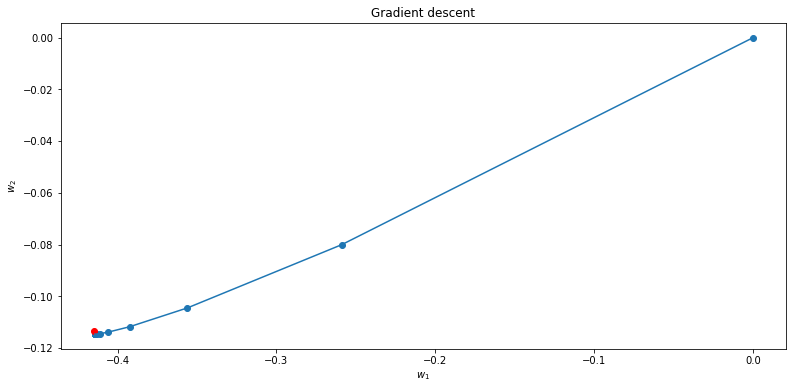

In [18]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0, 0], w_true[0, 1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

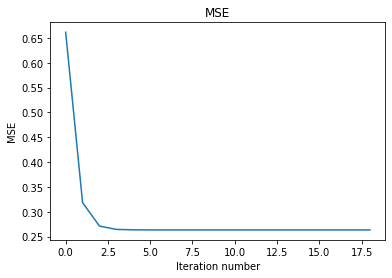

In [19]:
# Визуализируем изменение функционала ошибки
plt.plot(np.arange(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Text(0, 0.5, 'log(MSE)')

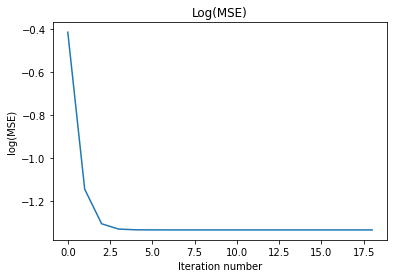

In [20]:
# Визуализируем изменение функционала ошибки
plt.plot(np.arange(len(errors)), np.log(np.array(errors)))
plt.title('Log(MSE)')
plt.xlabel('Iteration number')
plt.ylabel('log(MSE)')

In [21]:
def normal_equation(X, y):
    return np.linalg.solve((X.T).dot(X), (X.T).dot(y)).T

normal_eq_w = normal_equation(X, Y)
print('В случае использования нормального уравнения функционал ошибки составляет {0}'.format(
    round(mserror(X, normal_eq_w, Y), 4)))

В случае использования нормального уравнения функционал ошибки составляет 0.2634


In [22]:
class linear_regression:
    def __init__(self, eta = 0.9, max_iter = 1e4, min_weight_dist = 1e-8):
        self.eta = eta
        self.max_iter = max_iter
        self.min_weight_dist = min_weight_dist
    def _mserror(self, X, y_real):
        #рассчёт среднеквадратичной ошибки
        y = X.dot(self.w.T)+self.w0
        return np.sum((y - y_real)**2) / y_real.shape[0]
    def _mserror_grad(self, X, y_real):
        #рассчёт градиента ошибки.
        #2*delta.T.dot(X)/y_real.shape[0] - градиент по коэффициентам при факторах
        #np.sum(2*delta)/y_real.shape[0] - производная(градиент) при нулевом коэффициенте
        delta=(X.dot(self.w.T)+self.w0-y_real)
        return 2*delta.T.dot(X)/y_real.shape[0], np.sum(2*delta)/y_real.shape[0]
    def _optimize(self, X, Y):
        #оптимизация коэффициентов
        iter_num = 0
        weight_dist = np.inf
        self.w = np.zeros((1, X.shape[1]))
        self.w0=0
        while weight_dist > self.min_weight_dist and iter_num < self.max_iter:
            gr_w, gr_w0=self._mserror_grad(X, Y)
            if iter_num==0:
                #Чтобы eta адаптировалась к порядку градиента, делим на l2 норму градиента в нуле
                eta=self.eta/np.sqrt(np.linalg.norm(gr_w)**2+(gr_w0)**2)
            new_w = self.w - eta * gr_w
            new_w0= self.w0 - eta * gr_w0
            weight_dist = np.sqrt(np.linalg.norm(new_w - self.w)**2+(new_w0 - self.w0)**2)
            iter_num += 1
            self.w = new_w
            self.w0 = new_w0
    def fit(self, X, Y):
        if Y.ndim==1:
            Y=Y[:, np.newaxis]
        self._optimize(X, Y)
        return self
    def predict(self, X):
        return (X.dot(self.w.T)+self.w0).flatten()
    def test(self, X, Y):
        if Y.ndim==1:
            Y=Y[:, np.newaxis]
        return self._mserror(X, Y)
    

In [23]:
shift=np.random.uniform(0, 100)
Y_shift=Y+shift
lr=linear_regression(0.5)
lr.fit(X, Y_shift)
lr.test(X, Y_shift)

0.2633736340117906

In [24]:
shift, lr.w0

(61.158212817027135, 61.16224303691233)

In [25]:
lr.w, w_true

(array([[-0.41427525, -0.11461005]]), array([[-0.41504986, -0.11333755]]))